## 서울시 공공자전거 대여소 정보 분석과 시각화

데이터 출처 : [서울시 공공자전거 대여소 정보> 데이터셋> 공공데이터 | 서울열린데이터광장](http://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do)



* keyword
    * seaborn - barplot, boxplot, violinplot
    * **seaborn PairGrid vs matplotlib - subplots**
    * seaborn FacetGrid
        * **catplot 범주형 데이터 시각화 (kind: count, bar, box, boxen, violin)**
        * relplot 연속된 수치 데이터 시각화 (kind: scatter, line)
    * pandas - value_counts, cross_tab, groupby, pivot_table
  
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

* seaborn 에 대해 좀 더 알고 싶다면 다음의 튜토리얼을 참고해 보세요.
* [User guide and tutorial — seaborn documentation](https://seaborn.pydata.org/tutorial.html)

In [4]:
# pandas, numpy, seaborn, matplotlib.pyplot 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 한글폰트 설정

In [5]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

C:\Users\kh502\AppData\Local\Temp\ipykernel_4688\54892157.py:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [6]:
# 폰트설정
plt.rc("font", family='Malgun Gothic')

In [7]:
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [8]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

<Axes: >

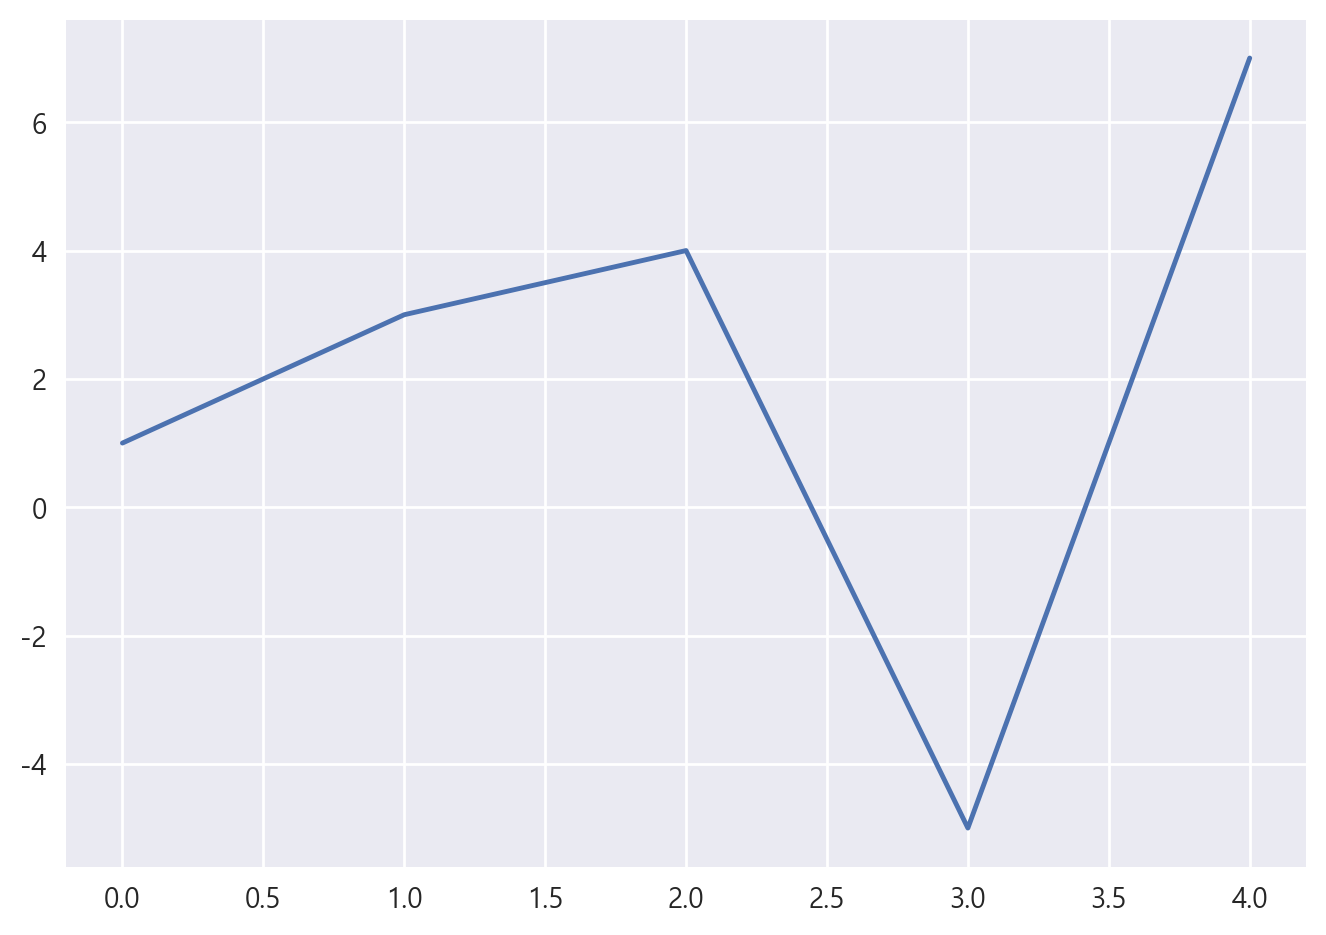

In [9]:
# Test
pd.Series([1, 3, 4, -5, 7]).plot()

### 막대그래프, 히스토그램 y축 비교
- 막대그래프 : 값을 표현
- 히스토그램 : 빈도를 표현 (값의 분포)

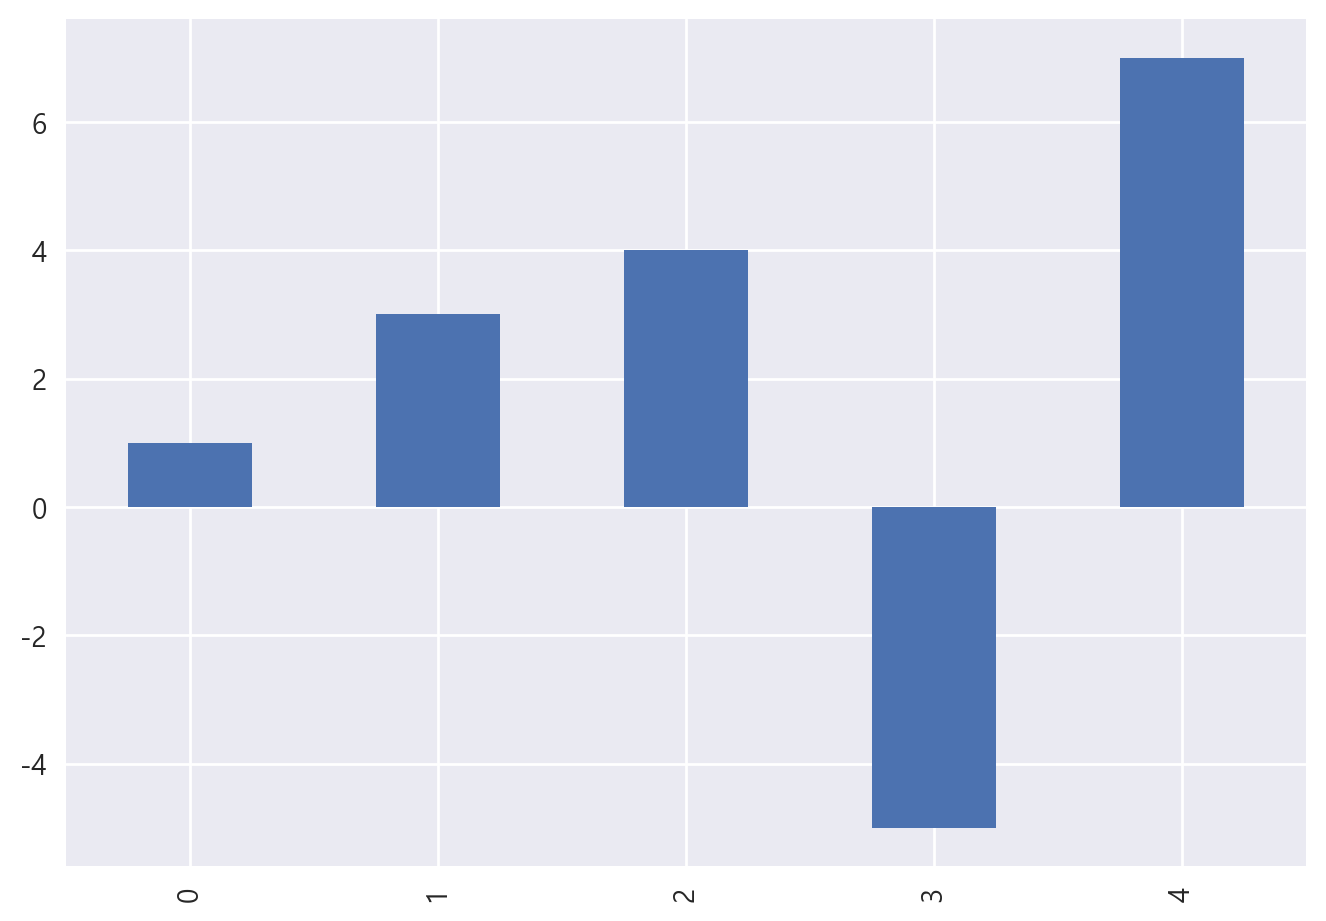

In [10]:
#Test
plt.figure() # 도화지 준비
pd.Series([1, 3, 4, -5, 7]).plot.bar()
plt.show() # 그리기

<Axes: title={'center': '한글'}, ylabel='Frequency'>

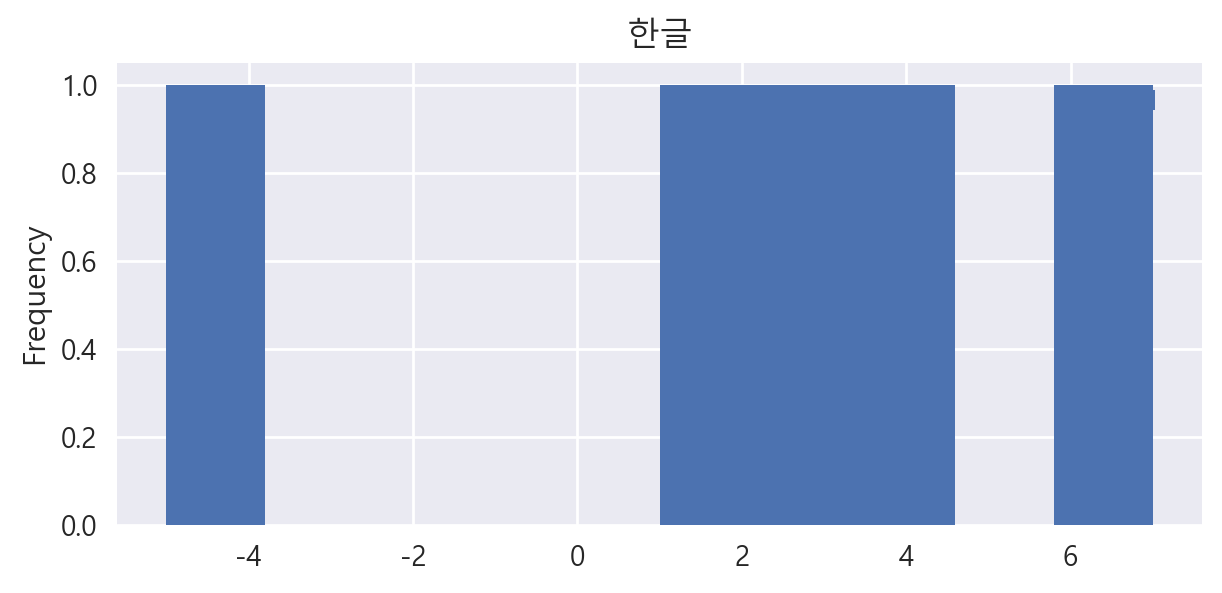

In [11]:
s = pd.Series([1,3,4,-5,7])
s.plot(kind='hist', title='한글', figsize=(7, 3), legend=True)
# 여기서 히스토그램은 빈도가 온 것이다 (x축이 index가 아니라 값)

<Axes: title={'center': '한글'}, xlabel='인덱스', ylabel='값'>

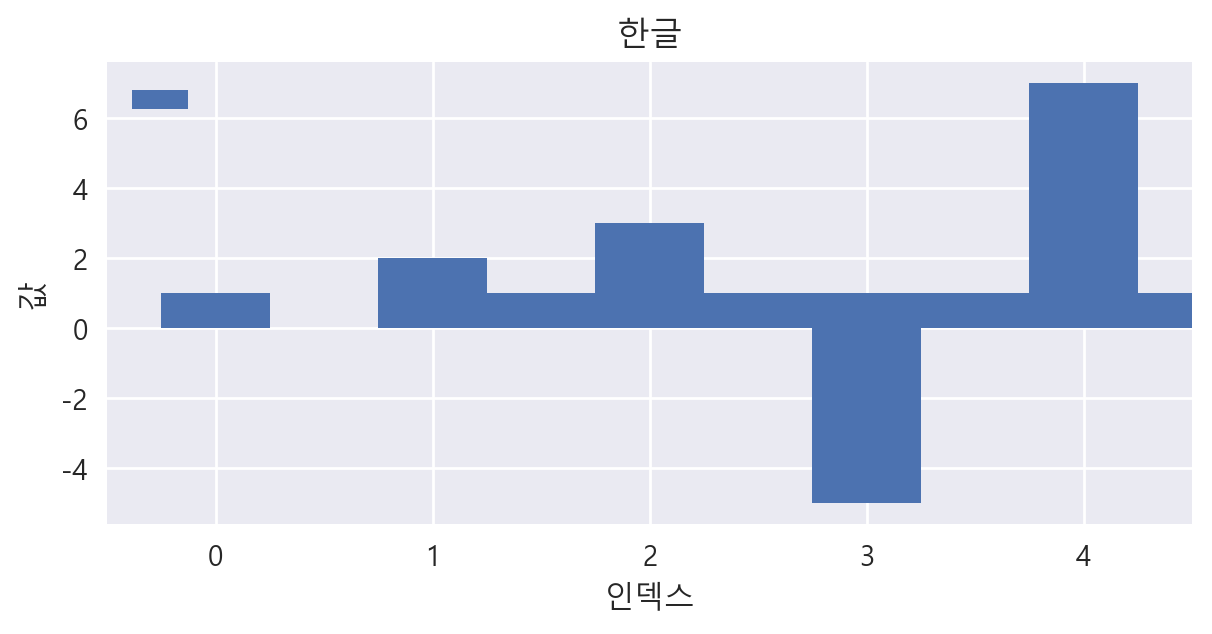

In [12]:
# Test
pd.Series([1, 2, 3, -5, 7]).plot.bar()
s = pd.Series([1,3,4,-5,7])
s.plot(kind='hist', title='한글', figsize=(7, 3), x=s.index, y=s.values, xlabel='인덱스', ylabel='값', legend=True)
# 2, 4줄이 한개의 도화지에 겹쳐지게 된거임

## 데이터 불러오기

In [13]:
# data/bike_station.csv 파일 불러오기
file_name = "bike_station.csv"
df = pd.read_csv(file_name)
df

대여소번호                대여소명  자치구                             상세주소  \
0      301.0         경복궁역 7번출구 앞  종로구  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞   
1      302.0         경복궁역 4번출구 뒤  종로구  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤   
2      303.0         광화문역 1번출구 앞  종로구       서울특별시 종로구 세종대로 지하189 세종로공원   
3      305.0              종로구청 옆  종로구               서울특별시 종로구 세종로 84-1   
4      307.0           서울역사박물관 앞  종로구      서울특별시 종로구 새문안로 55 서울역사박물관 앞   
...      ...                 ...  ...                              ...   
2757  3700.0     강변그대가리버뷰 입구 맞은편  강동구                    강동구 천호동 250-7   
2758  3701.0               방아삼거리  강동구                    강동구 둔촌동 118-2   
2759  4951.0  강동농협 버스정류소 앞(광채빌라)  강동구                   강동구 암사동 488-21   
2760  4952.0        천호시장 버스정류소 옆  강동구                  강동구 천호동 397-465   
2761  4953.0         세양청마루 아파트 앞  강동구                    강동구 천호대로 1162   

             위도          경도                     설치시기   LCD    QR 운영방식  자전거수  \
0     37.575794  126.971451  2015-10-07 12:03:46.000  20.0  20.0   QR    40   
1     37.575947  126.974060  2015-10-07 12:04:22.000  12.0  12.0   QR    24   
2     37.571770  126.974663  2015-10-07 00:00:00.000   8.0   8.0   QR    16   
3     37.572559  126.978333  2015-01-07 00:00:00.000  16.0  16.0   QR    32   
4     37.570000  126.971100  2015-10-07 12:09:09.000  11.0  11.0   QR    22   
...         ...         ...                      ...   ...   ...  ...   ...   
2757  37.548164  127.122574  2022-07-08 00:00:00.000   NaN   8.0   QR     8   
2758  37.523281  127.146133  2022-10-12 00:00:00.000   NaN   8.0   QR     8   
2759  37.547966  127.135162  2022-09-29 00:00:00.000   NaN   5.0   QR     5   
2760  37.541466  127.130257  2023-01-18 00:00:00.000   NaN   5.0   QR     5   
2761  37.533466  127.140503  2023-07-13 00:00:00.000   NaN  10.0   QR    10   

        연도   월   일  요일  
0     2015  10   7   2  
1     2015  10   7   2  
2     2015  10   7   2  
3     2015   1   7   2  
4     2015  10   7   2  
...    ...  ..  ..  ..  
2757  2022   7   8   4  
2758  2022  10  12   2  
2759  2022   9  29   3  
2760  2023   1  18   2  
2761  2023   7  13   3  

[2762 rows x 15 columns]

## 데이터 요약

In [14]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762 entries, 0 to 2761
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2762 non-null   float64
 1   대여소명    2762 non-null   object 
 2   자치구     2762 non-null   object 
 3   상세주소    2762 non-null   object 
 4   위도      2762 non-null   float64
 5   경도      2762 non-null   float64
 6   설치시기    2762 non-null   object 
 7   LCD     1454 non-null   float64
 8   QR      1653 non-null   float64
 9   운영방식    2762 non-null   object 
 10  자전거수    2762 non-null   int64  
 11  연도      2762 non-null   int64  
 12  월       2762 non-null   int64  
 13  일       2762 non-null   int64  
 14  요일      2762 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 323.8+ KB


## 중복확인

In [15]:
# duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2757    False
2758    False
2759    False
2760    False
2761    False
Length: 2762, dtype: bool

## 결측치 확인
### 결측치 합계

In [16]:
df.isnull().sum()

대여소번호       0
대여소명        0
자치구         0
상세주소        0
위도          0
경도          0
설치시기        0
LCD      1308
QR       1109
운영방식        0
자전거수        0
연도          0
월           0
일           0
요일          0
dtype: int64

### 결측치 비율

In [17]:
df.isnull().mean() * 100

대여소번호     0.000000
대여소명      0.000000
자치구       0.000000
상세주소      0.000000
위도        0.000000
경도        0.000000
설치시기      0.000000
LCD      47.356988
QR       40.152064
운영방식      0.000000
자전거수      0.000000
연도        0.000000
월         0.000000
일         0.000000
요일        0.000000
dtype: float64

### 결측치 시각화

<Axes: >

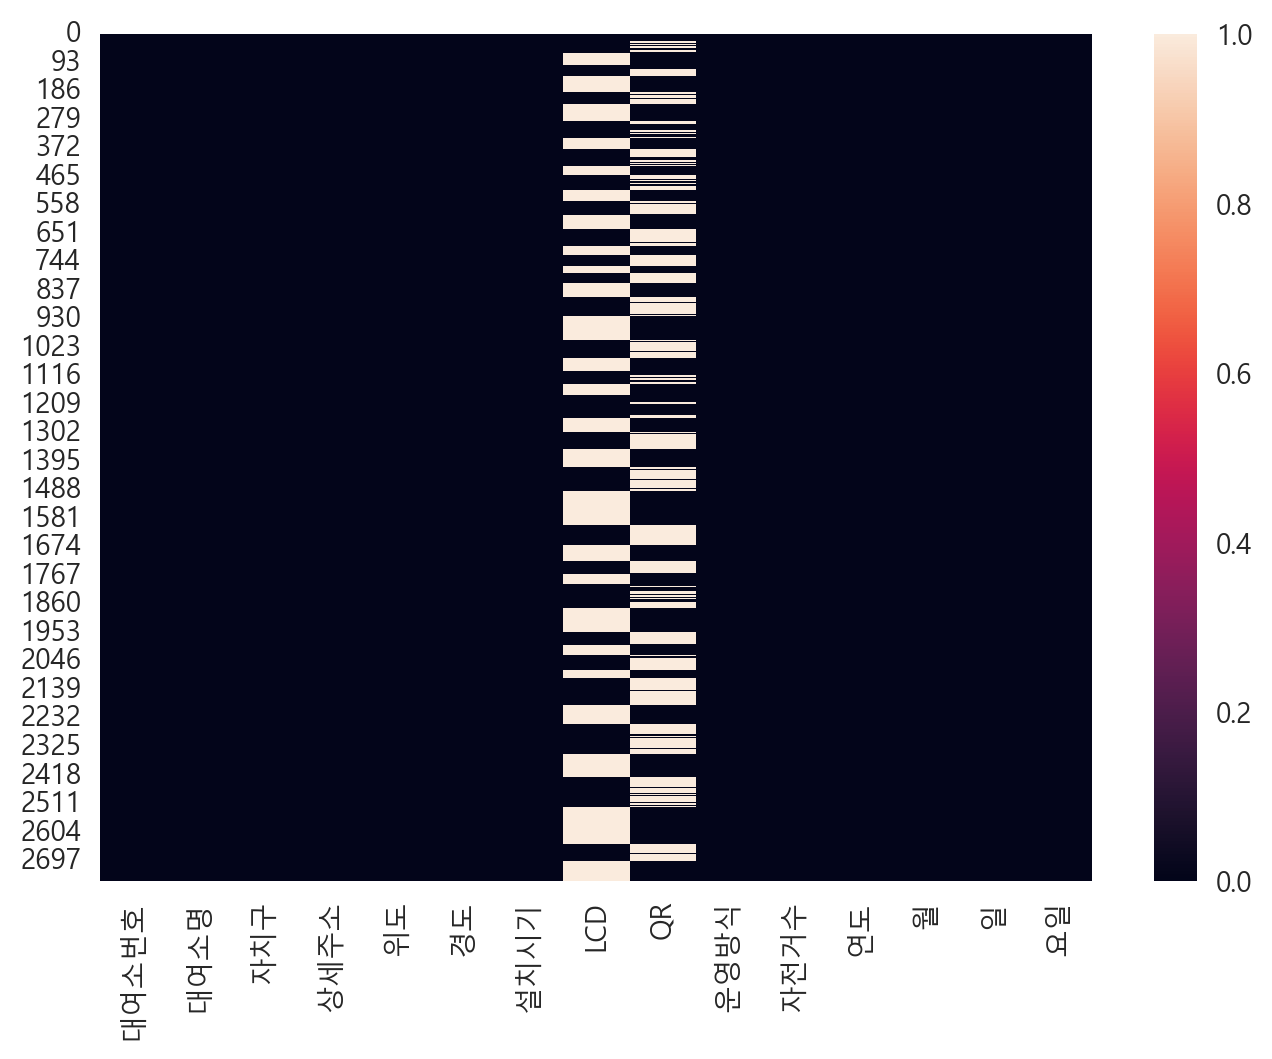

In [18]:
# seaborn 사용
sns.heatmap(df.isnull())

<Axes: >

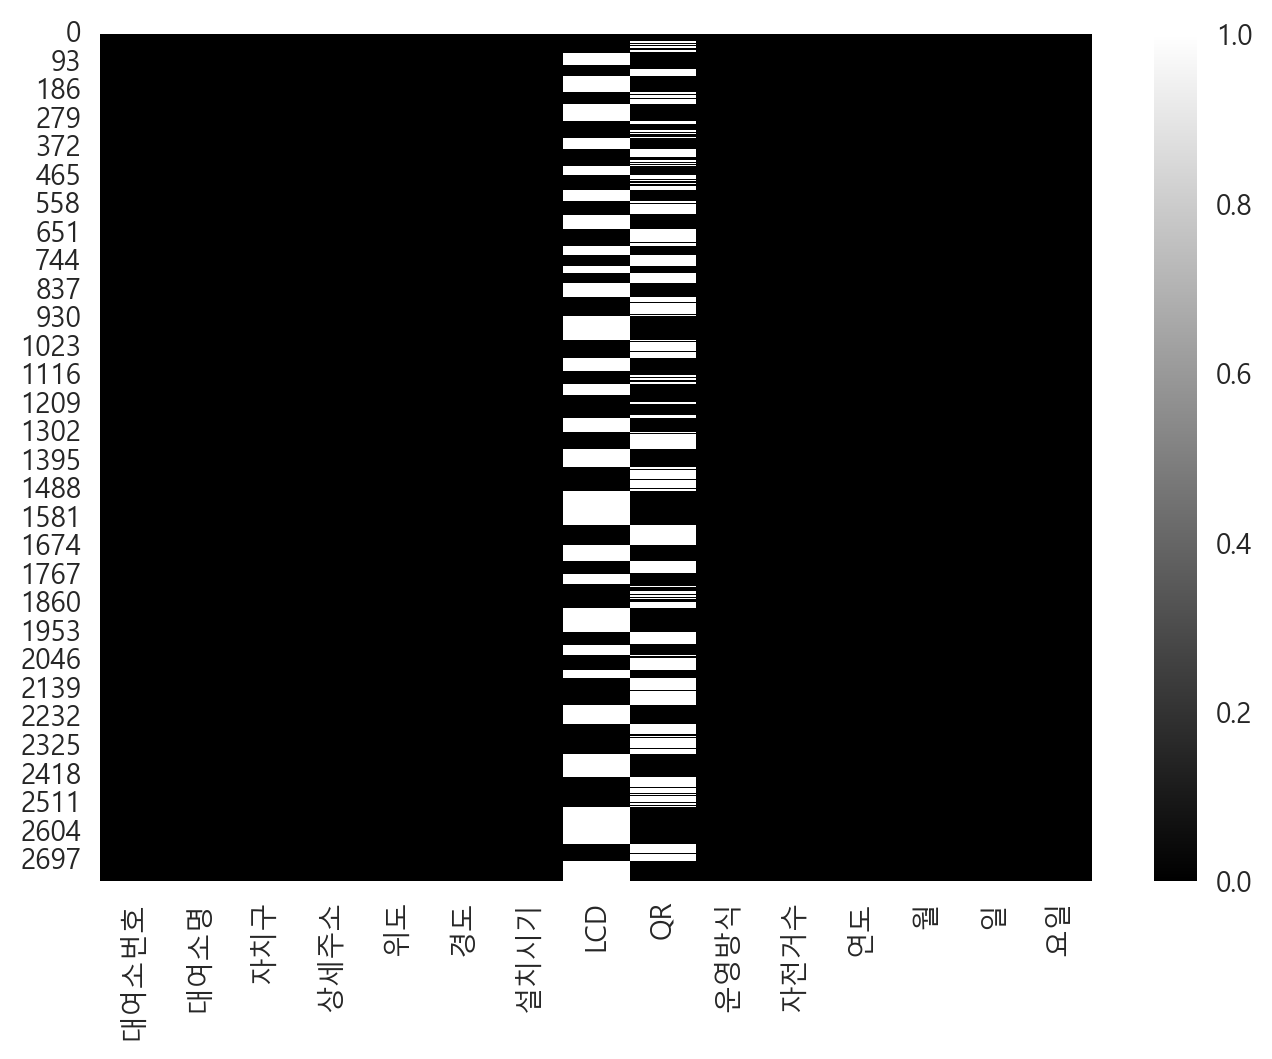

In [19]:
# seaborn 사용
sns.heatmap(df.isnull(), cmap='gray')

### 결측치 제거

In [20]:
df['LCD'] = df['LCD'].fillna(0)
df['QR'] = df['QR'].fillna(0)

In [21]:
print(df['LCD'].isnull().sum())
print(df['QR'].isnull().sum())

0
0


### 결측치 제거된 거 시각화로 확인

<Axes: >

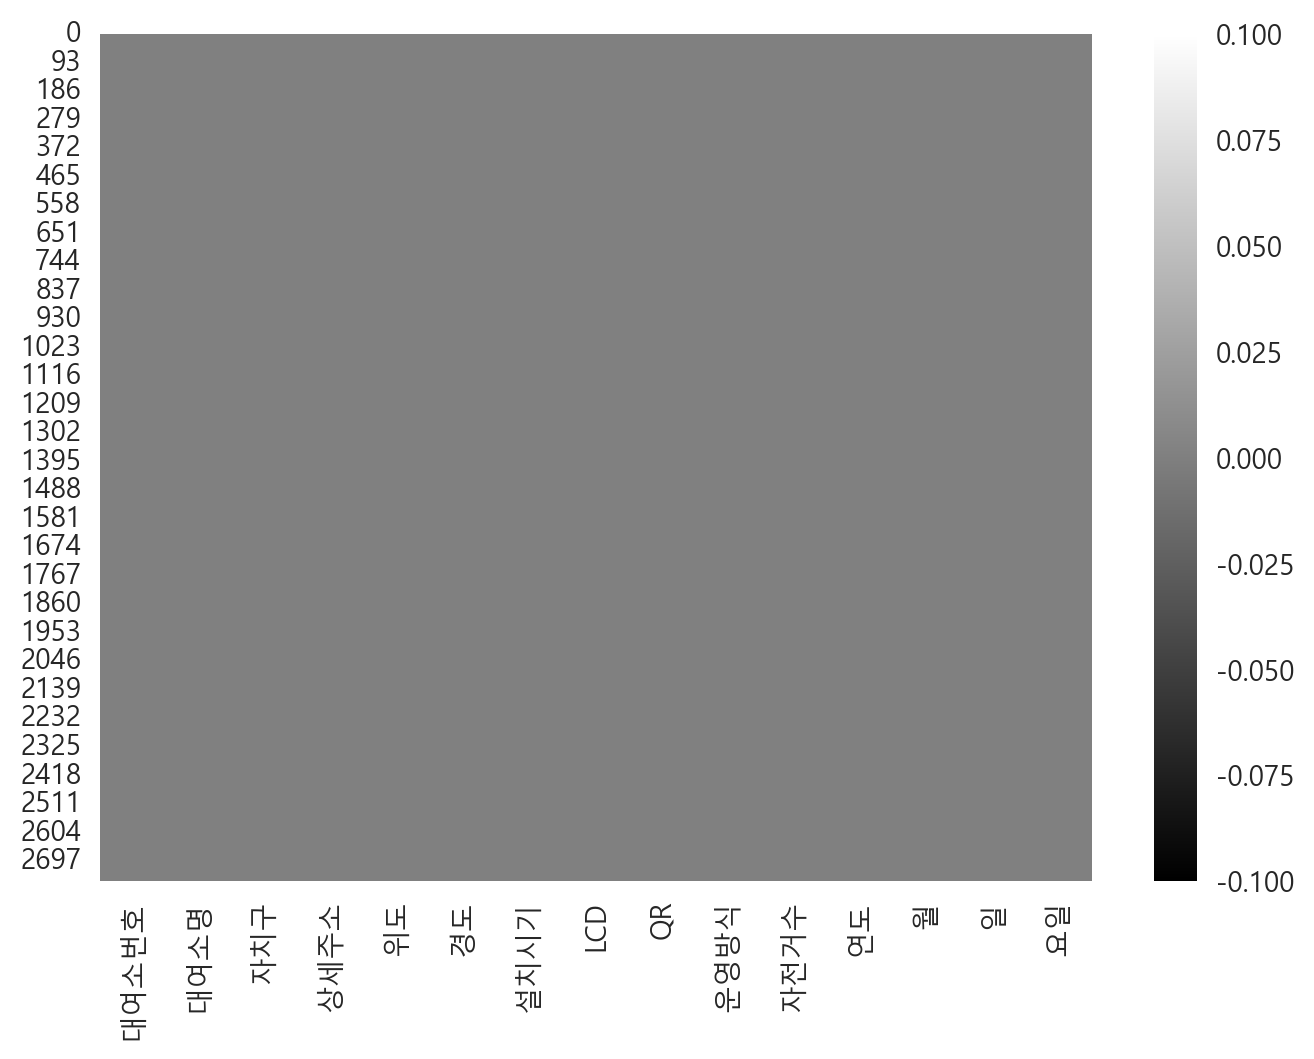

In [22]:
# seaborn 사용
sns.heatmap(df.isnull(), cmap='gray')

## 기초 기술통계 

In [23]:
# 수치 데이터 기술통계
df.describe()

대여소번호           위도           경도          LCD           QR  \
count  2762.000000  2762.000000  2762.000000  2762.000000  2762.000000   
mean   2351.479363    37.547397   126.991328     6.643736     7.202752   
std    1569.395956     0.052343     0.092762     7.258048     7.545407   
min     102.000000    37.430977   126.798599     0.000000     0.000000   
25%    1009.250000    37.505236   126.914299     0.000000     0.000000   
50%    2070.500000    37.545483   127.003372     7.000000     8.000000   
75%    3779.750000    37.577336   127.063763    10.000000    10.000000   
max    6172.000000    37.691013   127.180756    46.000000    62.000000   

              자전거수           연도            월            일           요일  
count  2762.000000  2762.000000  2762.000000  2762.000000  2762.000000  
mean     13.846488  2018.711803     6.653150    15.249457     2.007603  
std       8.445683     2.135283     3.349264     9.572558     1.431376  
min       2.000000  2015.000000     1.000000     1.000000     0.000000  
25%      10.000000  2017.000000     4.000000     7.000000     1.000000  
50%      10.000000  2018.000000     6.000000    14.500000     2.000000  
75%      15.000000  2020.000000    10.000000    24.000000     3.000000  
max      92.000000  2023.000000    12.000000    31.000000     6.000000

In [24]:
# 범주 데이터 기술통계
df.describe(include='O') # 알파벳 O

대여소명   자치구      상세주소                     설치시기  운영방식
count         2762  2762      2762                     2762  2762
unique        2761    25      2682                     1185     2
top     한양수자인아파트 앞   송파구  국회의사당 경내  2017-11-01 16:00:00.000    QR
freq             2   217         7                      165  1648

## 수치 데이터

### 전체 수치 변수의 히스토그램

In [25]:
df.columns

Index(['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', 'LCD', 'QR', '운영방식',
       '자전거수', '연도', '월', '일', '요일'],
      dtype='object')

In [26]:
df.shape

(2762, 15)

array([[<Axes: title={'center': '대여소번호'}>,
        <Axes: title={'center': '위도'}>, <Axes: title={'center': '경도'}>],
       [<Axes: title={'center': 'LCD'}>, <Axes: title={'center': 'QR'}>,
        <Axes: title={'center': '자전거수'}>],
       [<Axes: title={'center': '연도'}>, <Axes: title={'center': '월'}>,
        <Axes: title={'center': '일'}>],
       [<Axes: title={'center': '요일'}>, <Axes: >, <Axes: >]], dtype=object)

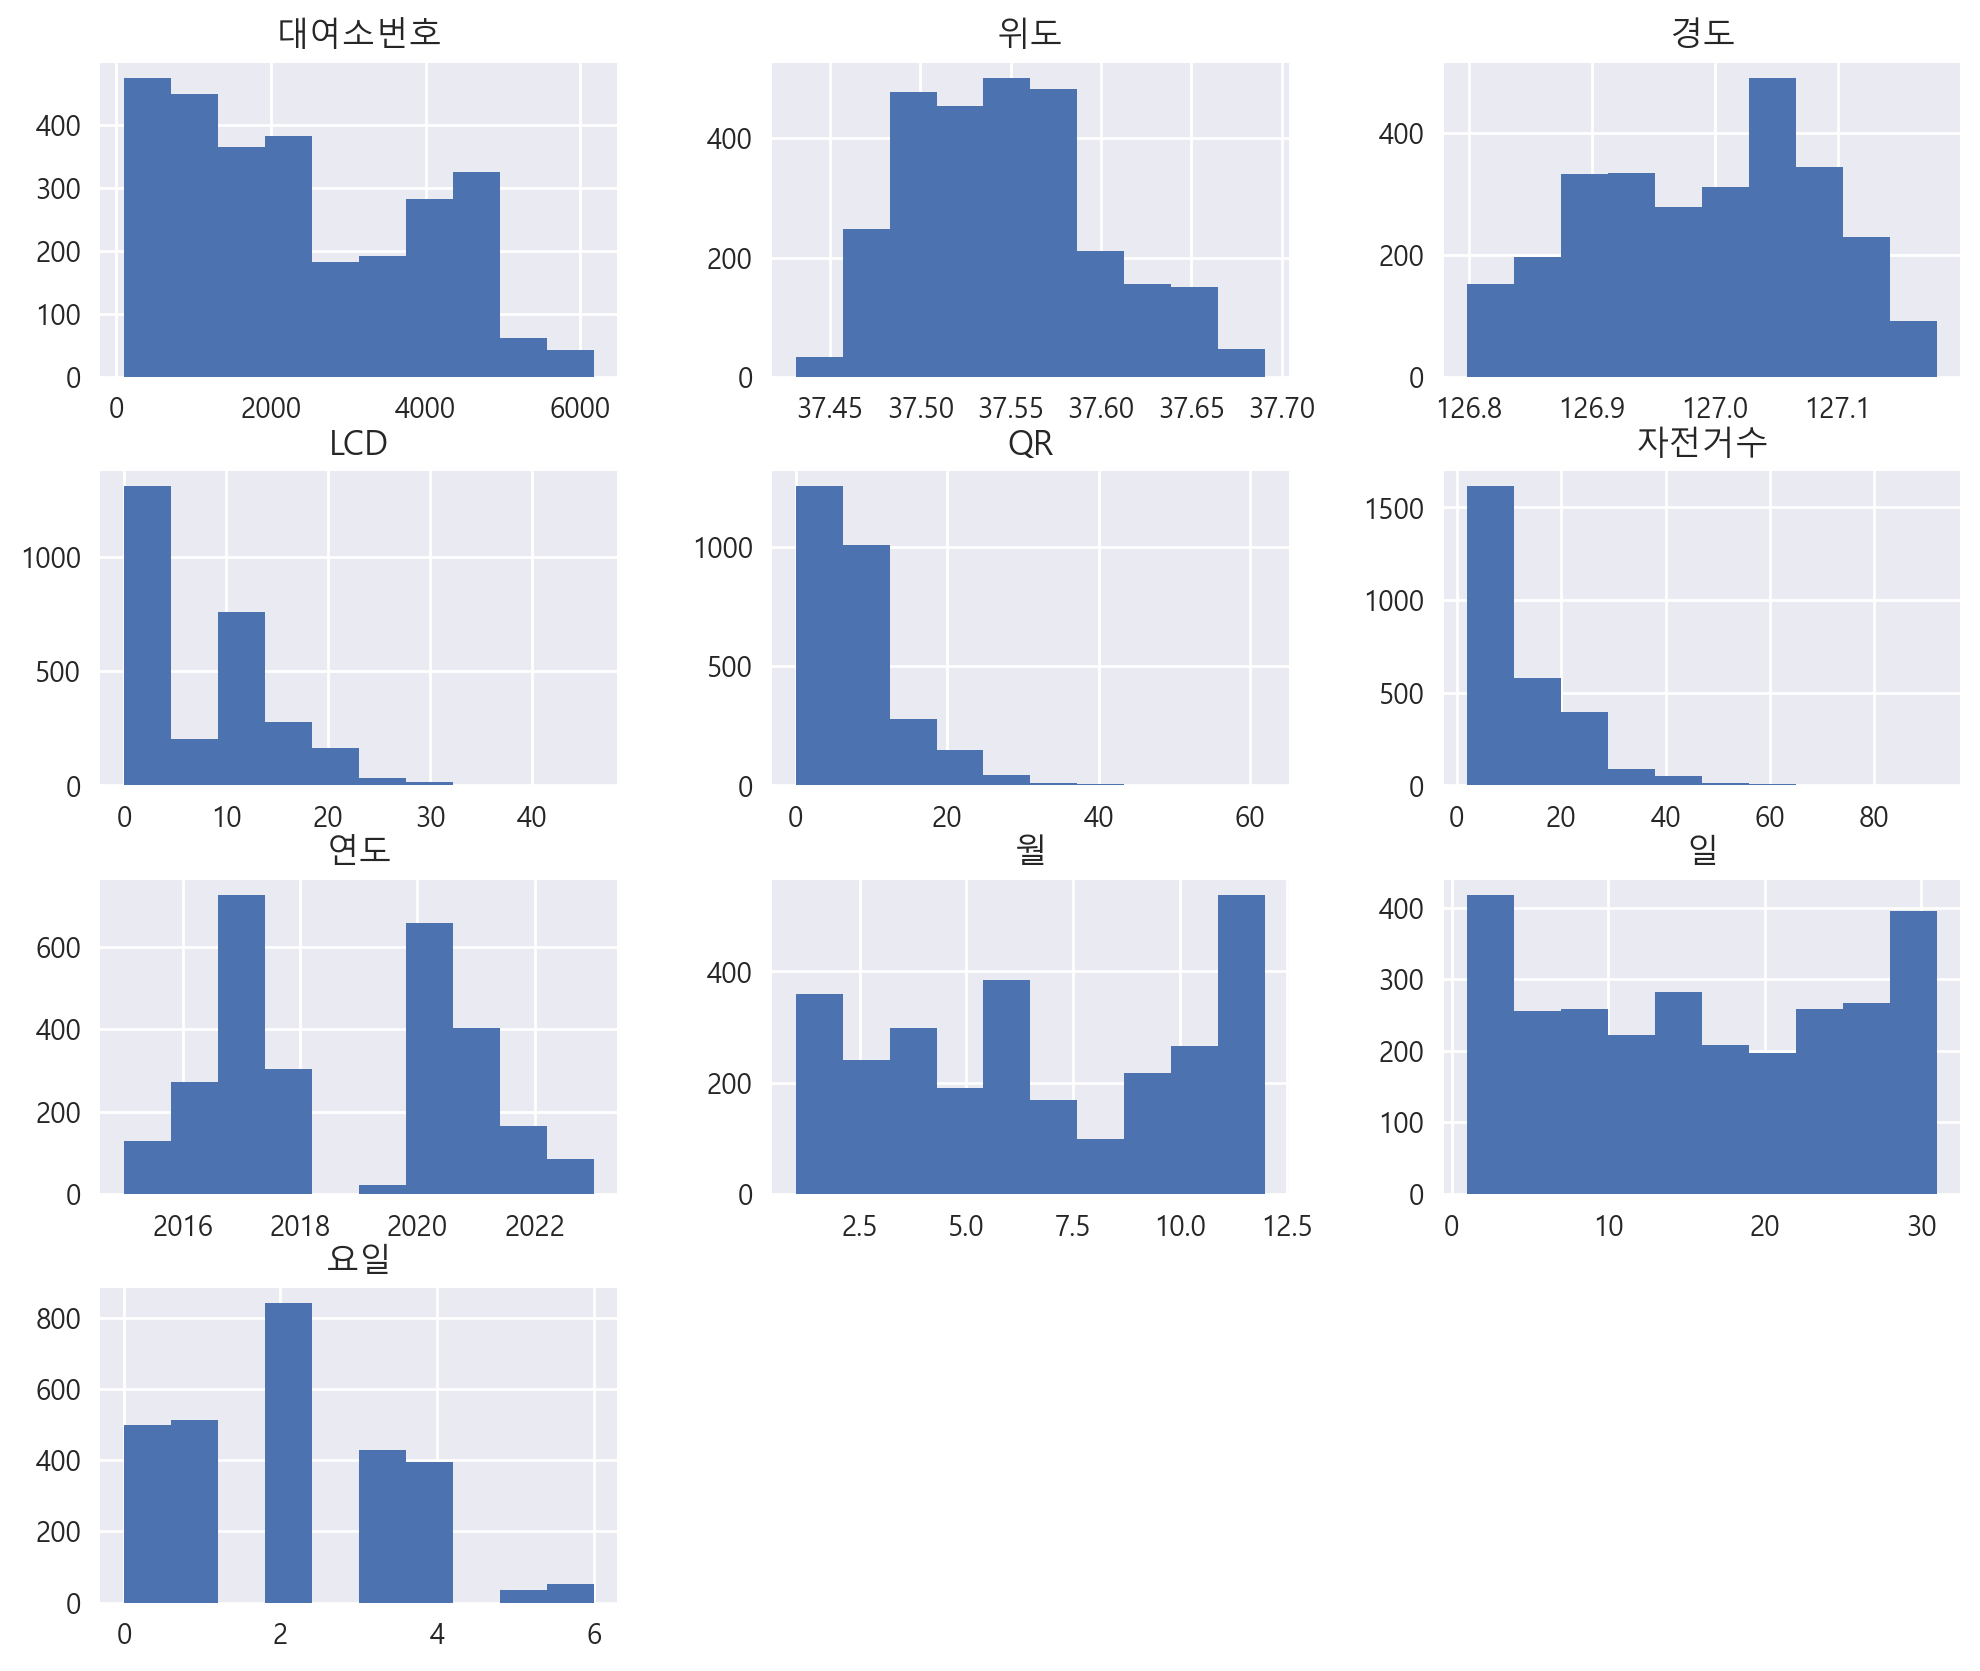

In [27]:
# hist
df.hist(figsize=(12, 10))

array([[<Axes: title={'center': '대여소번호'}>,
        <Axes: title={'center': '위도'}>, <Axes: title={'center': '경도'}>],
       [<Axes: title={'center': 'LCD'}>, <Axes: title={'center': 'QR'}>,
        <Axes: title={'center': '자전거수'}>],
       [<Axes: title={'center': '연도'}>, <Axes: title={'center': '월'}>,
        <Axes: title={'center': '일'}>],
       [<Axes: title={'center': '요일'}>, <Axes: >, <Axes: >]], dtype=object)

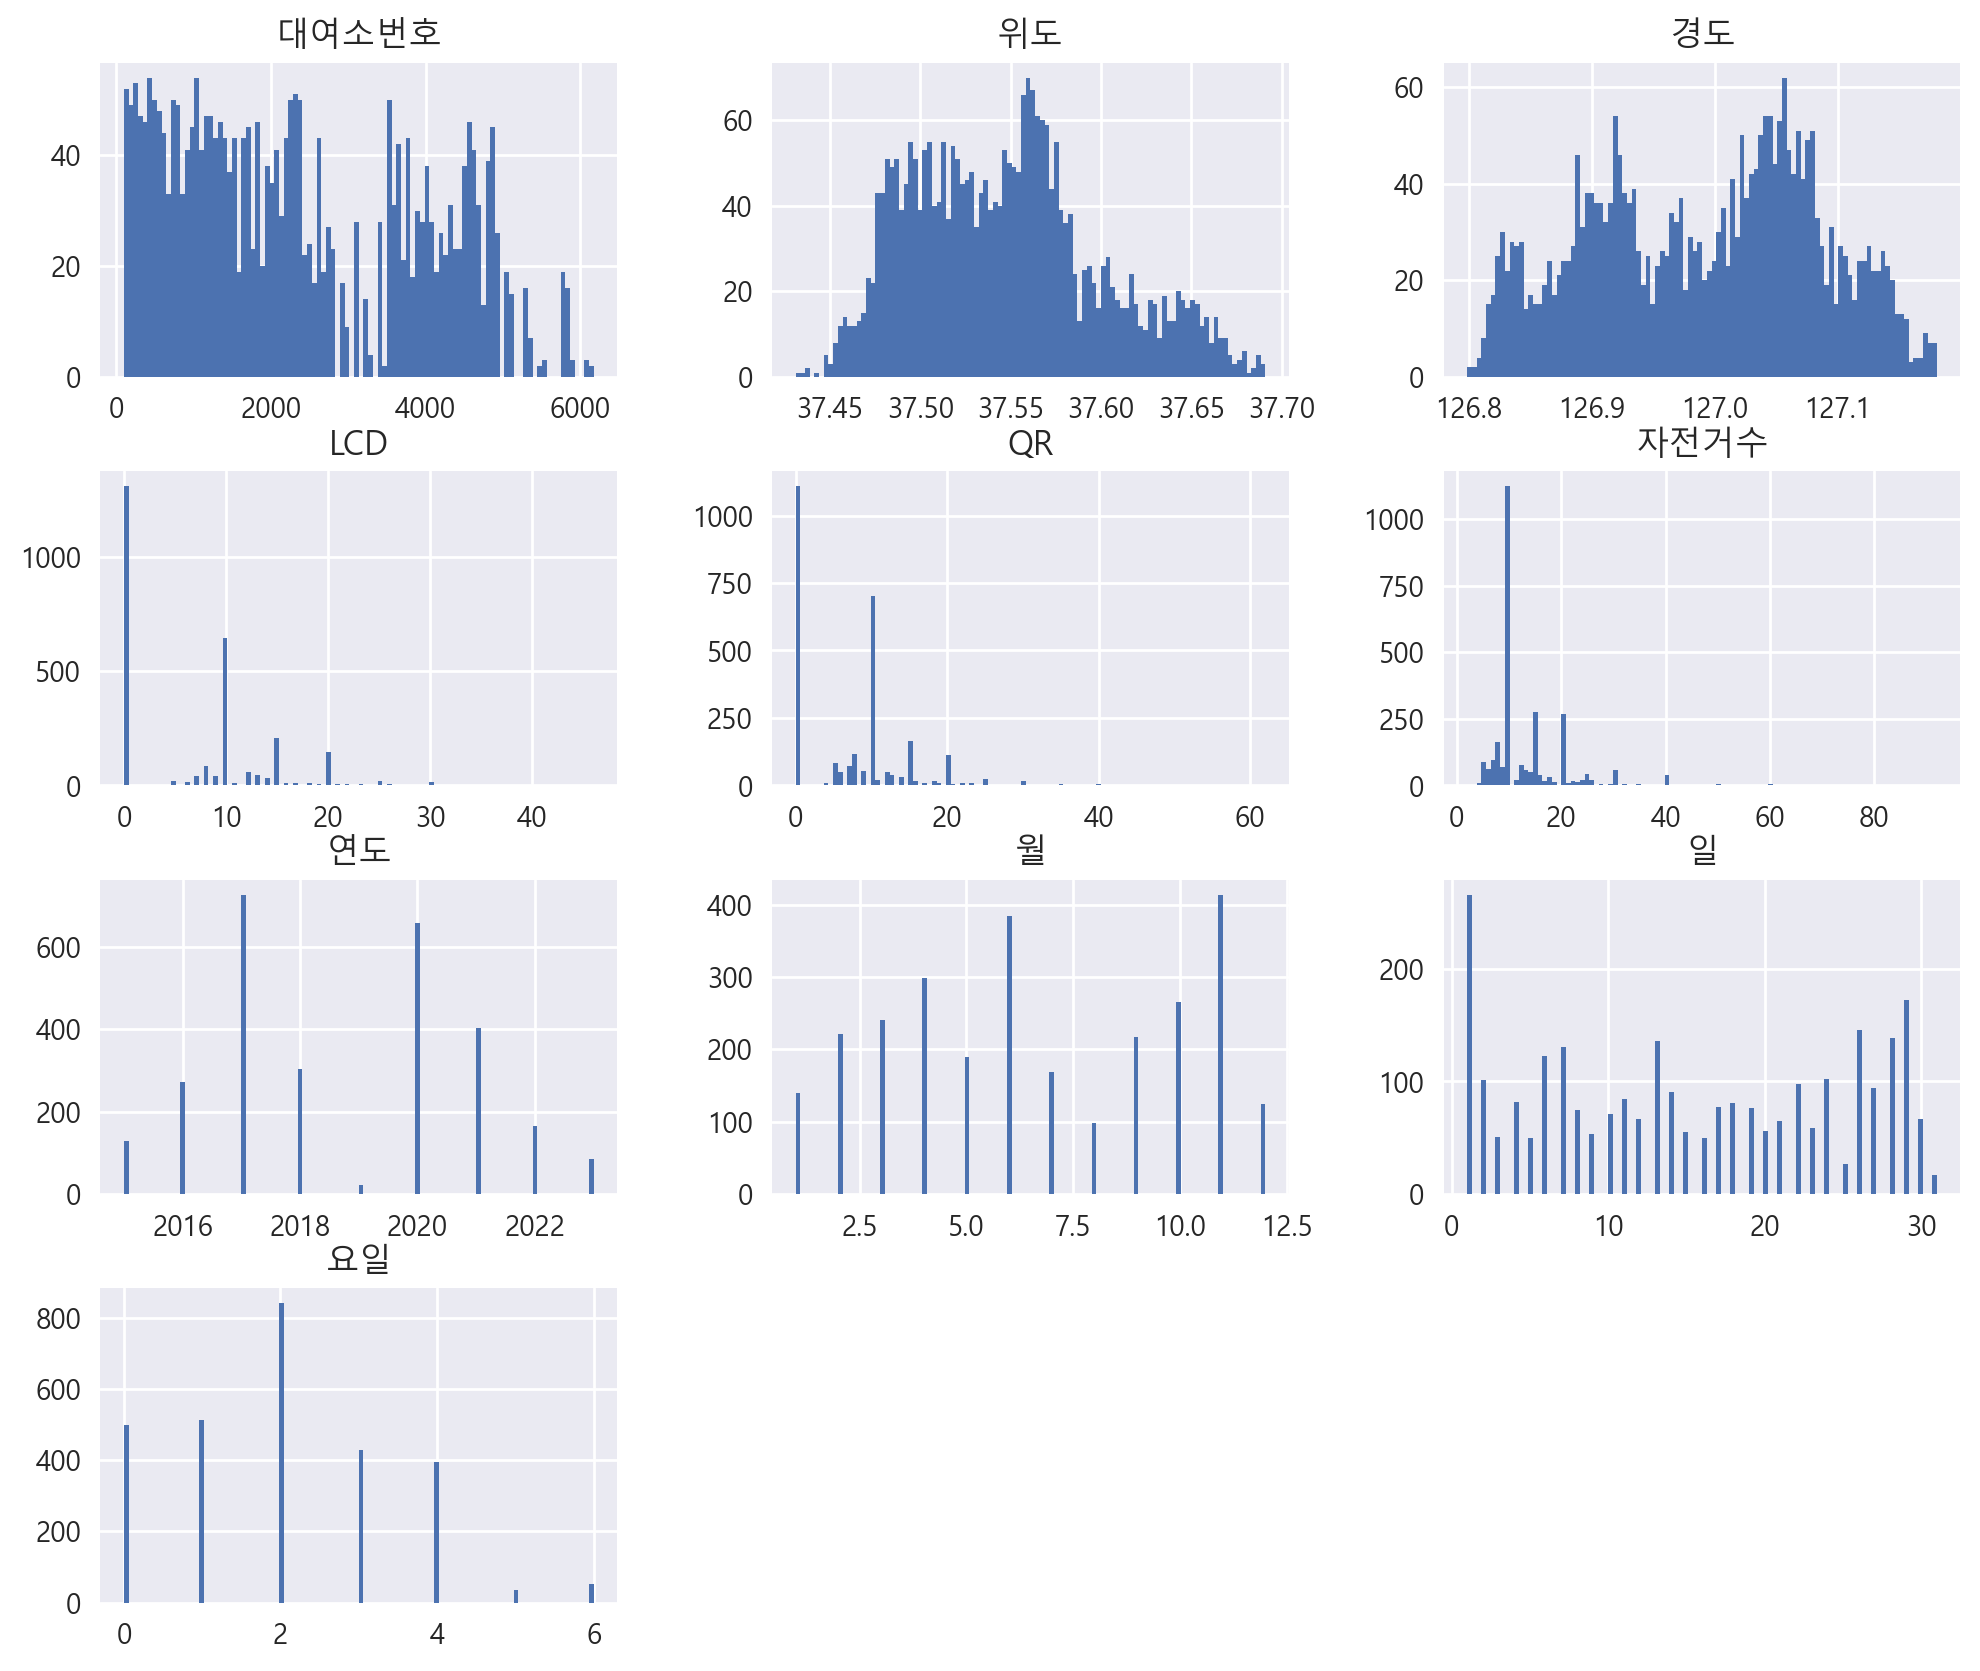

In [28]:
# hist
df.hist(figsize=(12, 10), bins=100)

### 특정 수치 변수의 히스토그램

<Axes: xlabel='LCD', ylabel='Count'>

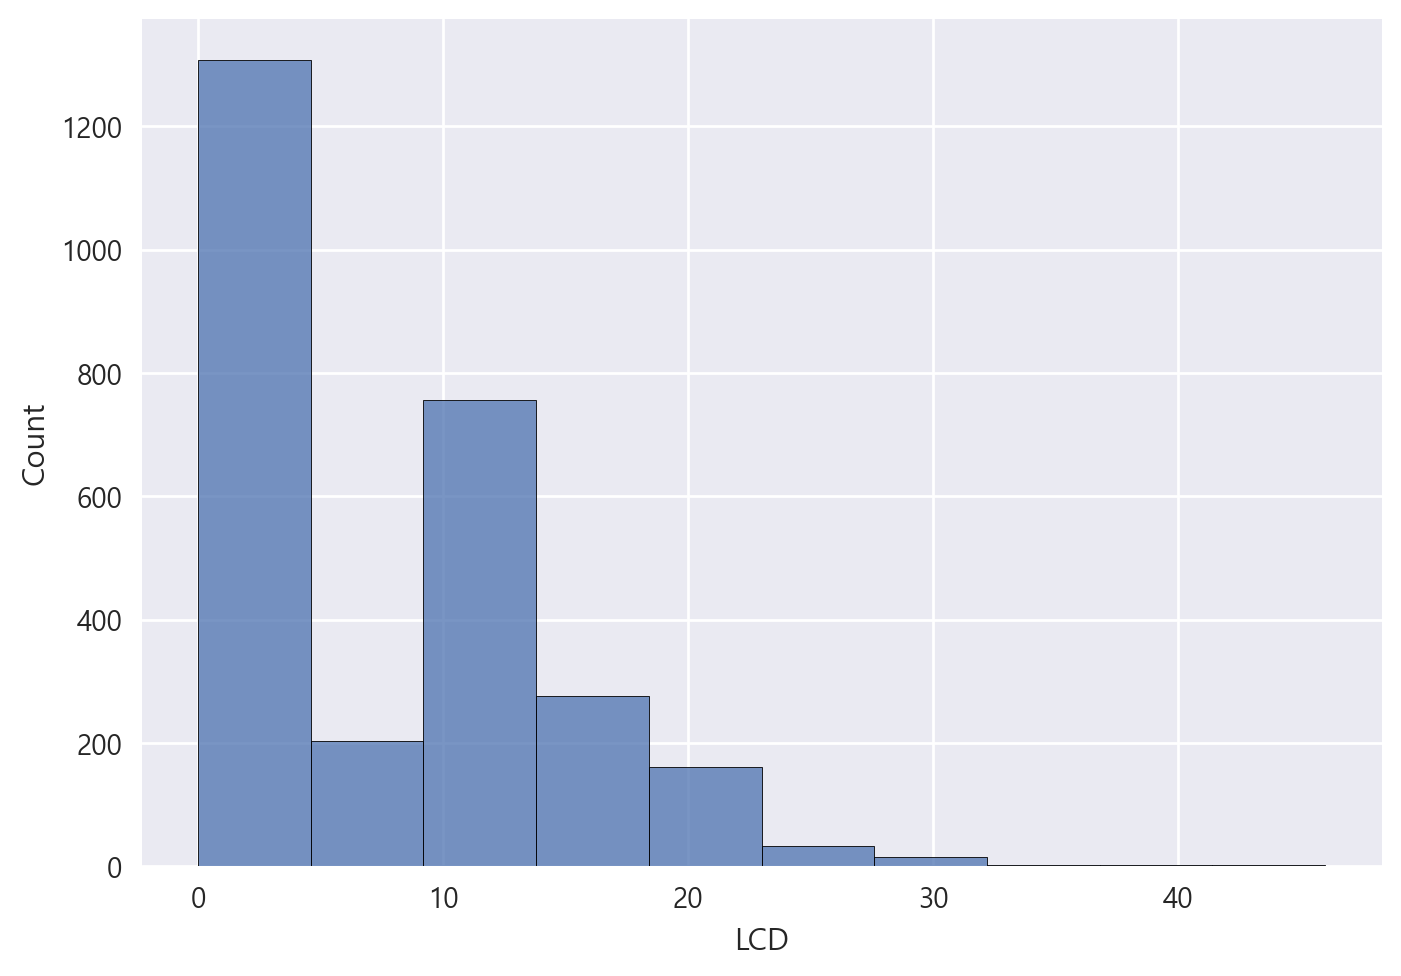

In [29]:
# LCD histplot
sns.histplot(data=df, x='LCD', bins=10)

<Axes: ylabel='Count'>

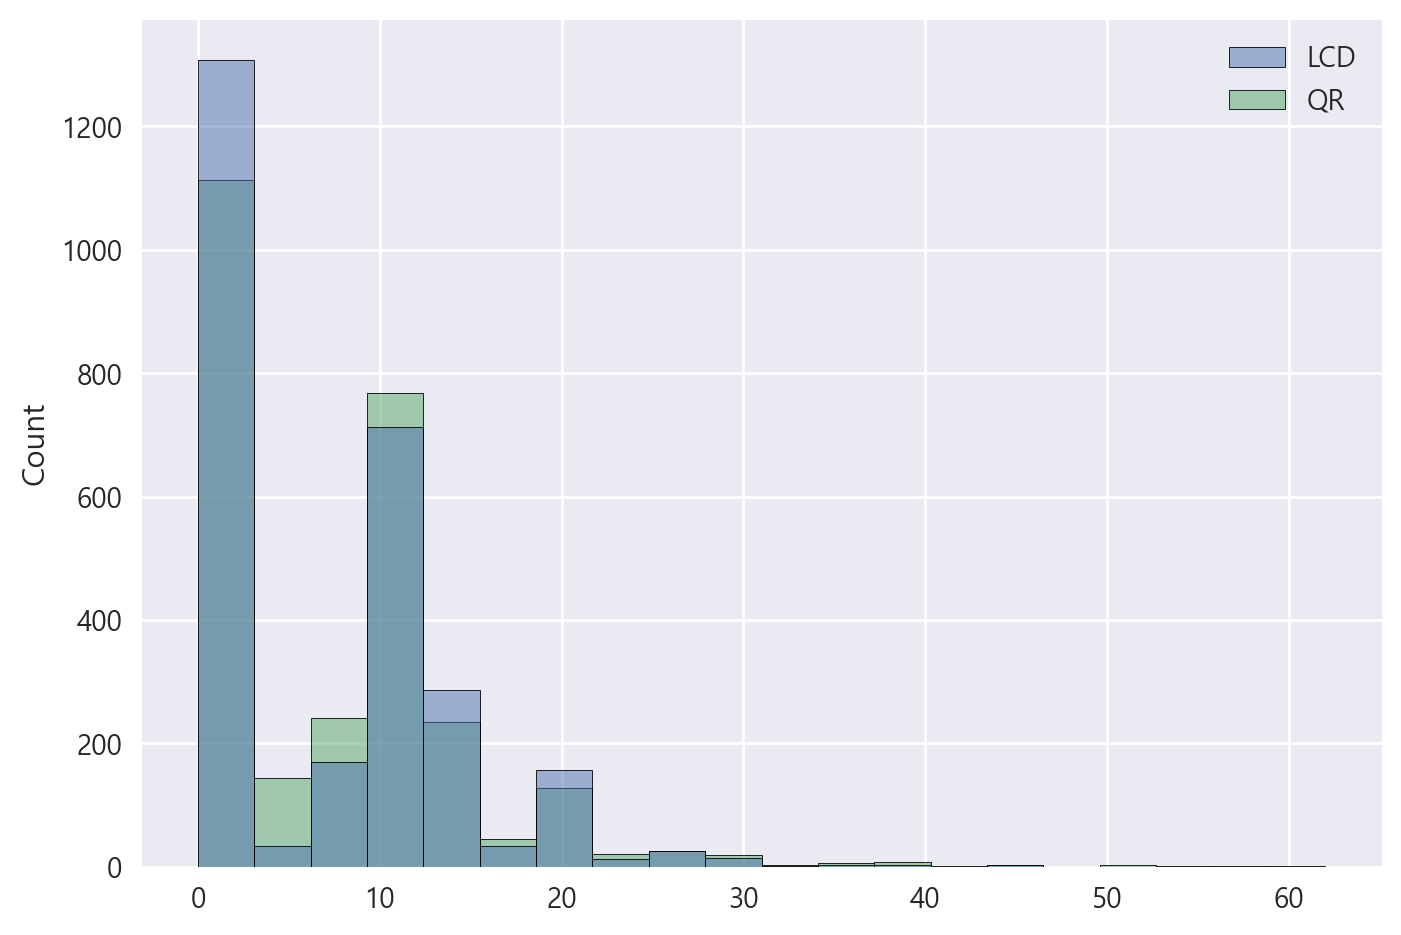

In [30]:
# "LCD", "QR" histplot
sns.histplot(data=df[['LCD', 'QR']], bins=20)

<Axes: xlabel='LCD'>

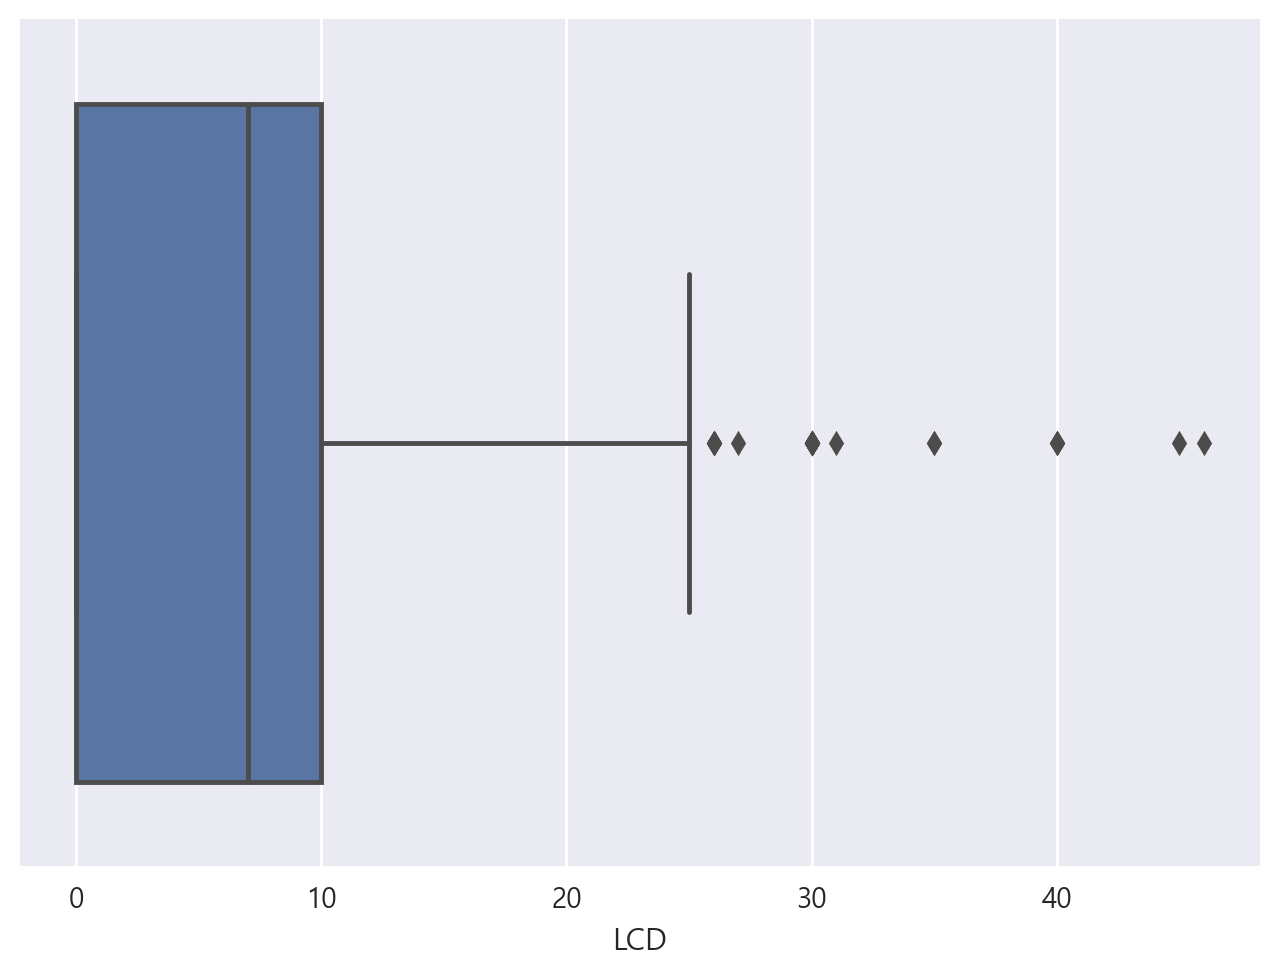

In [31]:
# "LCD" boxplot
sns.boxplot(data=df, x='LCD')

<Axes: >

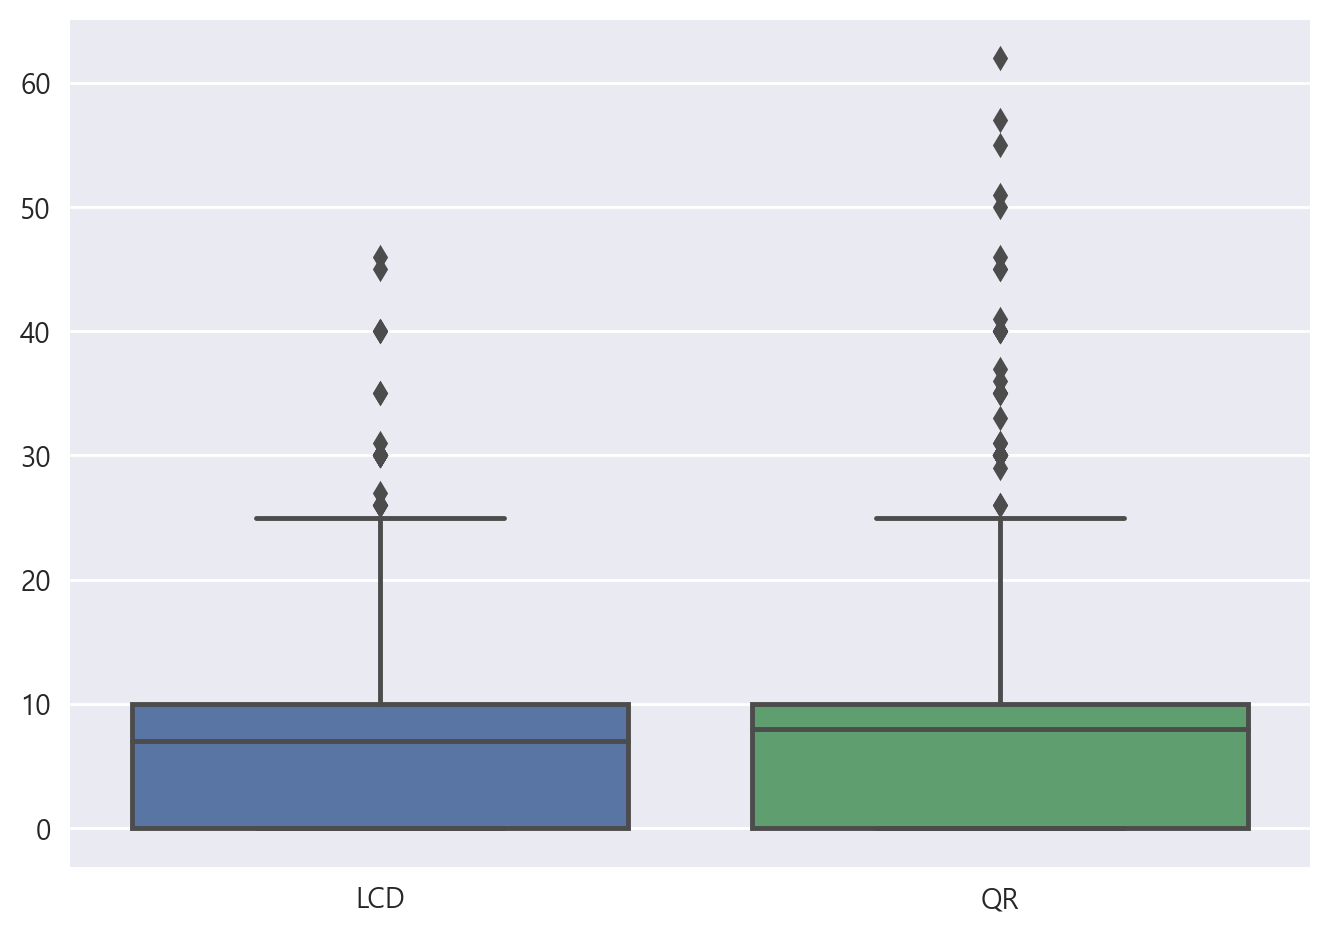

In [32]:
# "LCD", "QR" boxplot
sns.boxplot(data=df[['LCD', 'QR']])

<Axes: xlabel='LCD', ylabel='Density'>

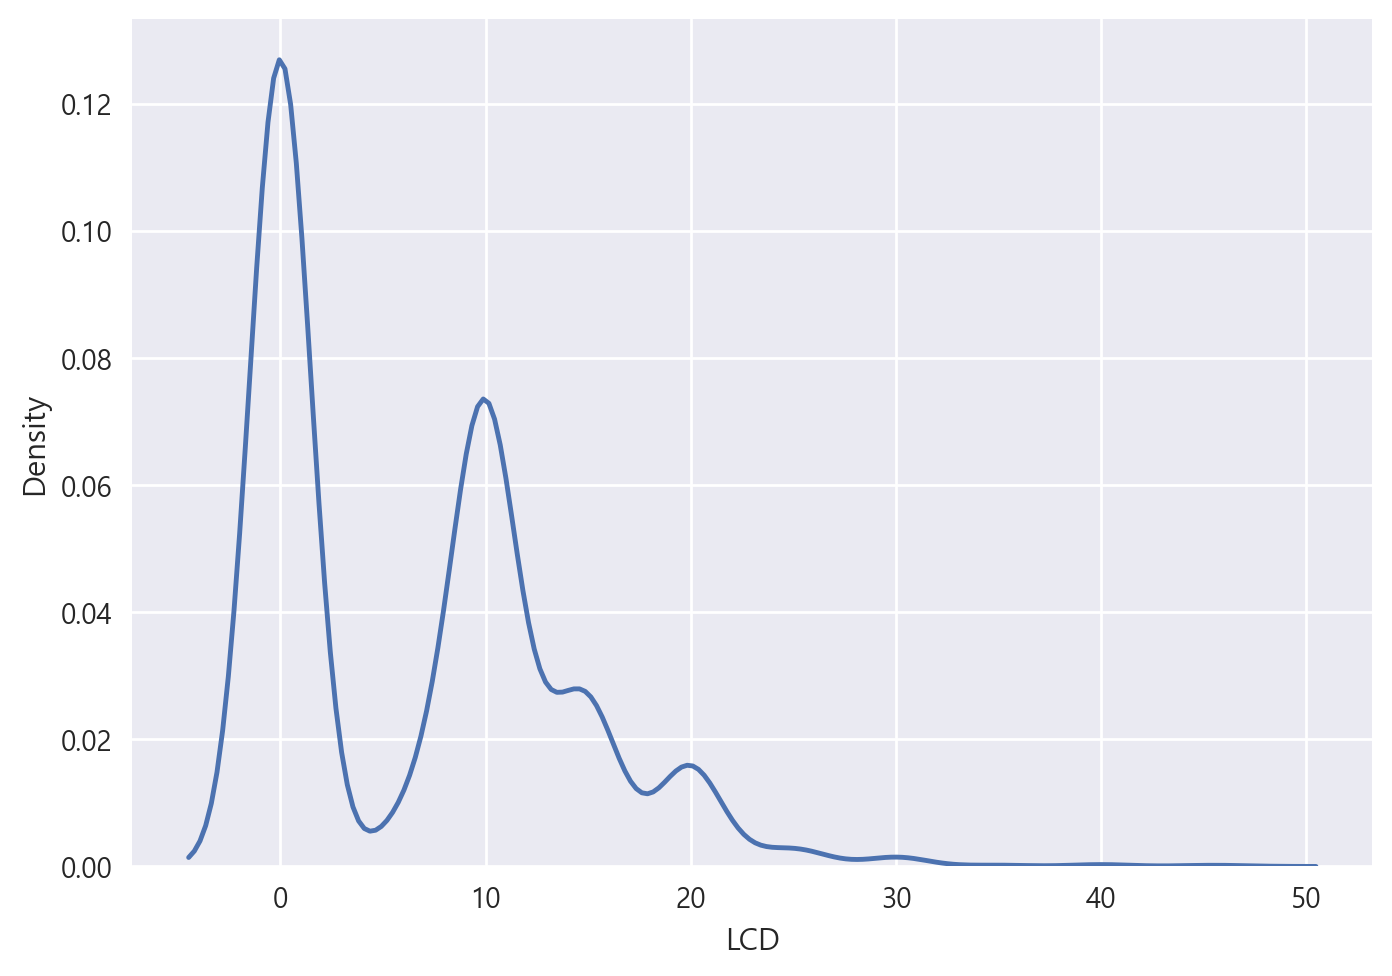

In [33]:
# "LCD" kdeplot
sns.kdeplot(data=df, x='LCD')

<Axes: ylabel='Density'>

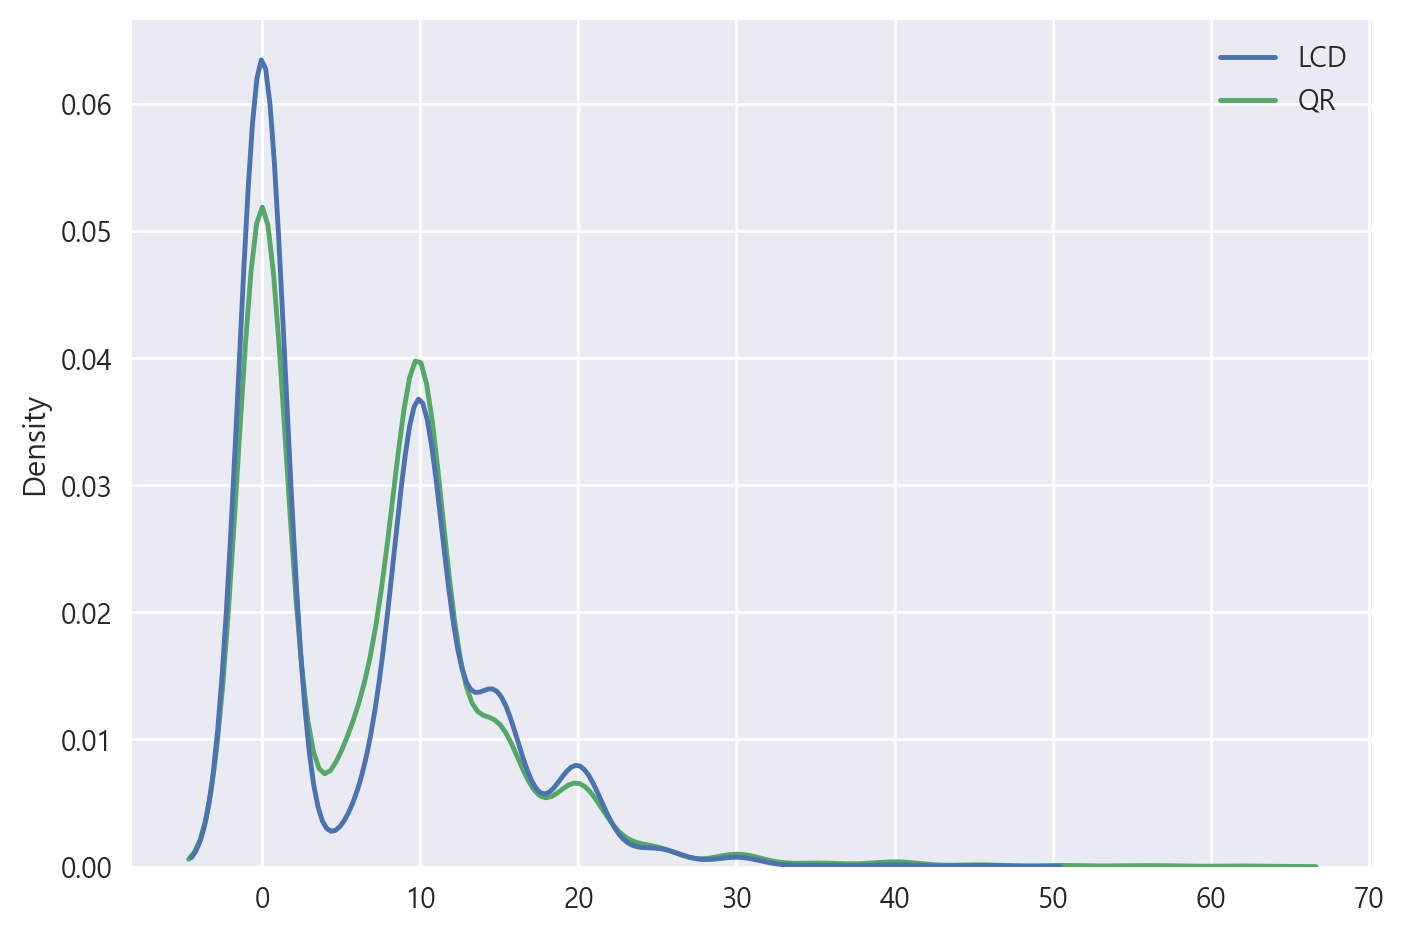

In [34]:
# "LCD", "QR" kdeplot
sns.kdeplot(data=df[['LCD', 'QR']])

<Axes: >

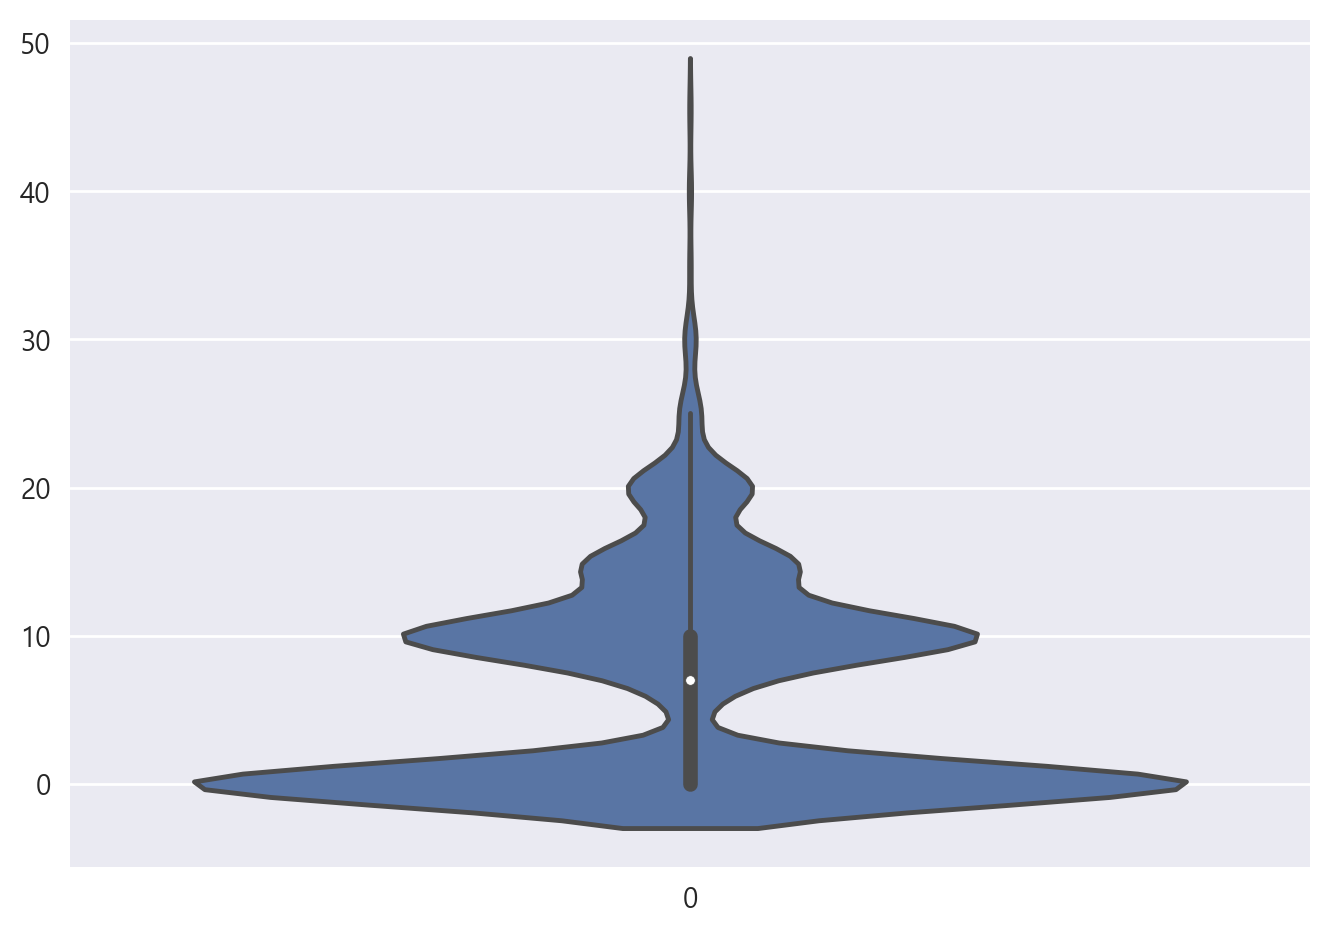

In [35]:
# "LCD" violinplot
sns.violinplot(data=df['LCD'])

<Axes: >

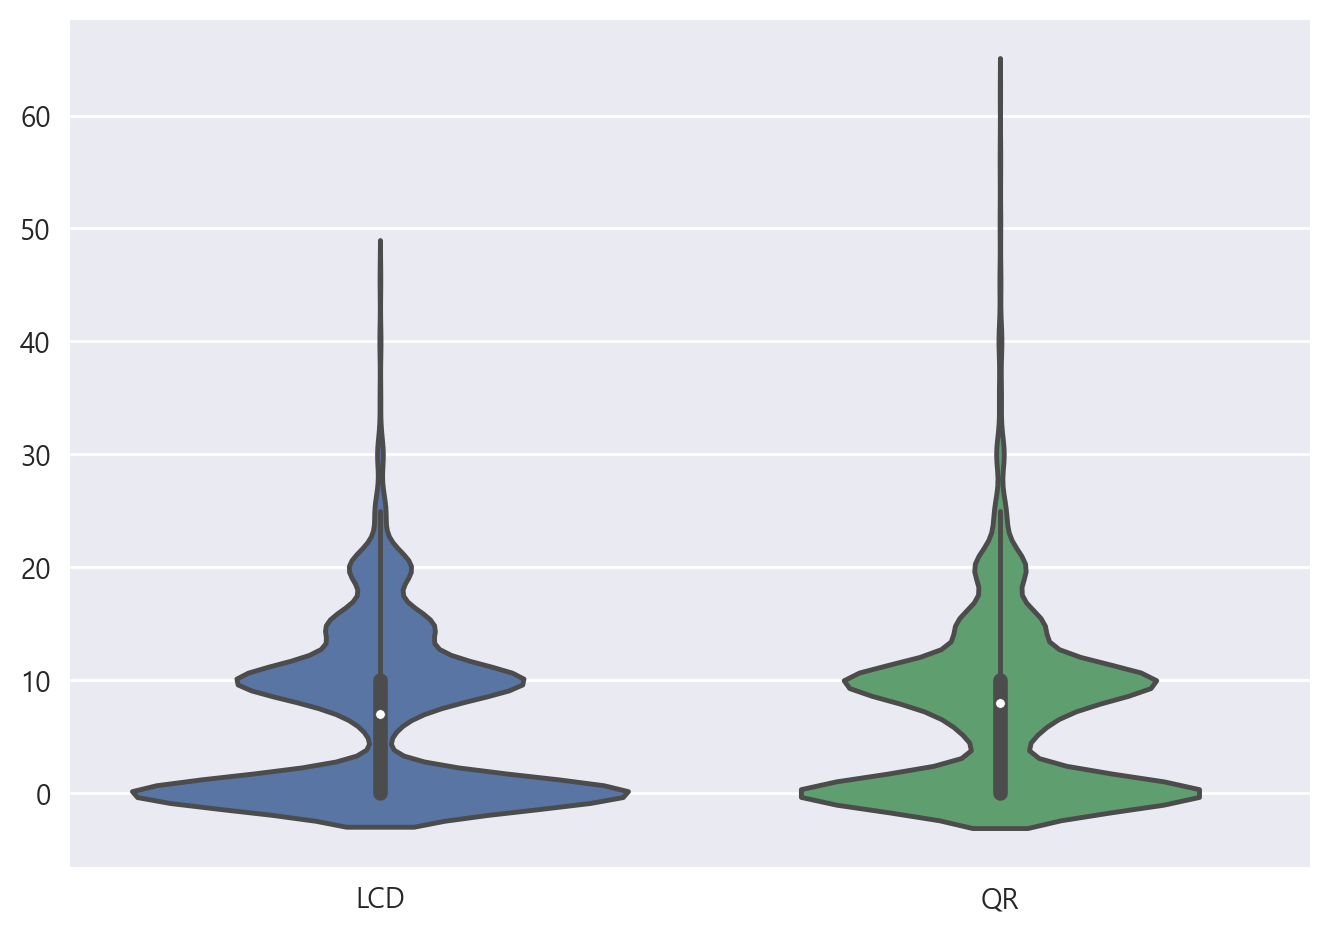

In [36]:
# "LCD", "QR" violinplot
sns.violinplot(data=df[['LCD', 'QR']])

<Axes: >

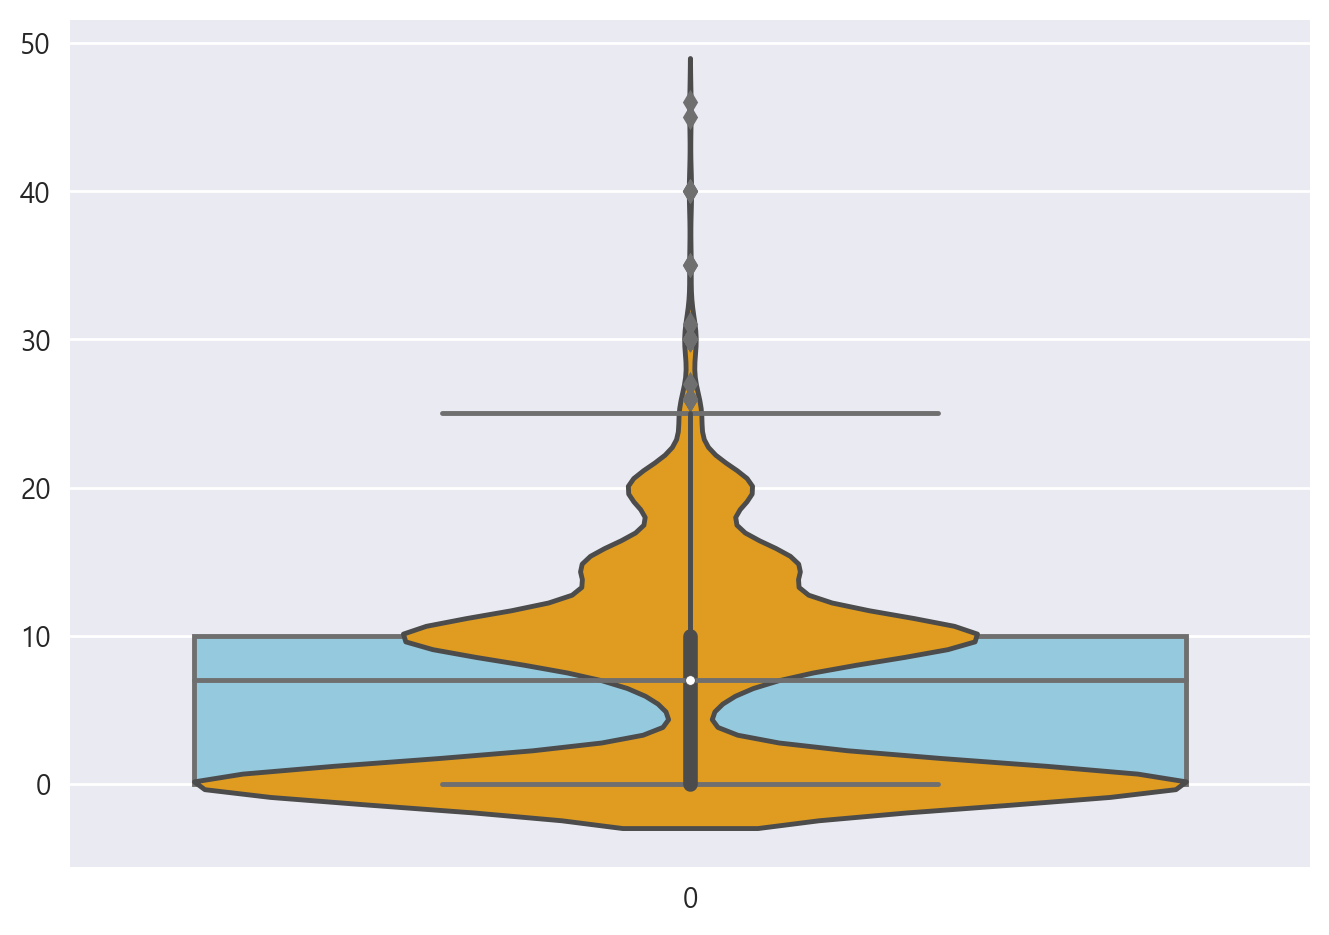

In [37]:
# "LCD" boxplot
sns.boxplot(data=df['LCD'], color='skyblue')
# "LCD", "QR" violinplot
sns.violinplot(data=df['LCD'], color='orange')

## 두 개의 수치 데이터 비교

<Axes: xlabel='경도', ylabel='위도'>

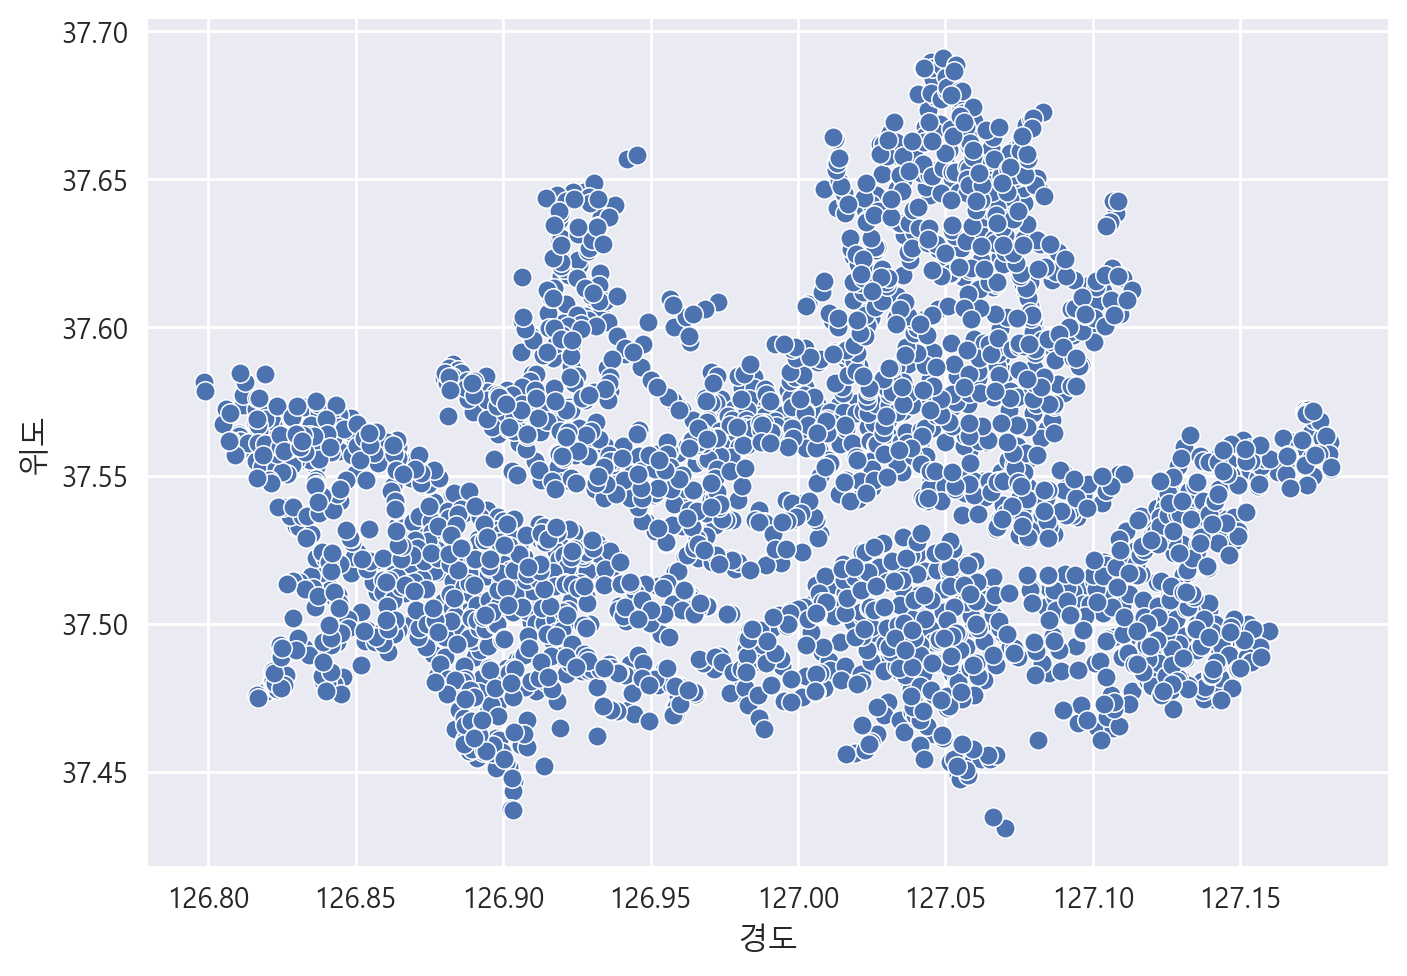

In [38]:
# scatterplot 으로 경도와 위도를 시각화 합니다.
sns.scatterplot(data=df, x='경도', y='위도')
# scatter + hist

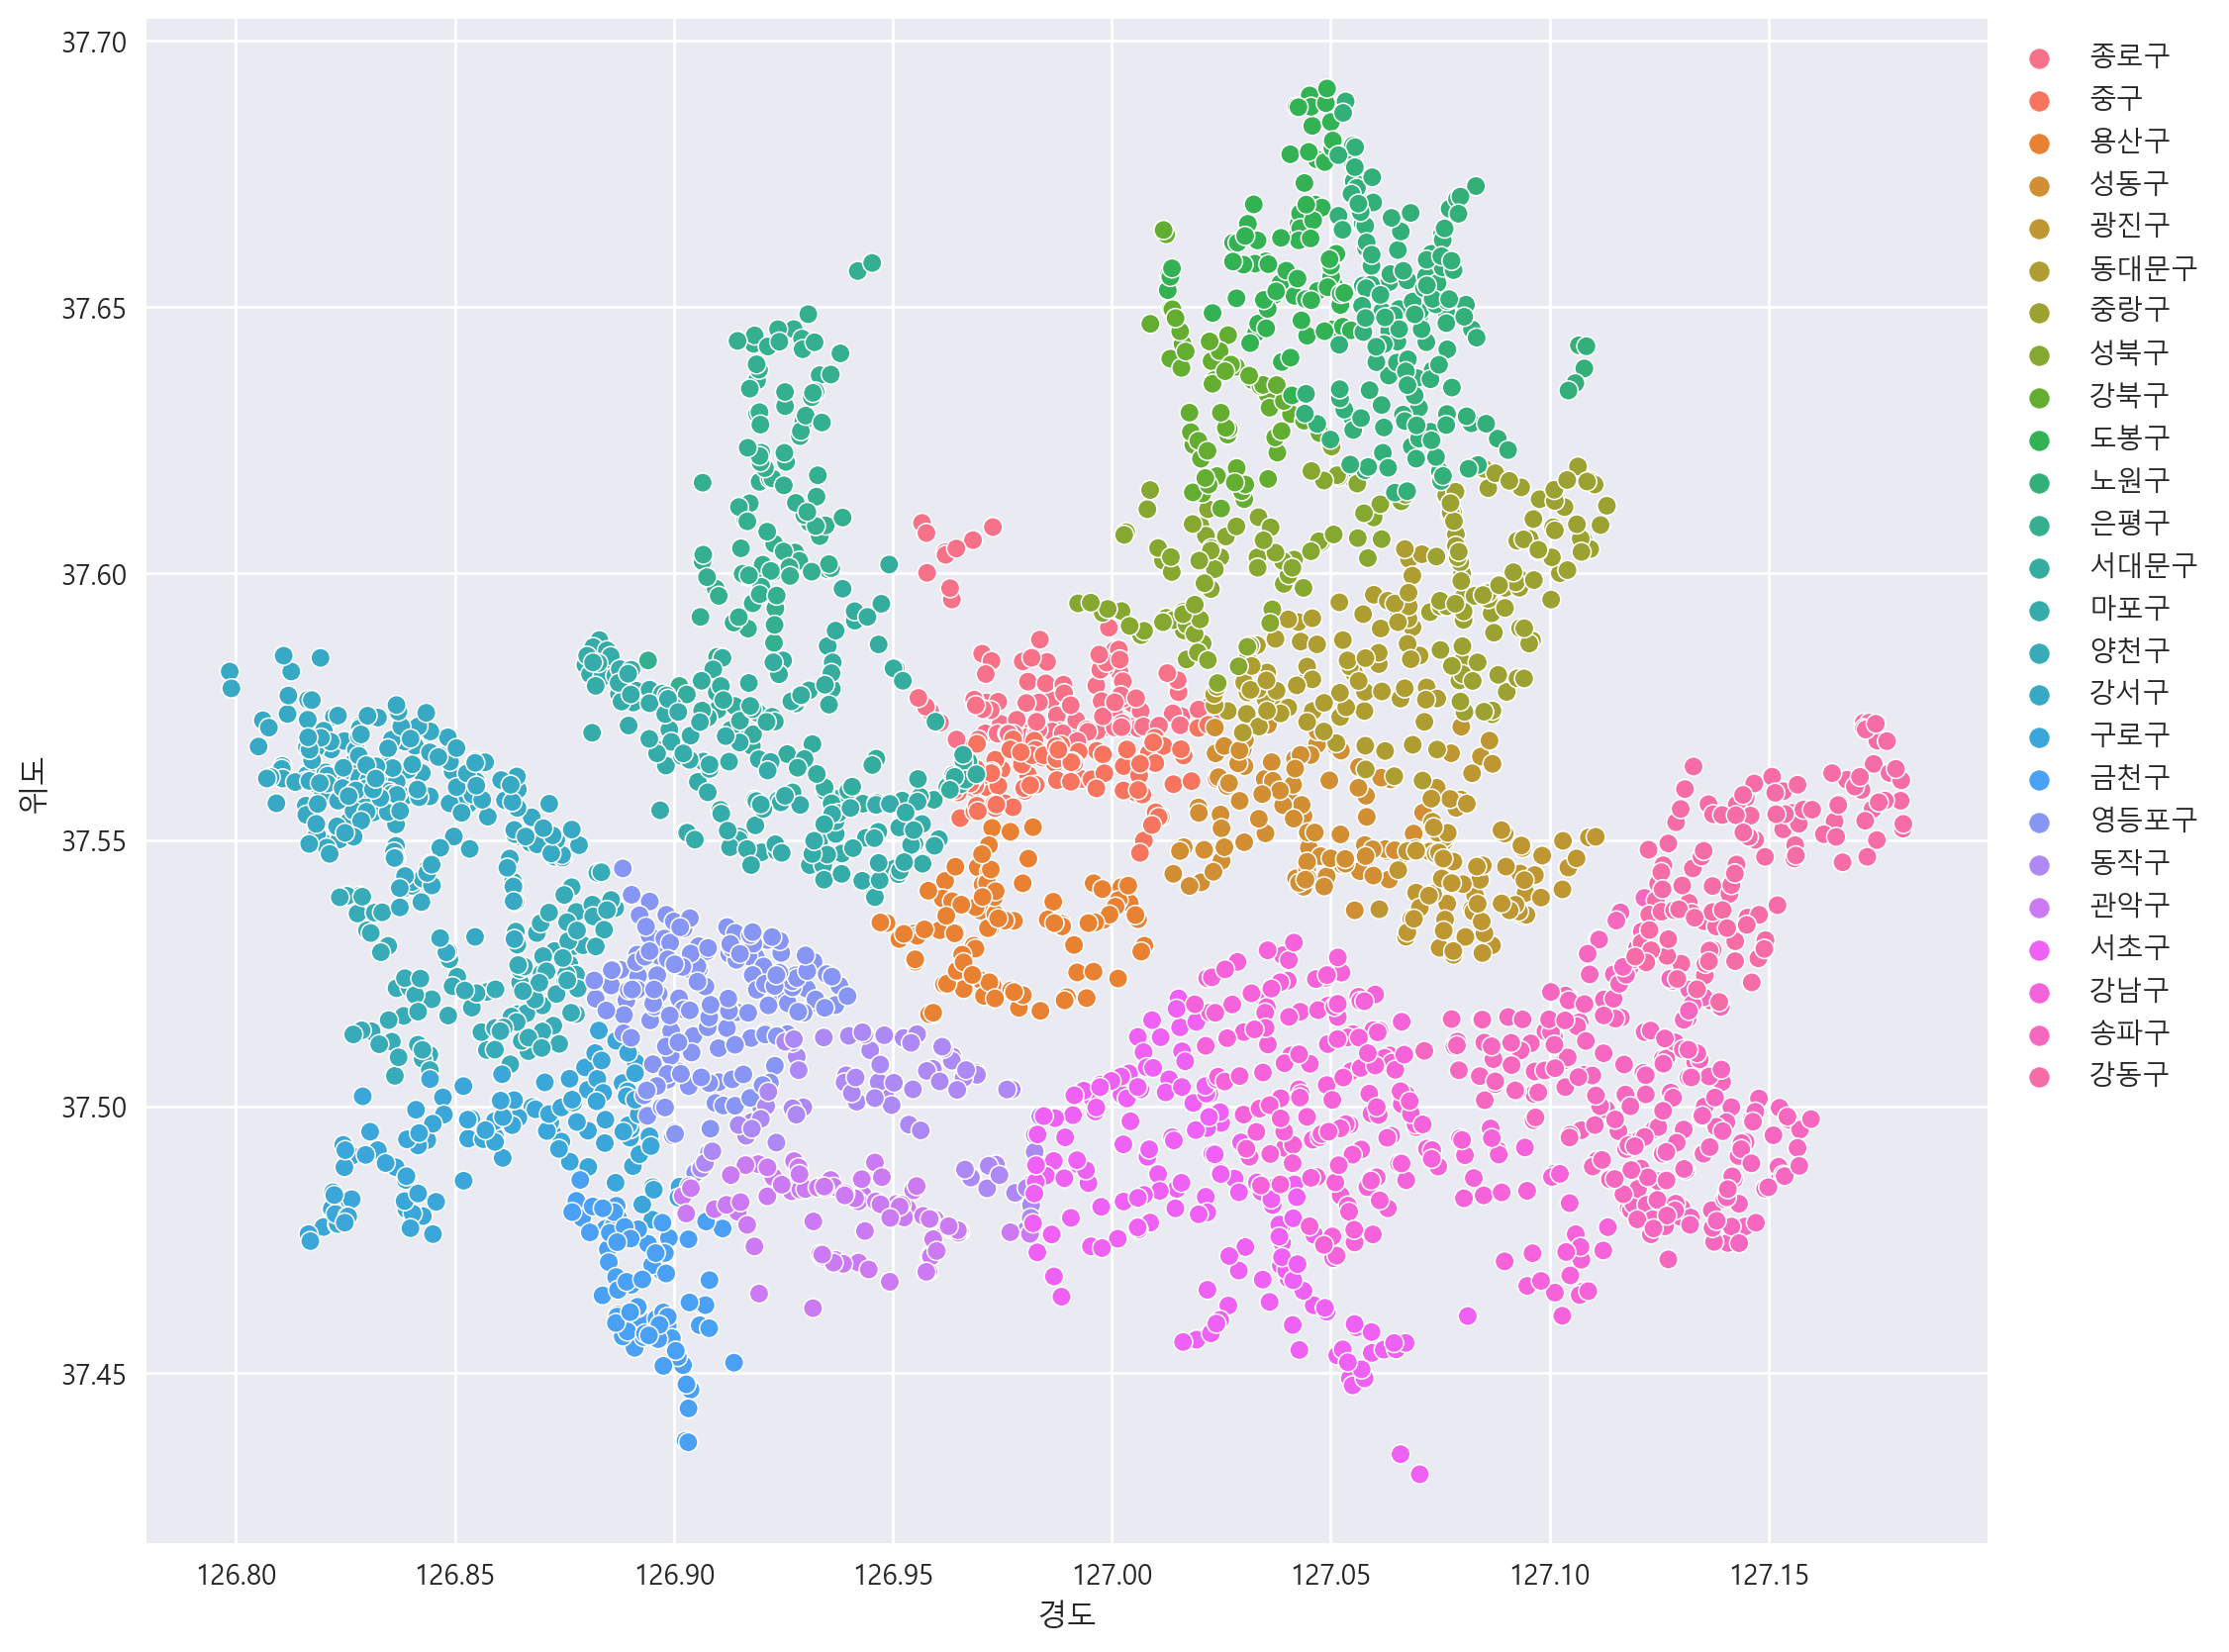

In [39]:
# scatterplot 으로 경도와 위도를 시각화 합니다. 자치구에 따라 다른 색상으로 표시합니다.
plt.figure(figsize=(12, 10)) # 도화지를 그리고(도화지사이즈)

sns.scatterplot(data=df, x='경도', y='위도', hue='자치구')
plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc='lower left')

# 범례의 위치(bbox_to_anchor)
# (0,0) : 왼쪽하단 모서리, (0.1) : 왼쪽 상단 모서리,  (1,0) : 오른쪽 하단모서리, (1,1) : 오른쪽 상단 모서리
# 범례의 정렬(loc)
# Location String      Location Code
#         ==================   =============
#         'best' (Axes only)   0
#         'upper right'        1
#         'upper left'         2
#         'lower left'         3
#         'lower right'        4
#         'right'              5
#         'center left'        6
#         'center right'       7
#         'lower center'       8
#         'upper center'       9
#         'center'             10
#         ==================   =============

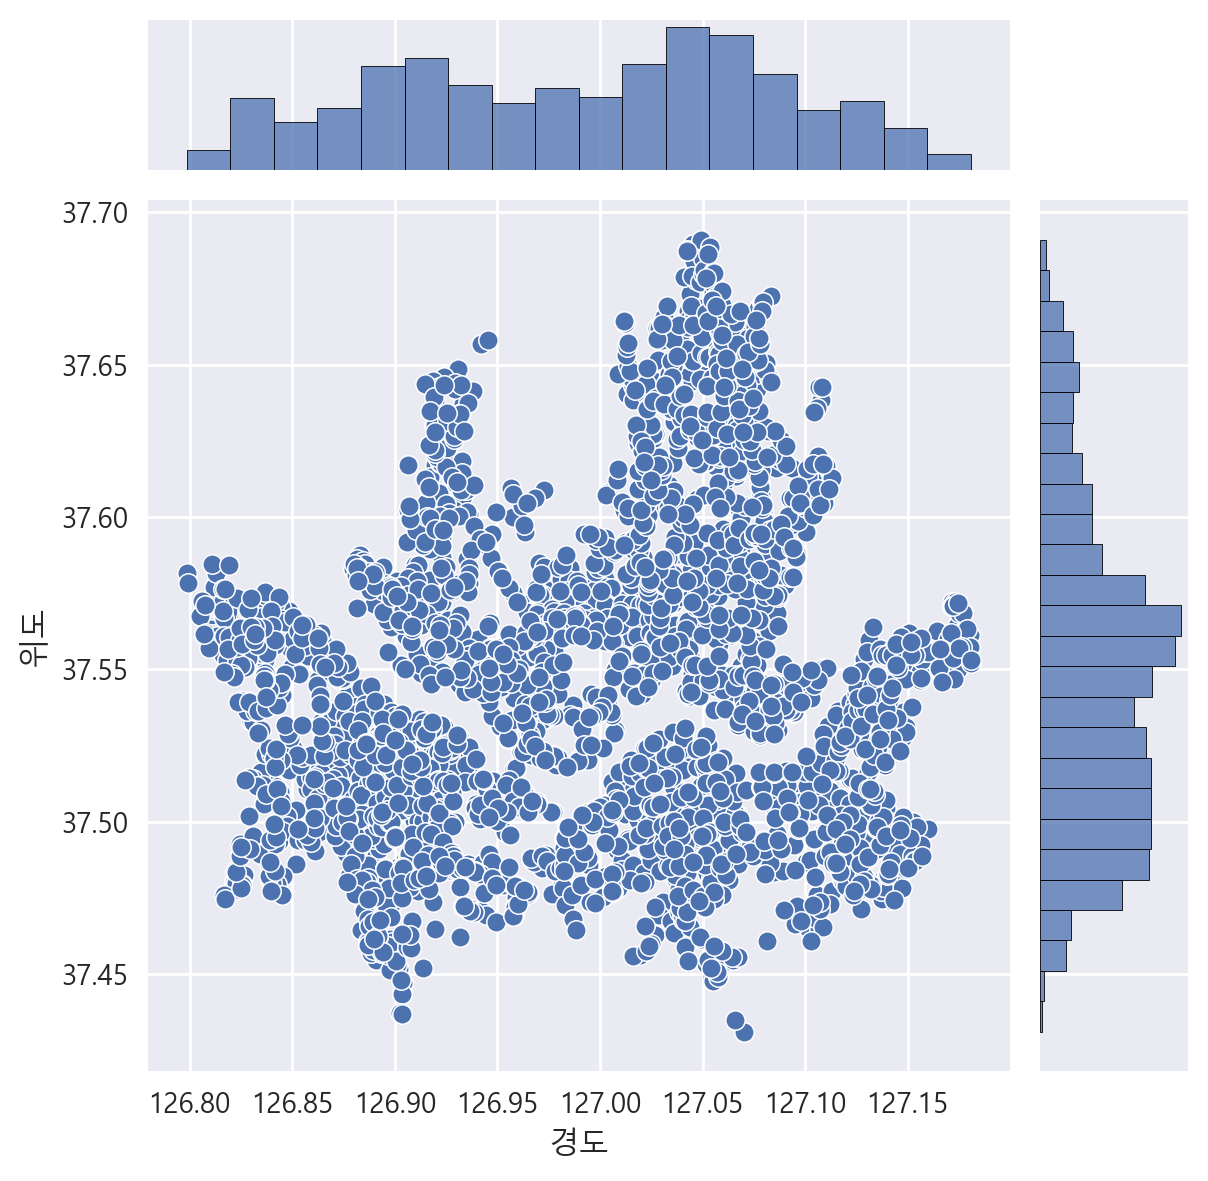

In [40]:
# jointplot 으로 경도와 위도를 시각화 합니다. 
sns.jointplot(data=df, x='경도', y='위도')
# scatter + hist

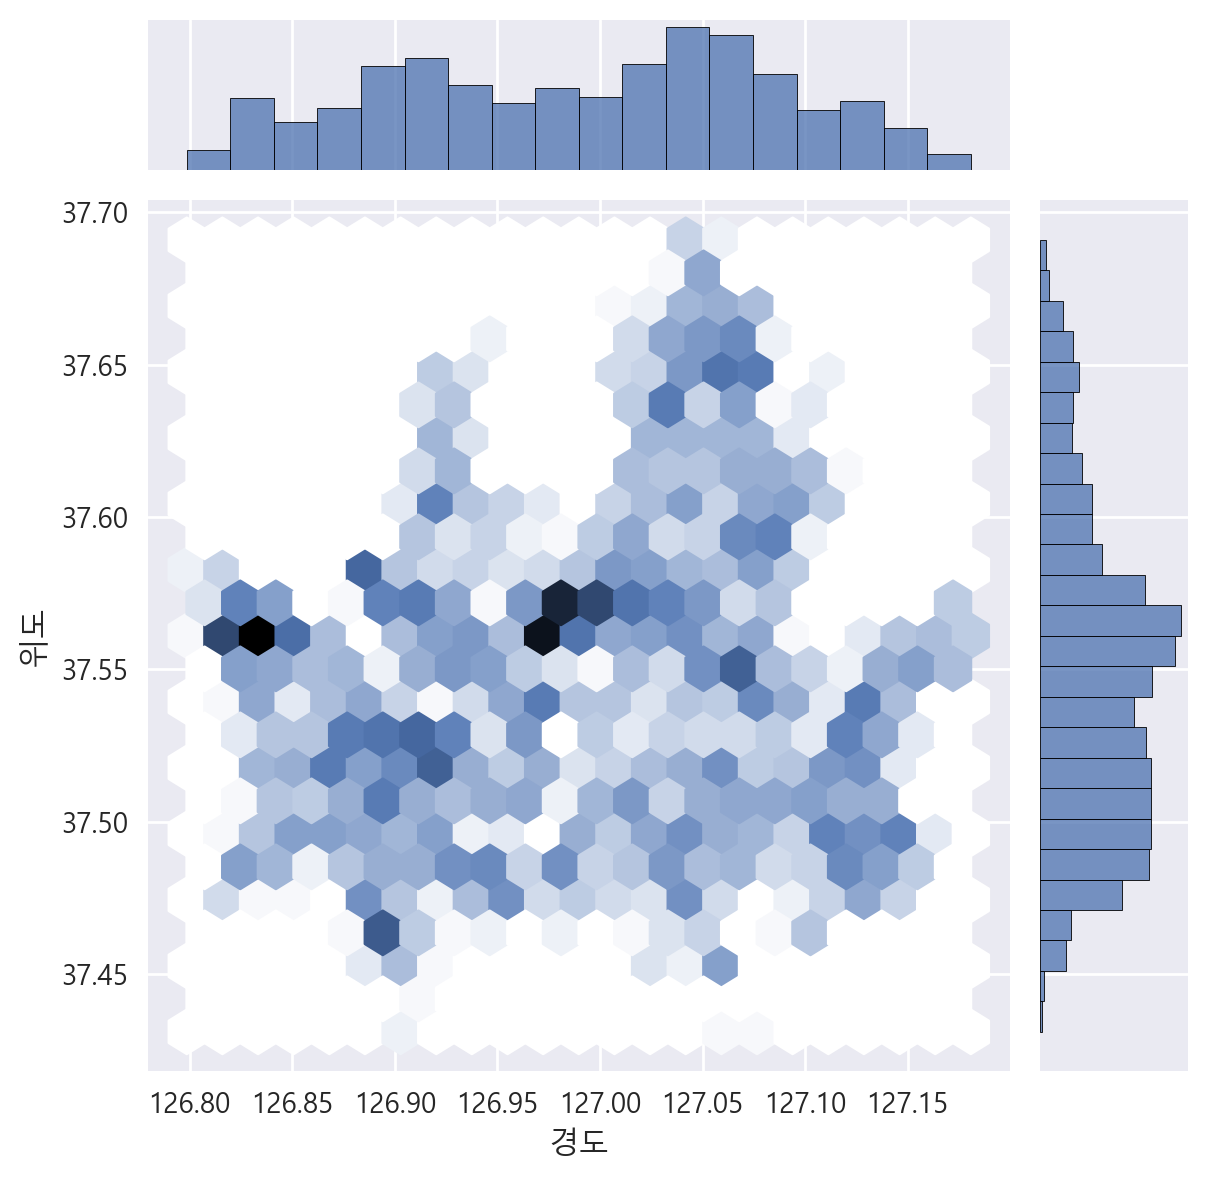

In [41]:
# jointplot 으로 경도와 위도를 시각화 합니다. kind="hex"
sns.jointplot(data=df, x='경도', y='위도', kind='hex')

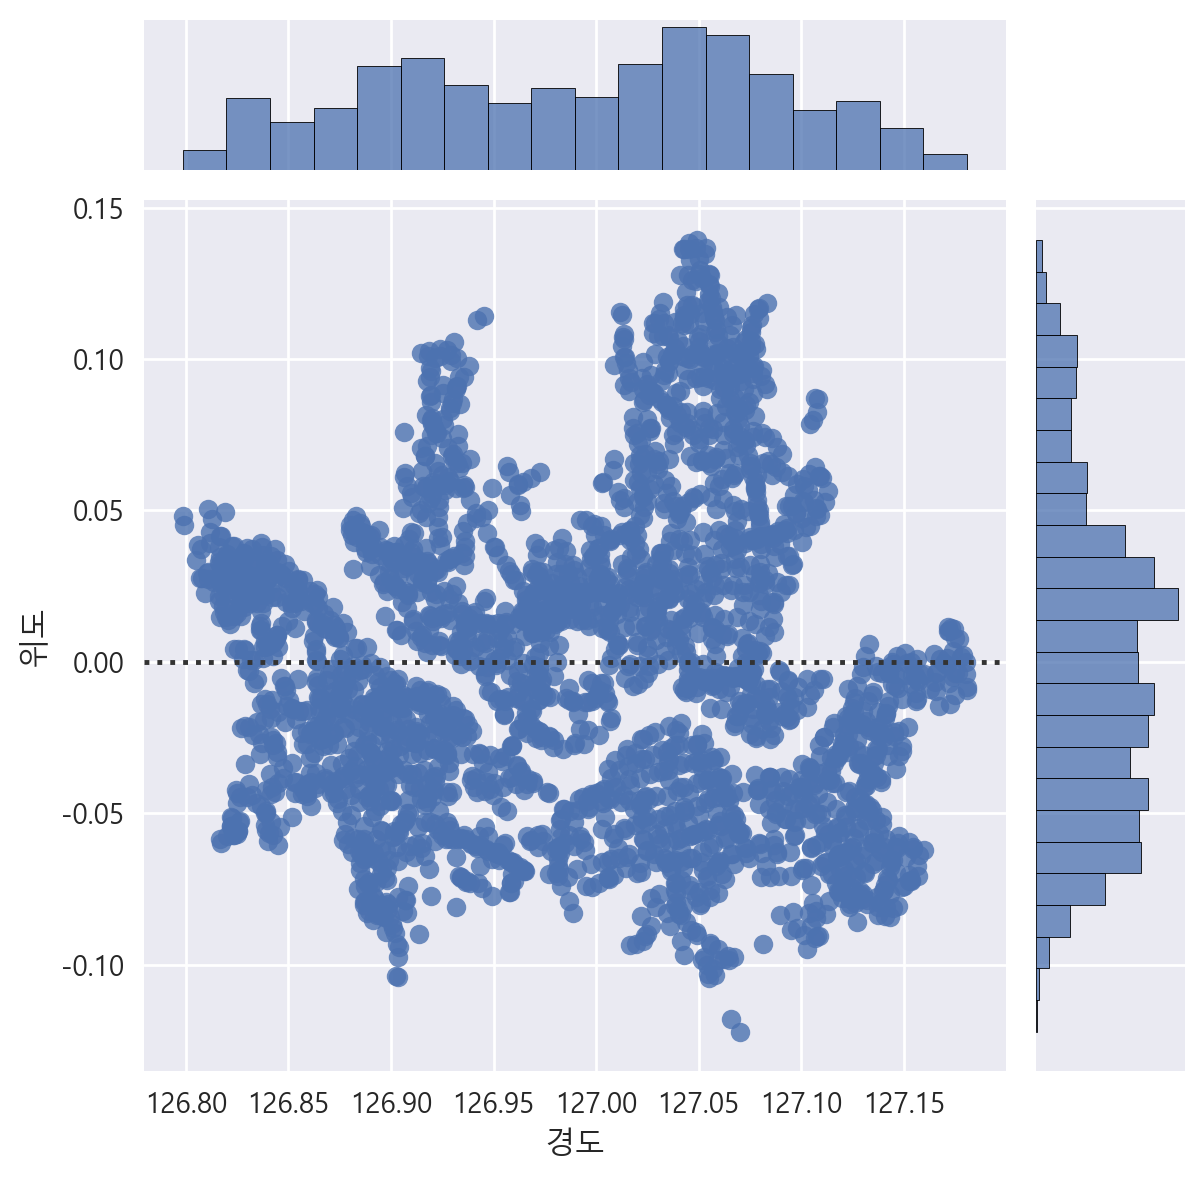

In [42]:
# jointplot 으로 경도와 위도를 시각화 합니다.
# kind ='scatter' 기본값 : 포인터 위치
# kind='hex' 육각형빈(hexbin) : 밀도표현 강조
# kind='kde' 커널밀도추정(Kerrnel Density Estimation, KDE) : 연속적인 확률밀도를 부드러운 곡선으로 표현
# kind='reg' 회귀선(Regression line) : 두변수(x축,y축)간의 선형관계를 탐색할 때 유용
# kind='resid' 잔차플롯(residual plot) : 회귀선의 예측된 값과 실제 포인트값간의 차이를 y축에 표현
sns.jointplot(data=df, x='경도', y='위도', kind='resid')

### 상관 분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98



### 상관계수 구하기

In [43]:
# 숫자 컬럼만 서브프레임으로 가져와서 상관관계 파악해보기
df_cols_number = df.select_dtypes(np.number)
df_cols_number

대여소번호         위도          경도   LCD    QR  자전거수    연도   월   일  요일
0      301.0  37.575794  126.971451  20.0  20.0    40  2015  10   7   2
1      302.0  37.575947  126.974060  12.0  12.0    24  2015  10   7   2
2      303.0  37.571770  126.974663   8.0   8.0    16  2015  10   7   2
3      305.0  37.572559  126.978333  16.0  16.0    32  2015   1   7   2
4      307.0  37.570000  126.971100  11.0  11.0    22  2015  10   7   2
...      ...        ...         ...   ...   ...   ...   ...  ..  ..  ..
2757  3700.0  37.548164  127.122574   0.0   8.0     8  2022   7   8   4
2758  3701.0  37.523281  127.146133   0.0   8.0     8  2022  10  12   2
2759  4951.0  37.547966  127.135162   0.0   5.0     5  2022   9  29   3
2760  4952.0  37.541466  127.130257   0.0   5.0     5  2023   1  18   2
2761  4953.0  37.533466  127.140503   0.0  10.0    10  2023   7  13   3

[2762 rows x 10 columns]

In [44]:
corr = df_cols_number.corr()
corr

대여소번호        위도        경도       LCD        QR      자전거수        연도  \
대여소번호  1.000000 -0.100301  0.077351 -0.623081  0.217013 -0.341583  0.814594   
위도    -0.100301  1.000000  0.129779 -0.028130  0.024273 -0.002489 -0.006371   
경도     0.077351  0.129779  1.000000 -0.021268 -0.095179 -0.103310  0.044931   
LCD   -0.623081 -0.028130 -0.021268  1.000000 -0.349520  0.547117 -0.806465   
QR     0.217013  0.024273 -0.095179 -0.349520  1.000000  0.593034  0.356743   
자전거수  -0.341583 -0.002489 -0.103310  0.547117  0.593034  1.000000 -0.374344   
연도     0.814594 -0.006371  0.044931 -0.806465  0.356743 -0.374344  1.000000   
월     -0.072509  0.046903 -0.069157  0.350277 -0.244756  0.082355 -0.324583   
일      0.002104 -0.030267  0.016919 -0.042197  0.002173 -0.034322  0.065625   
요일    -0.065150  0.055381  0.001361 -0.006154  0.050696  0.040004  0.021455   

              월         일        요일  
대여소번호 -0.072509  0.002104 -0.065150  
위도     0.046903 -0.030267  0.055381  
경도    -0.069157  0.016919  0.001361  
LCD    0.350277 -0.042197 -0.006154  
QR    -0.244756  0.002173  0.050696  
자전거수   0.082355 -0.034322  0.040004  
연도    -0.324583  0.065625  0.021455  
월      1.000000 -0.155433  0.026917  
일     -0.155433  1.000000  0.008373  
요일     0.026917  0.008373  1.000000

<Axes: >

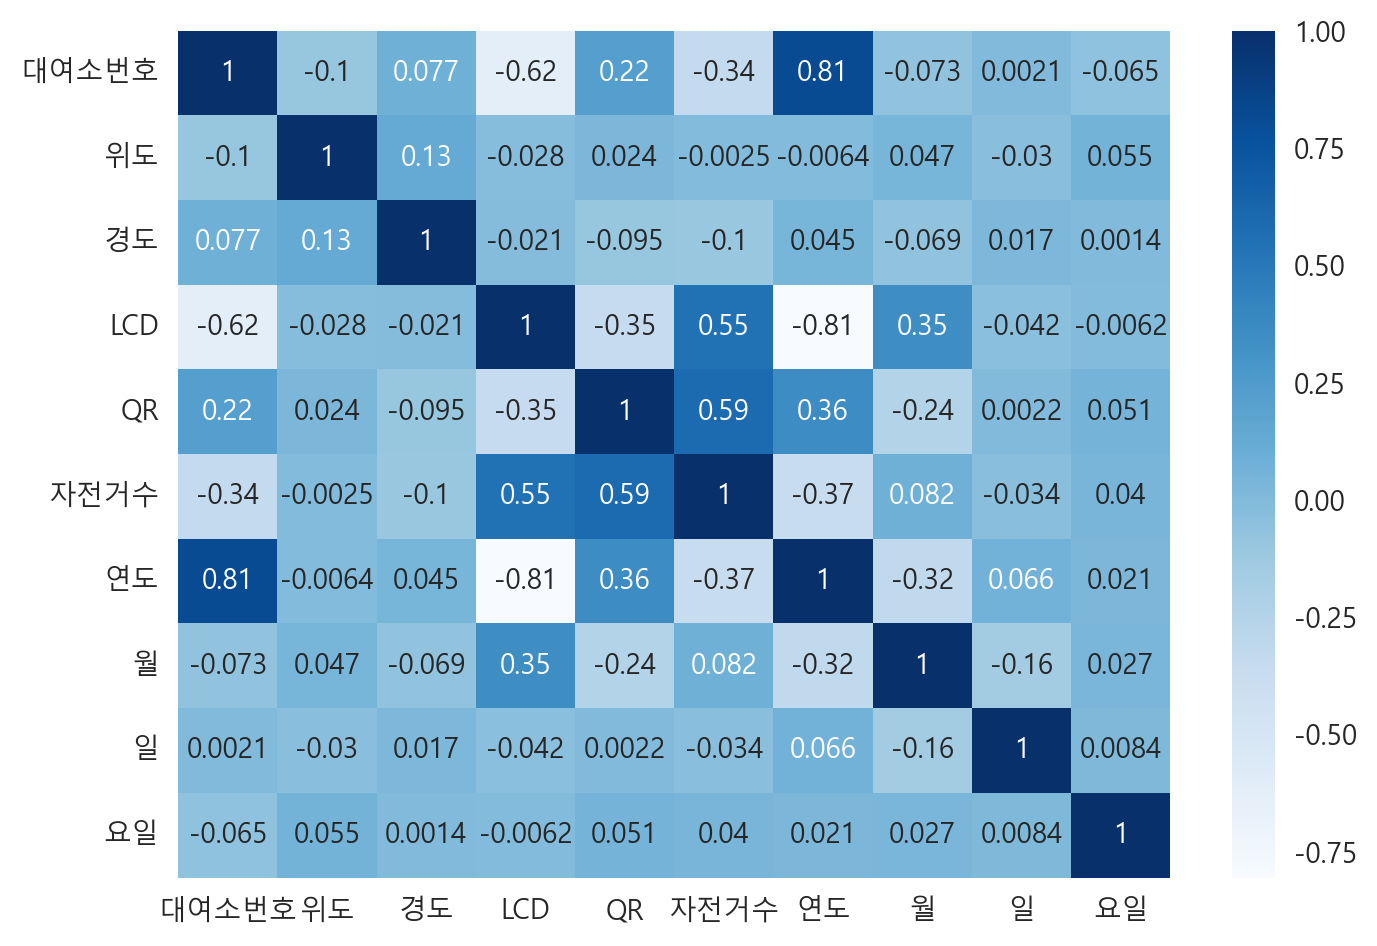

In [45]:
# heatmap 시각화
sns.heatmap(data=corr, annot=True, cmap='Blues')

In [46]:
# mask 구하기
print(np.ones_like(corr))
print()
mask = np.triu(np.ones_like(corr))
print(mask)
print()
mask2 = np.tril(np.ones_like(corr))
print(mask2)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [47]:
for ele in plt.colormaps():
    print(ele, end=", ")

magma, inferno, plasma, viridis, cividis, twilight, twilight_shifted, turbo, Blues, BrBG, BuGn, BuPu, CMRmap, GnBu, Greens, Greys, OrRd, Oranges, PRGn, PiYG, PuBu, PuBuGn, PuOr, PuRd, Purples, RdBu, RdGy, RdPu, RdYlBu, RdYlGn, Reds, Spectral, Wistia, YlGn, YlGnBu, YlOrBr, YlOrRd, afmhot, autumn, binary, bone, brg, bwr, cool, coolwarm, copper, cubehelix, flag, gist_earth, gist_gray, gist_heat, gist_ncar, gist_rainbow, gist_stern, gist_yarg, gnuplot, gnuplot2, gray, hot, hsv, jet, nipy_spectral, ocean, pink, prism, rainbow, seismic, spring, summer, terrain, winter, Accent, Dark2, Paired, Pastel1, Pastel2, Set1, Set2, Set3, tab10, tab20, tab20b, tab20c, magma_r, inferno_r, plasma_r, viridis_r, cividis_r, twilight_r, twilight_shifted_r, turbo_r, Blues_r, BrBG_r, BuGn_r, BuPu_r, CMRmap_r, GnBu_r, Greens_r, Greys_r, OrRd_r, Oranges_r, PRGn_r, PiYG_r, PuBu_r, PuBuGn_r, PuOr_r, PuRd_r, Purples_r, RdBu_r, RdGy_r, RdPu_r, RdYlBu_r, RdYlGn_r, Reds_r, Spectral_r, Wistia_r, YlGn_r, YlGnBu_r, YlOrBr

<Axes: >

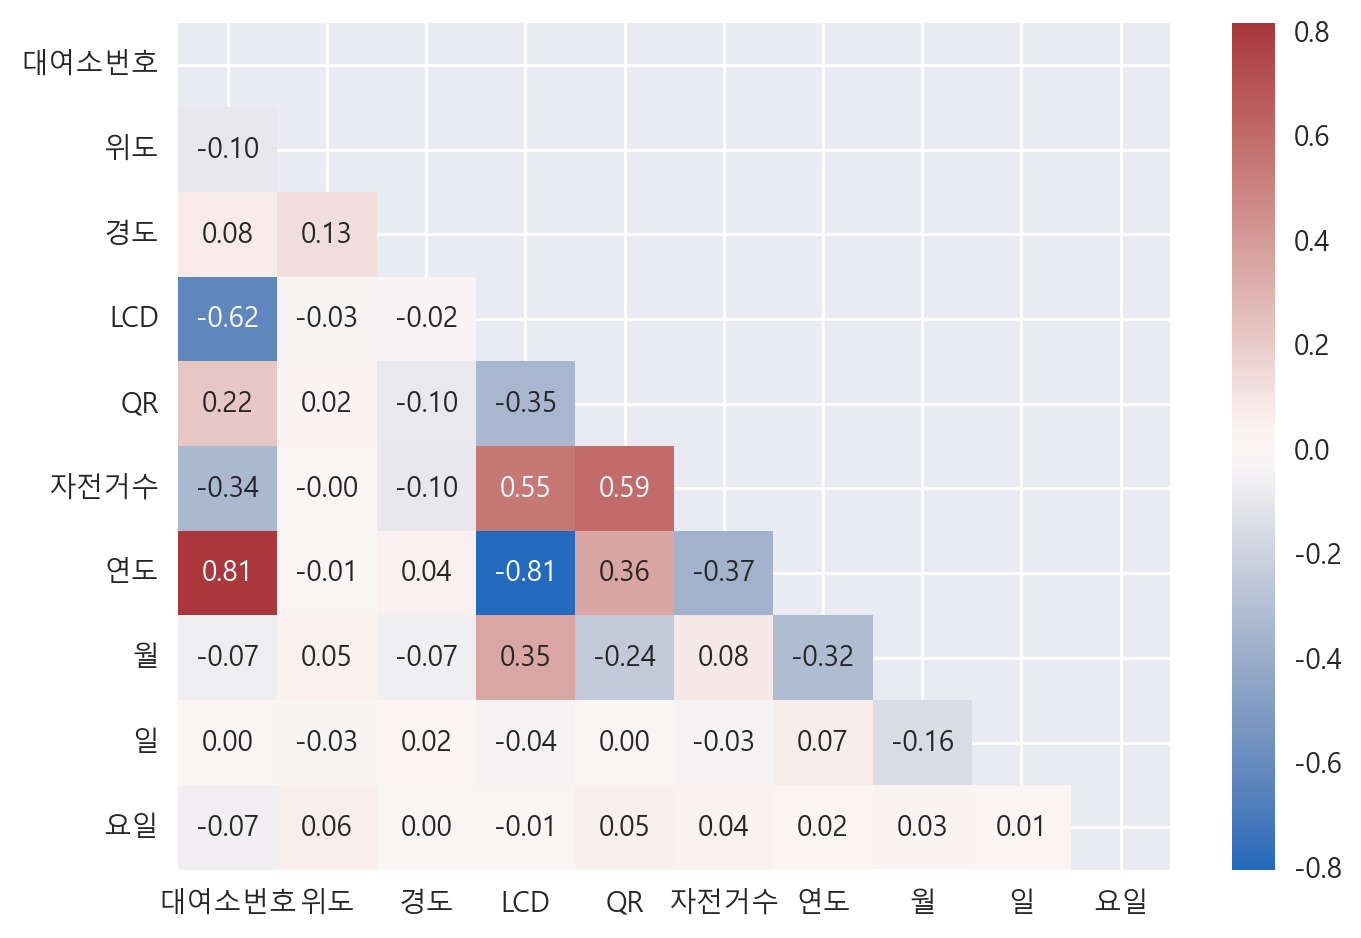

In [48]:
# heatmap 시각화
# mask : 특정 셀(요소)를 숨기는 설정
sns.heatmap(data=corr, annot=True, cmap='vlag', mask=mask, fmt='.2f')

## 범주형 데이터

## 변수 하나의 빈도수 구하기

In [49]:
df.dtypes

대여소번호    float64
대여소명      object
자치구       object
상세주소      object
위도       float64
경도       float64
설치시기      object
LCD      float64
QR       float64
운영방식      object
자전거수       int64
연도         int64
월          int64
일          int64
요일         int64
dtype: object

In [50]:
# 컬럼별 유니크한값의 빈도 수
df.nunique()

대여소번호    2762
대여소명     2761
자치구        25
상세주소     2682
위도       2667
경도       2680
설치시기     1185
LCD        30
QR         42
운영방식        2
자전거수       59
연도          9
월          12
일          31
요일          7
dtype: int64

In [51]:
# 대여소별 운영방식 value_counts
op_count = df['운영방식'].value_counts()
op_count

운영방식
QR     1648
LCD    1114
Name: count, dtype: int64

<Axes: xlabel='운영방식'>

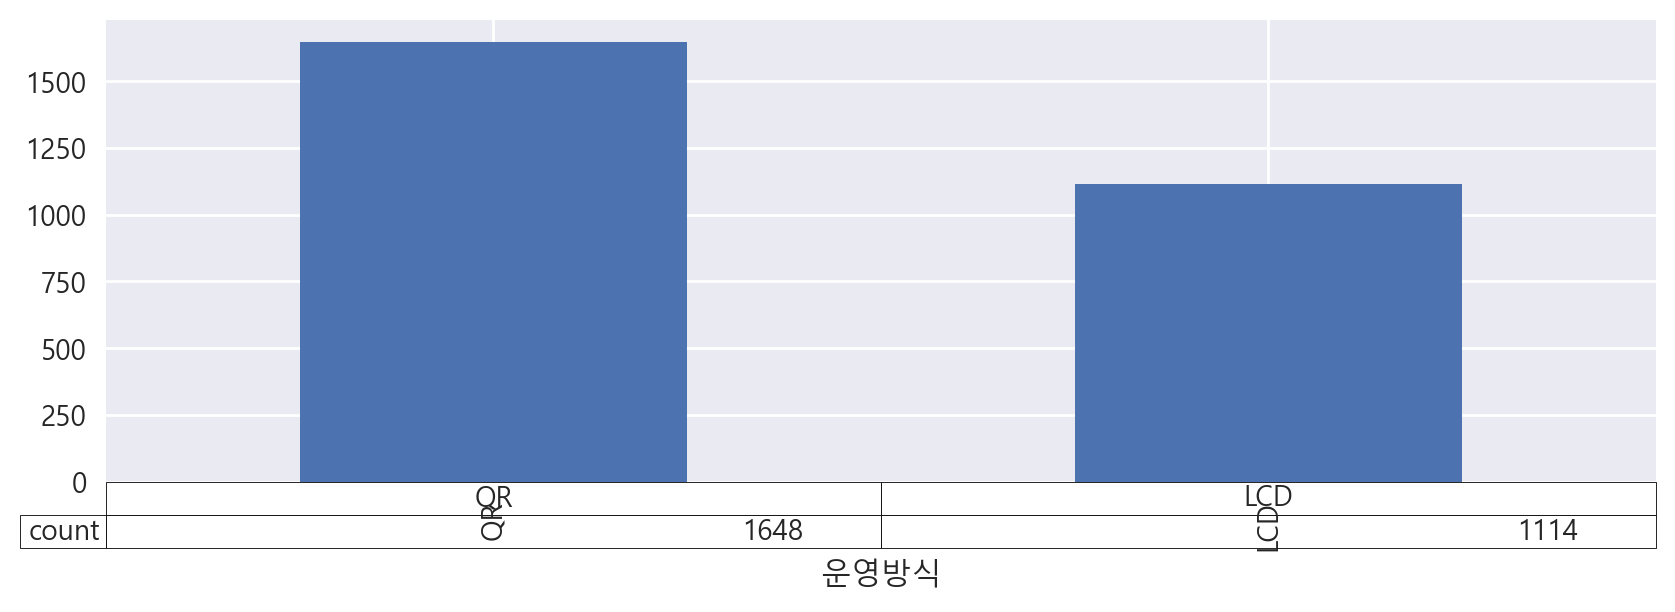

In [52]:
# 대여소별 운영방식 value_counts
plt.figure(figsize=(10, 3))
op_count.plot(kind='bar', table=True)

In [53]:
# 대여소별 운영방식 value_counts 의 비율로 구하기
df['운영방식'].value_counts(normalize=True) * 100

운영방식
QR     59.666908
LCD    40.333092
Name: proportion, dtype: float64

In [54]:
# 자치구별 대여소 빈도 수 value_counts 로 구하기
gu_count = df['자치구'].value_counts()
gu_count

자치구
송파구     217
강서구     192
강남구     175
영등포구    158
서초구     148
노원구     143
마포구     121
강동구     120
구로구     115
양천구     111
종로구     102
은평구      99
중랑구      94
성동구      94
용산구      92
중구       89
광진구      84
동대문구     83
성북구      82
서대문구     81
관악구      77
도봉구      76
금천구      75
동작구      74
강북구      60
Name: count, dtype: int64

<Axes: ylabel='자치구'>

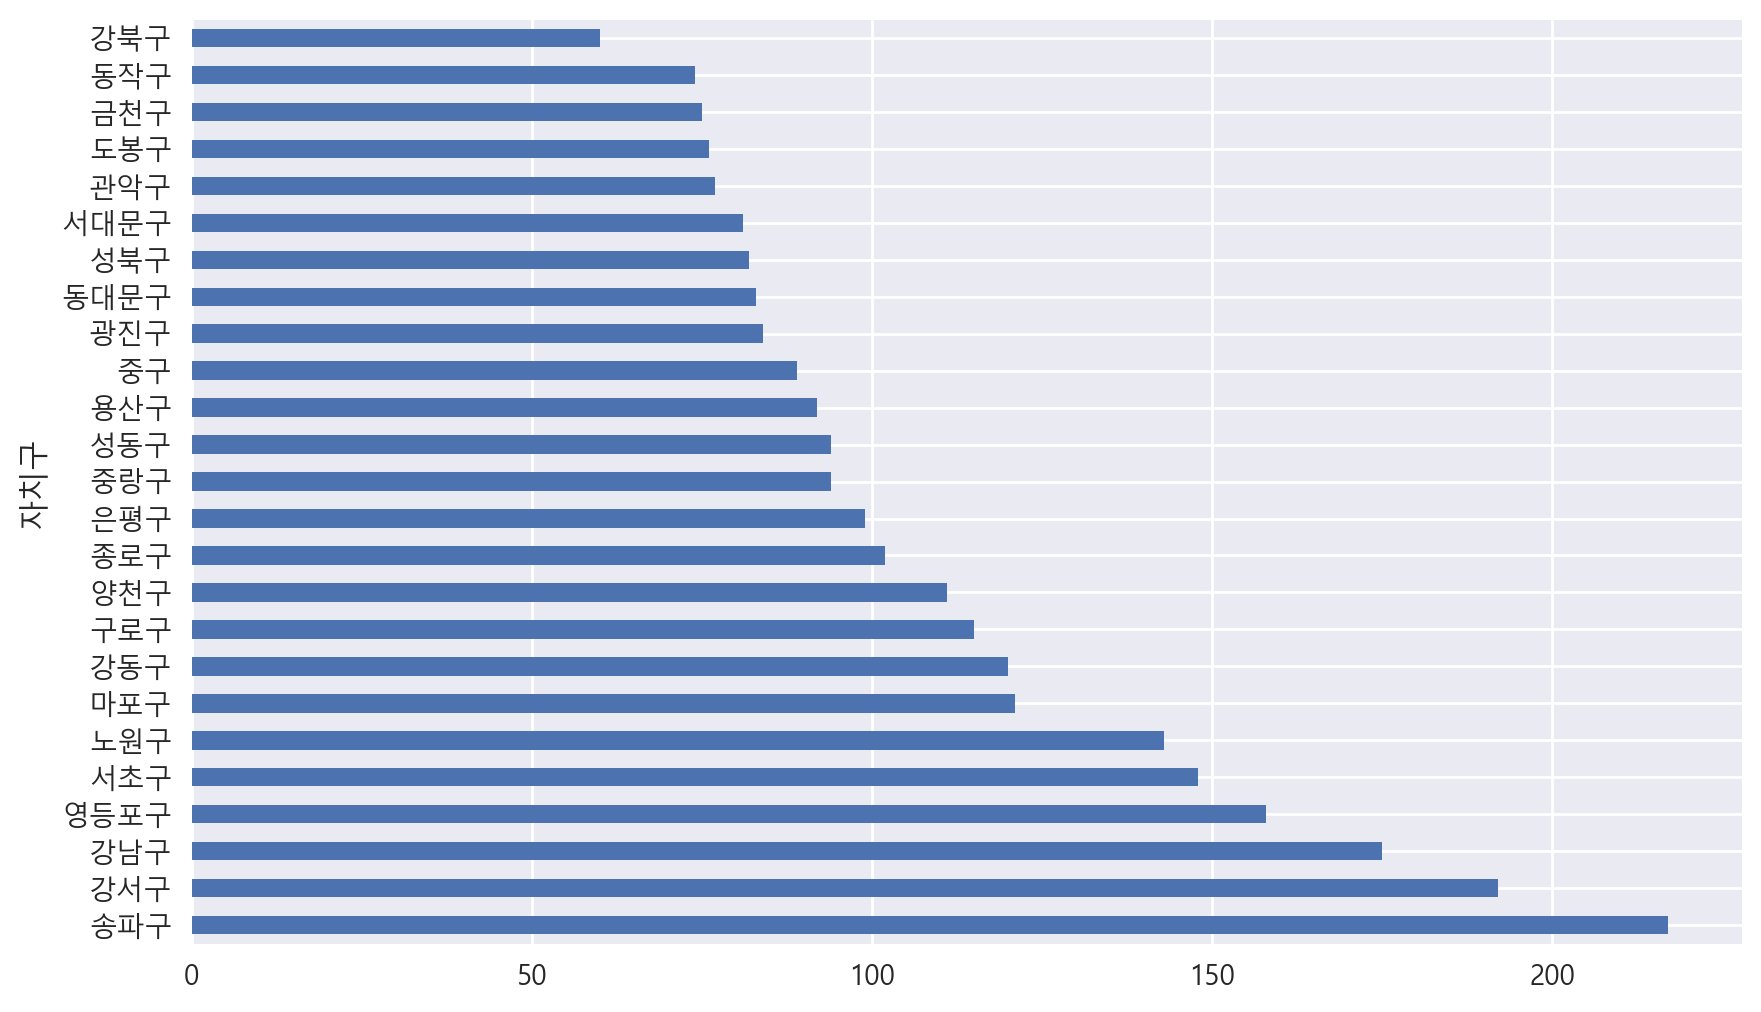

In [55]:
# 위의 구한 시리즈로 자치구별 빈도수 구하기
plt.figure(figsize=(10, 6))
gu_count.plot.barh()

<Axes: xlabel='count', ylabel='자치구'>

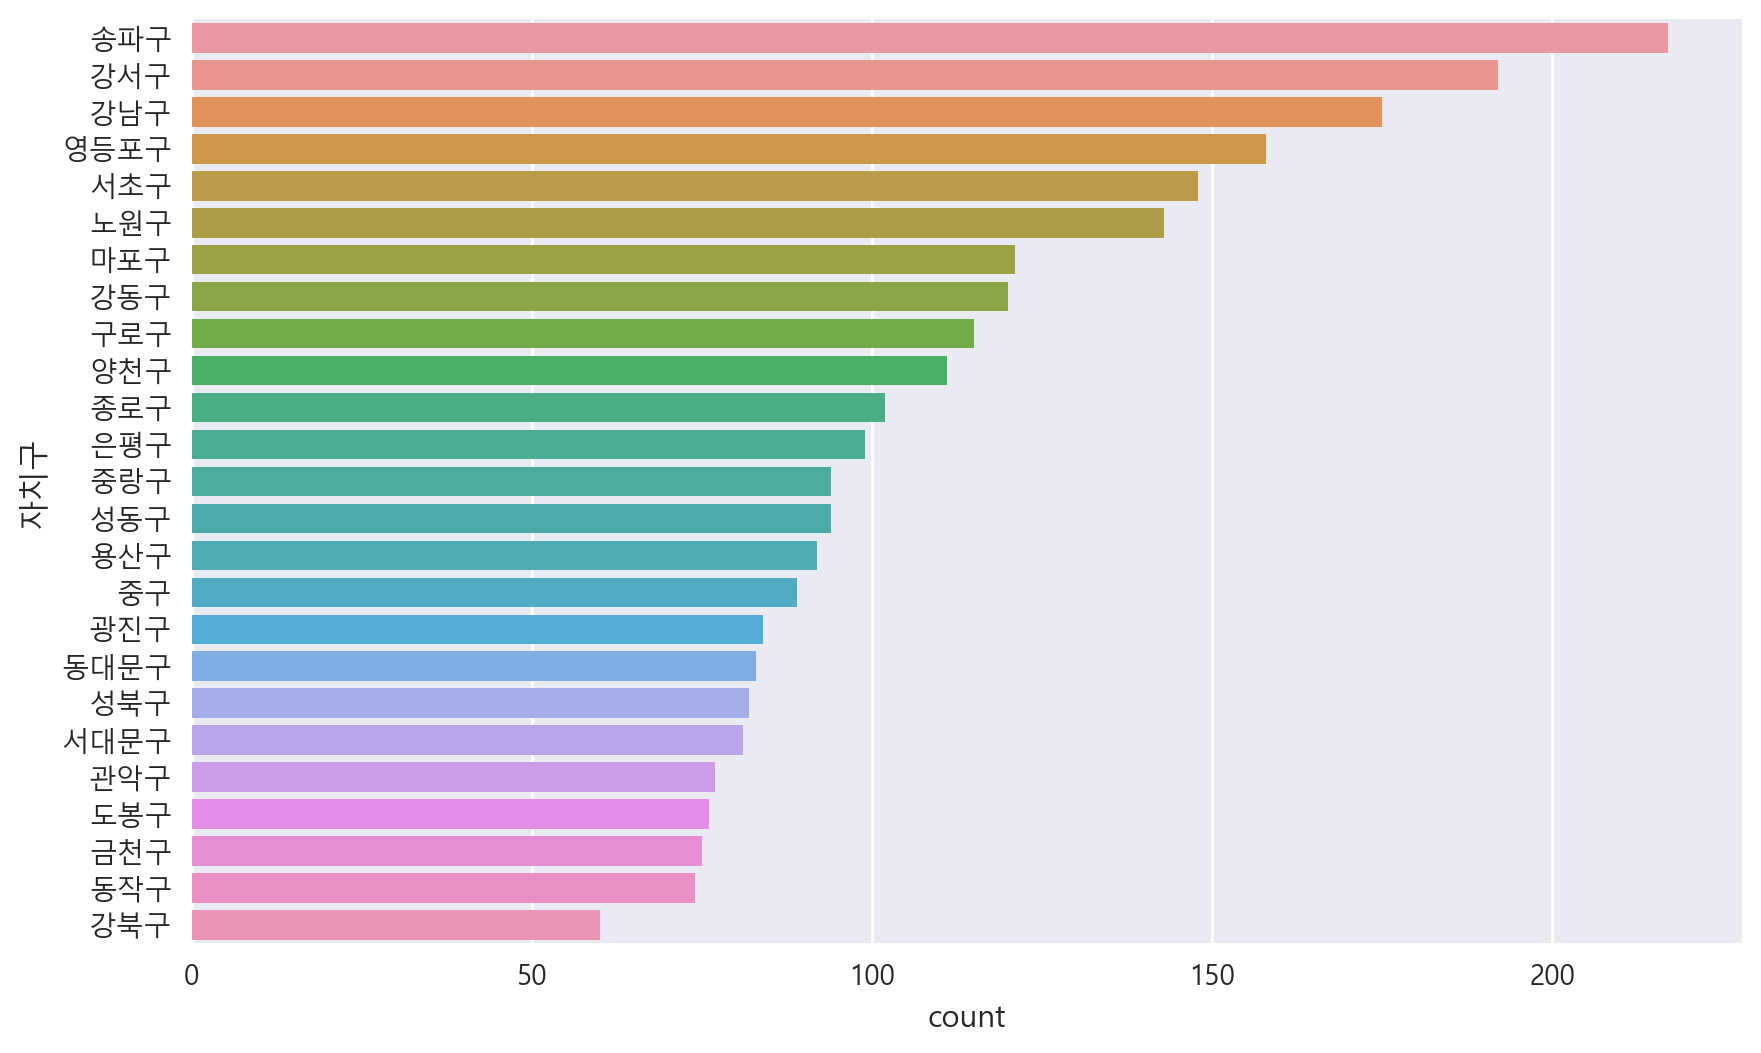

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='자치구', order=gu_count.index)

## 변수 두 개의 빈도수 

In [57]:
# 운영방식, 자치구 교차표 구하기
# crosstab : 두 개 이상의 범주형 변수 사이의 교차표 생성, 주로 두 변수간의 관계를 요약하거나 분석할 때 사용
pd.crosstab(index=df['운영방식'], columns=df['자치구'])

자치구   강남구  강동구  강북구  강서구  관악구  광진구  구로구  금천구  노원구  도봉구  ...  성동구  성북구  송파구  \
운영방식                                                    ...                  
LCD    89   53   35   67   43   35   63   40   57   33  ...   26   49   84   
QR     86   67   25  125   34   49   52   35   86   43  ...   68   33  133   

자치구   양천구  영등포구  용산구  은평구  종로구  중구  중랑구  
운영방식                                     
LCD    49    41   25   52   26  20   45  
QR     62   117   67   47   76  69   49  

[2 rows x 25 columns]

In [58]:
pd.pivot_table(df, index='운영방식', columns='자치구', aggfunc='count')

LCD                                       ... 자전거수                        \
자치구  강남구 강동구 강북구  강서구 관악구 광진구 구로구 금천구 노원구 도봉구  ...  성동구 성북구  송파구 양천구 영등포구 용산구   
운영방식                                           ...                              
LCD   89  53  35   67  43  35  63  40  57  33  ...   26  49   84  49   41  25   
QR    86  67  25  125  34  49  52  35  86  43  ...   68  33  133  62  117  67   

                      
자치구  은평구 종로구  중구 중랑구  
운영방식                  
LCD   52  26  20  45  
QR    47  76  69  49  

[2 rows x 325 columns]

<Axes: xlabel='count', ylabel='자치구'>

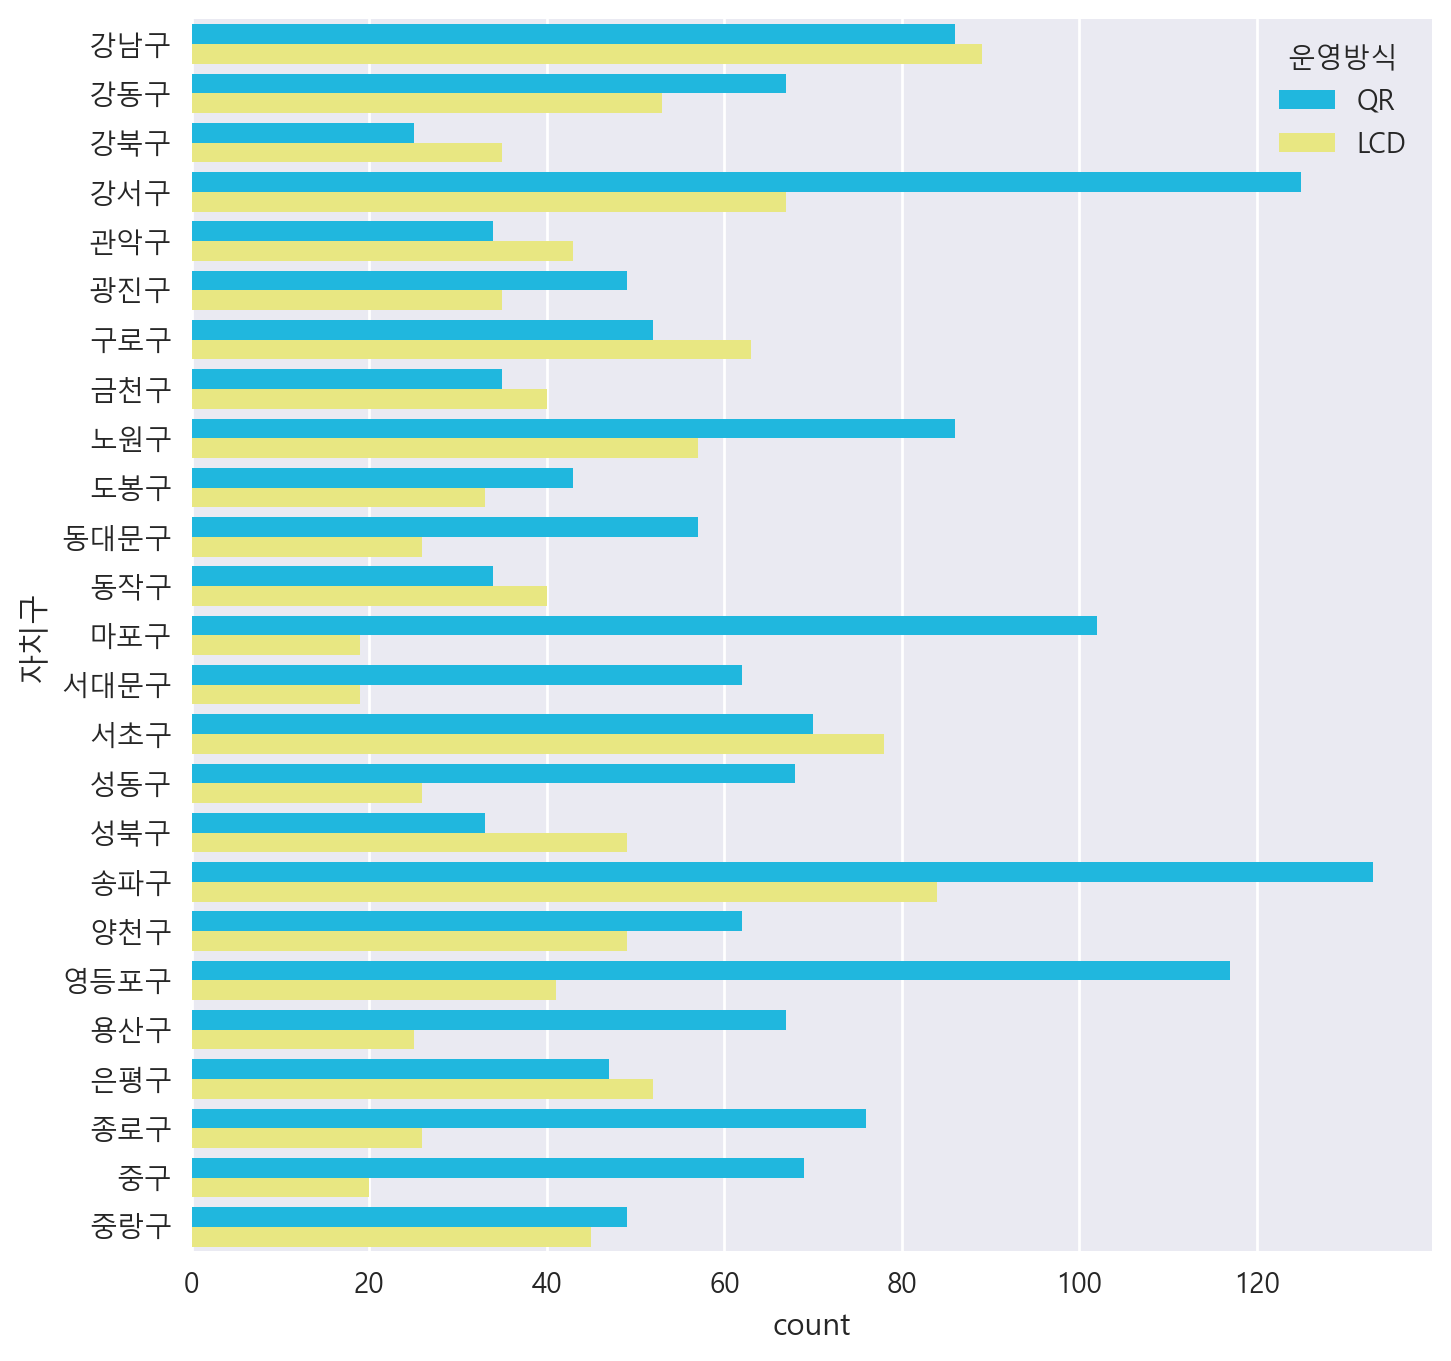

In [59]:
# 운영방식, 자치구 countplot
# color : RGBA 16진값 / pallet : seaborn cmap 색상 or 리스트로 RGBA 16진값
plt.figure(figsize=(8, 8))
sns.countplot(data=df.sort_values('자치구'), y='자치구', 
              hue='운영방식', palette=["#00C9FE", "#F9F871"])

## 범주형 vs 수치형 데이터 비교
* seaborn 의 통계연산을 지원하는 그래프 사용
* pandas 의 groupby 를 통해 데이터 집계하기

### 막대그래프

Text(0.5, 1.0, '대여소별 평균 자전거 수')

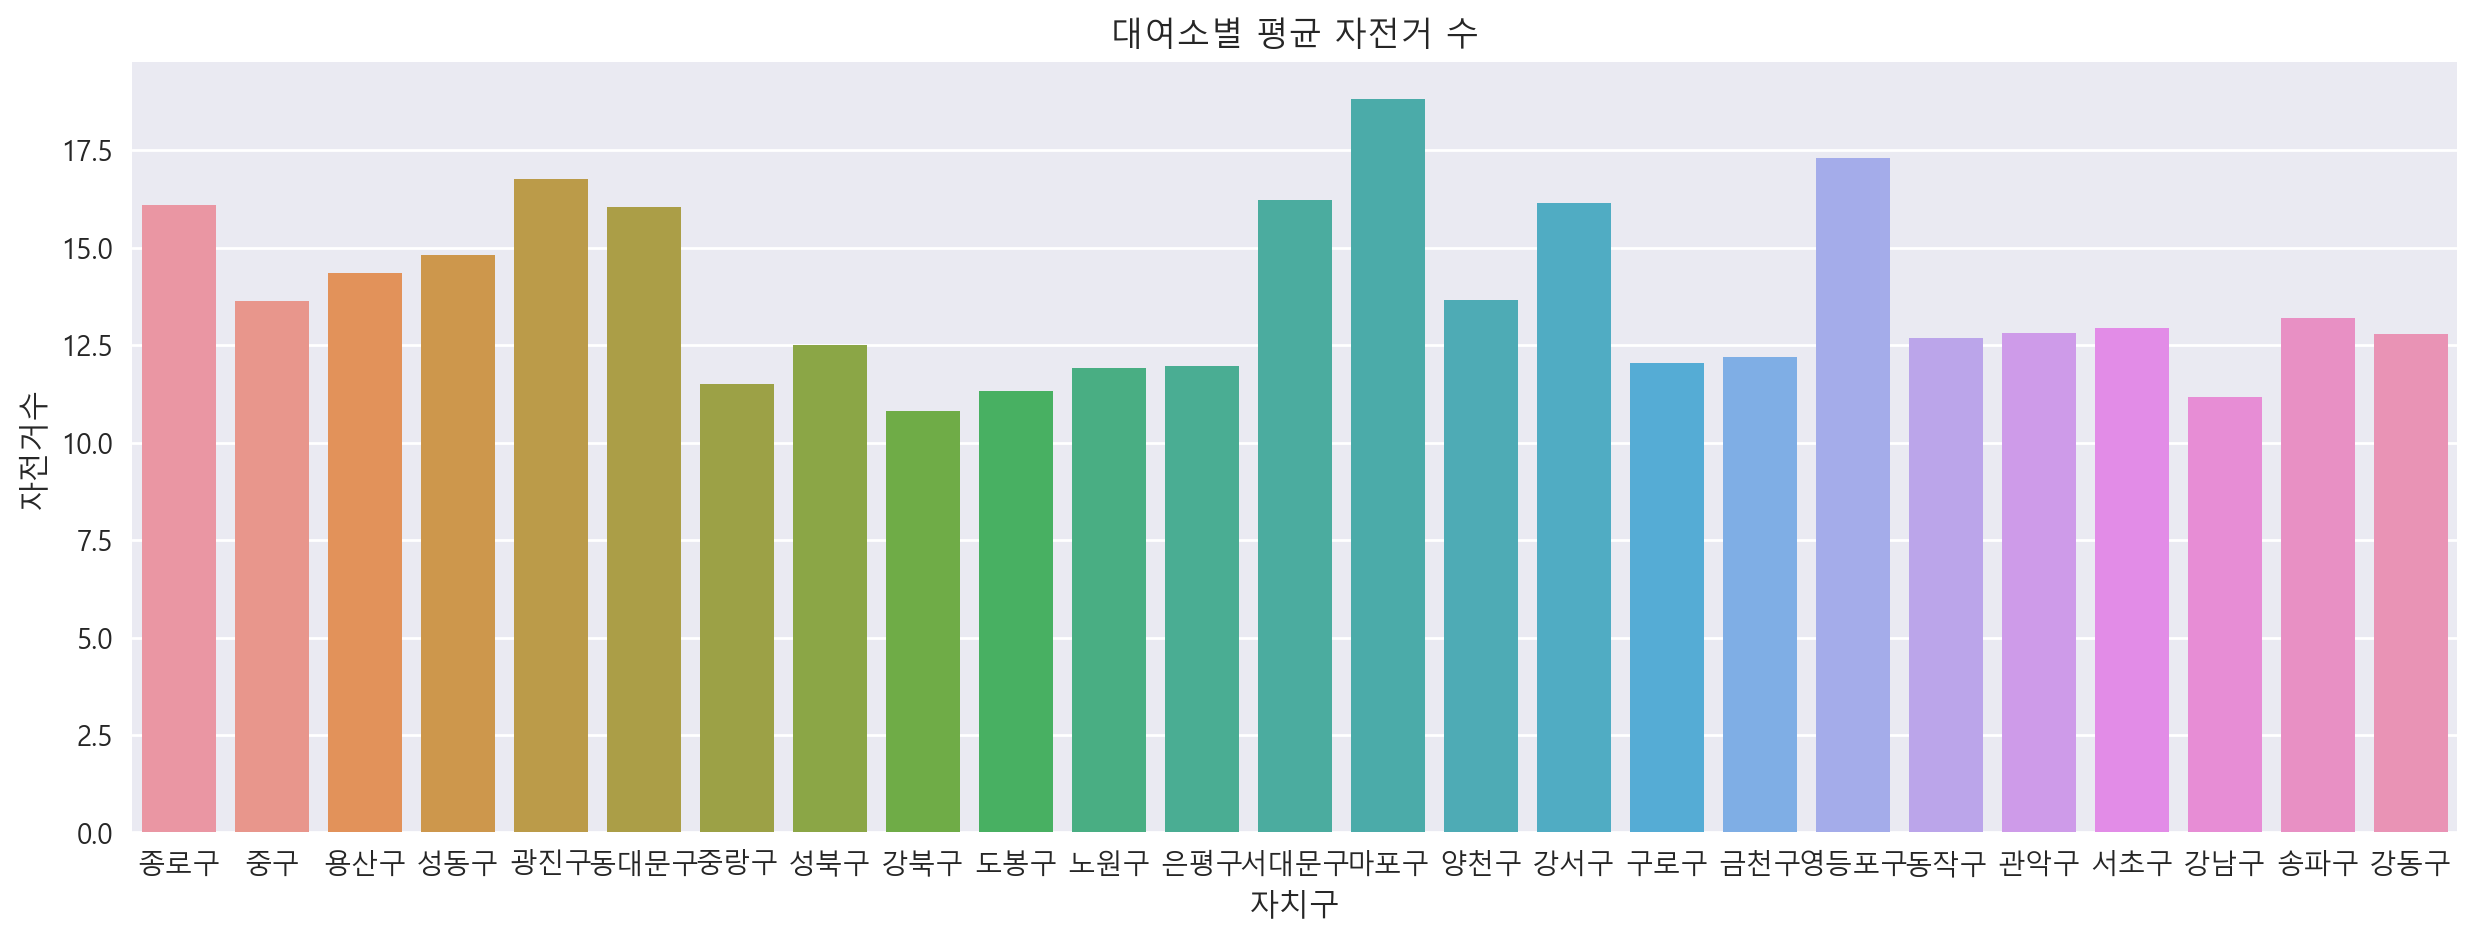

In [60]:
# 자치구 별 대여소별 평균 자전거 수 barplot 
plt.figure(figsize=(15, 5))

# => x축을 그룹핑해서 기본적으로 평균을 계산
# 속성에 estimator=np.mean 생략 되어 있음
sns.barplot(data=df, x='자치구', y='자전거수', errorbar=None)\
.set_title('대여소별 평균 자전거 수')

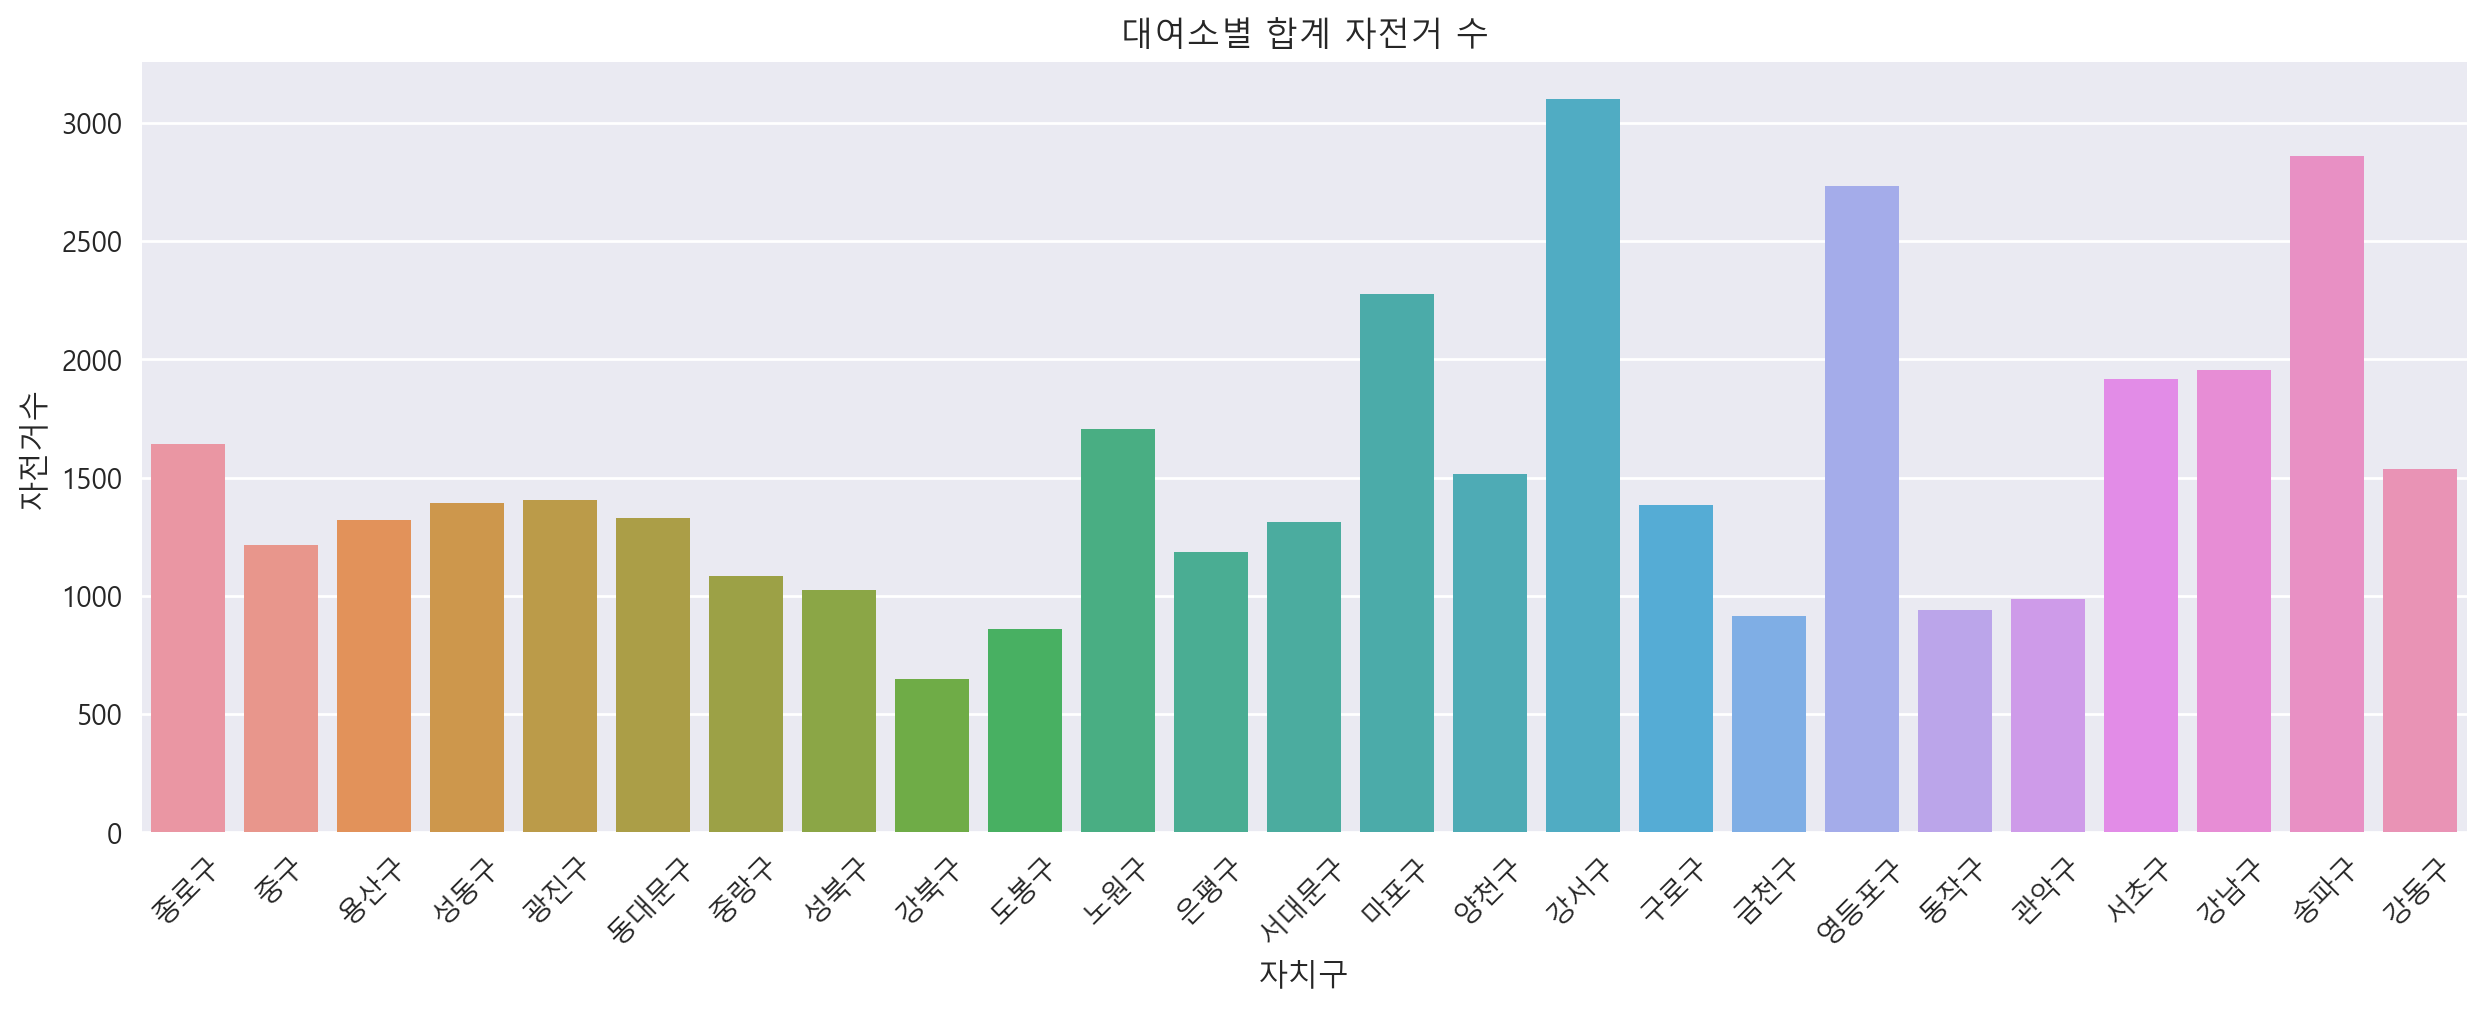

In [61]:
# 자치구 별 대여소별 합계 자전거 수 barplot 
# => x축을 그룹핑해서 estimator 매개변수를 통해 계산 방법을 변경 가능
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df, x='자치구', y='자전거수', errorbar=None,
            estimator=np.sum)

ax.set_title('대여소별 합계 자전거 수')
plt.xticks(rotation=45)
plt.show()

### groupby

<img src = 'https://pandas.pydata.org/docs/_images/06_groupby.svg' width="800">

In [62]:
# 자치구별 자전거 수 합계
# gu_bike_count
gu_bike_count = df.groupby('자치구')['자전거수'].sum()
gu_bike_count

자치구
강남구     1953
강동구     1535
강북구      649
강서구     3100
관악구      987
광진구     1407
구로구     1386
금천구      915
노원구     1705
도봉구      861
동대문구    1331
동작구      939
마포구     2276
서대문구    1313
서초구     1915
성동구     1393
성북구     1025
송파구     2861
양천구     1517
영등포구    2734
용산구     1319
은평구     1185
종로구     1642
중구      1214
중랑구     1082
Name: 자전거수, dtype: int64

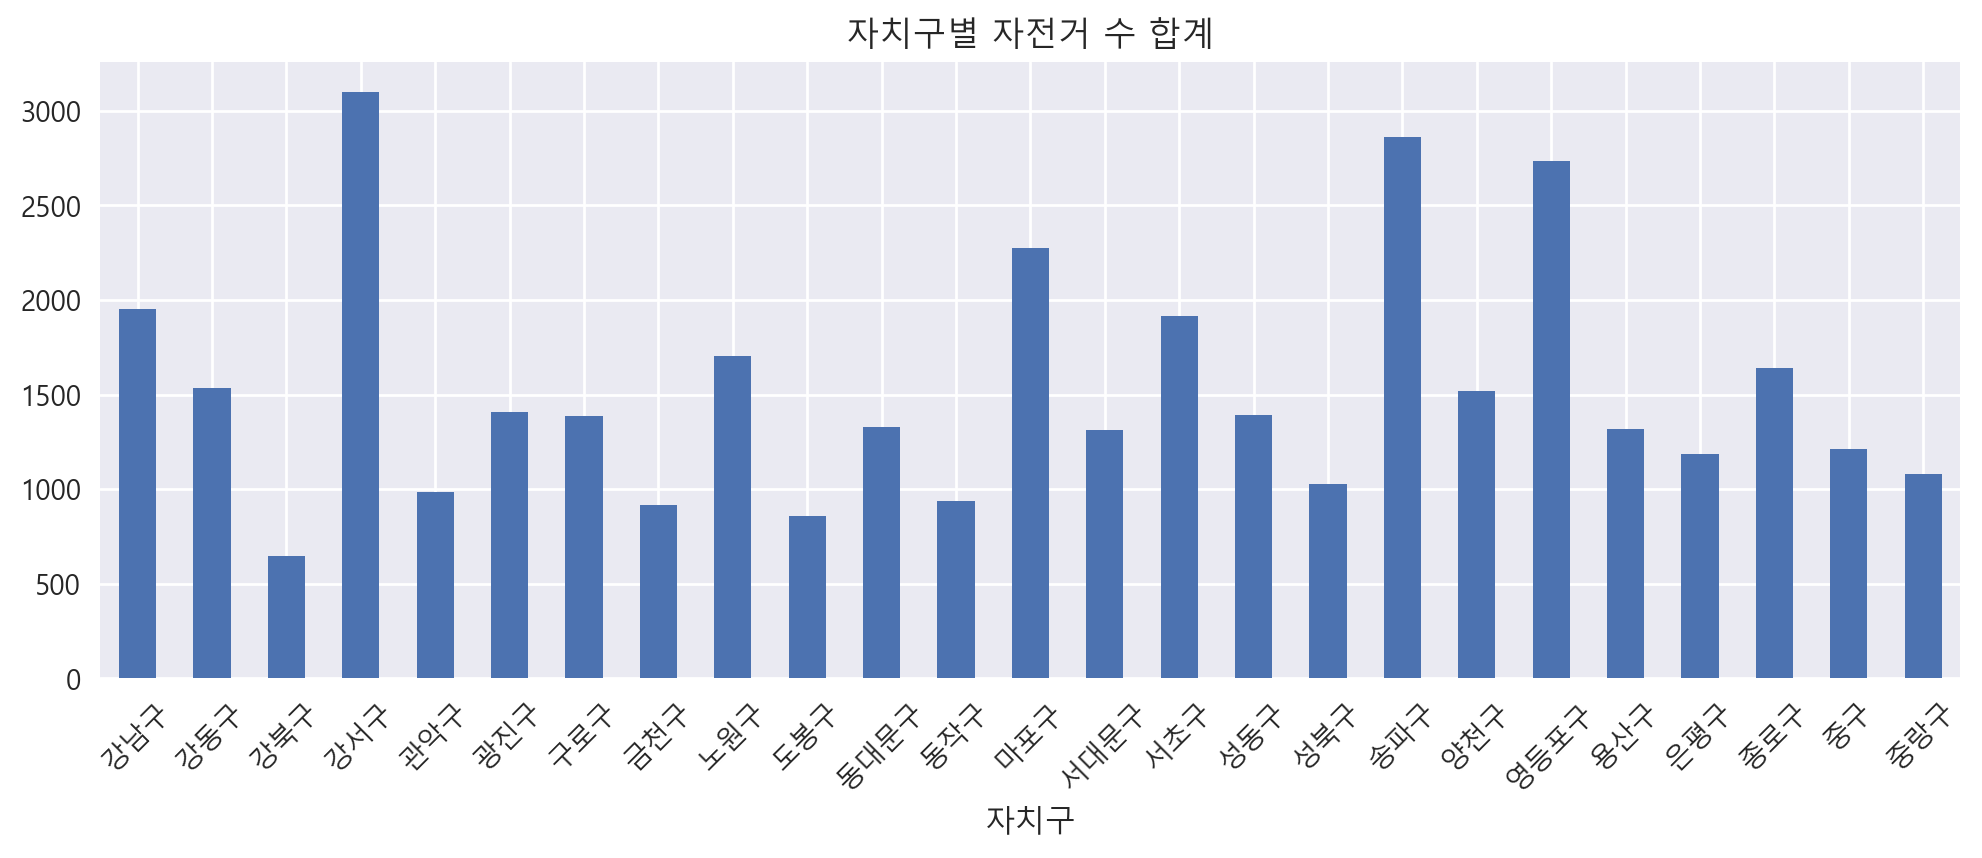

In [63]:
# 자치구별 자전거 수 합계 시각화
# gu_bike_count
gu_bike_count.plot.bar(figsize=(12,4)).set_title('자치구별 자전거 수 합계')
plt.xticks(rotation=45)
plt.show()

### pivot_table



<img src = 'https://pandas.pydata.org/docs/_images/reshaping_pivot.png' width = '600'>

In [64]:
# 자치구별 자전거 수 합계
gu_bike_sum = pd.pivot_table(data=df, index='자치구', values='자전거수', aggfunc='sum')
gu_bike_sum

자전거수
자치구       
강남구   1953
강동구   1535
강북구    649
강서구   3100
관악구    987
광진구   1407
구로구   1386
금천구    915
노원구   1705
도봉구    861
동대문구  1331
동작구    939
마포구   2276
서대문구  1313
서초구   1915
성동구   1393
성북구   1025
송파구   2861
양천구   1517
영등포구  2734
용산구   1319
은평구   1185
종로구   1642
중구    1214
중랑구   1082

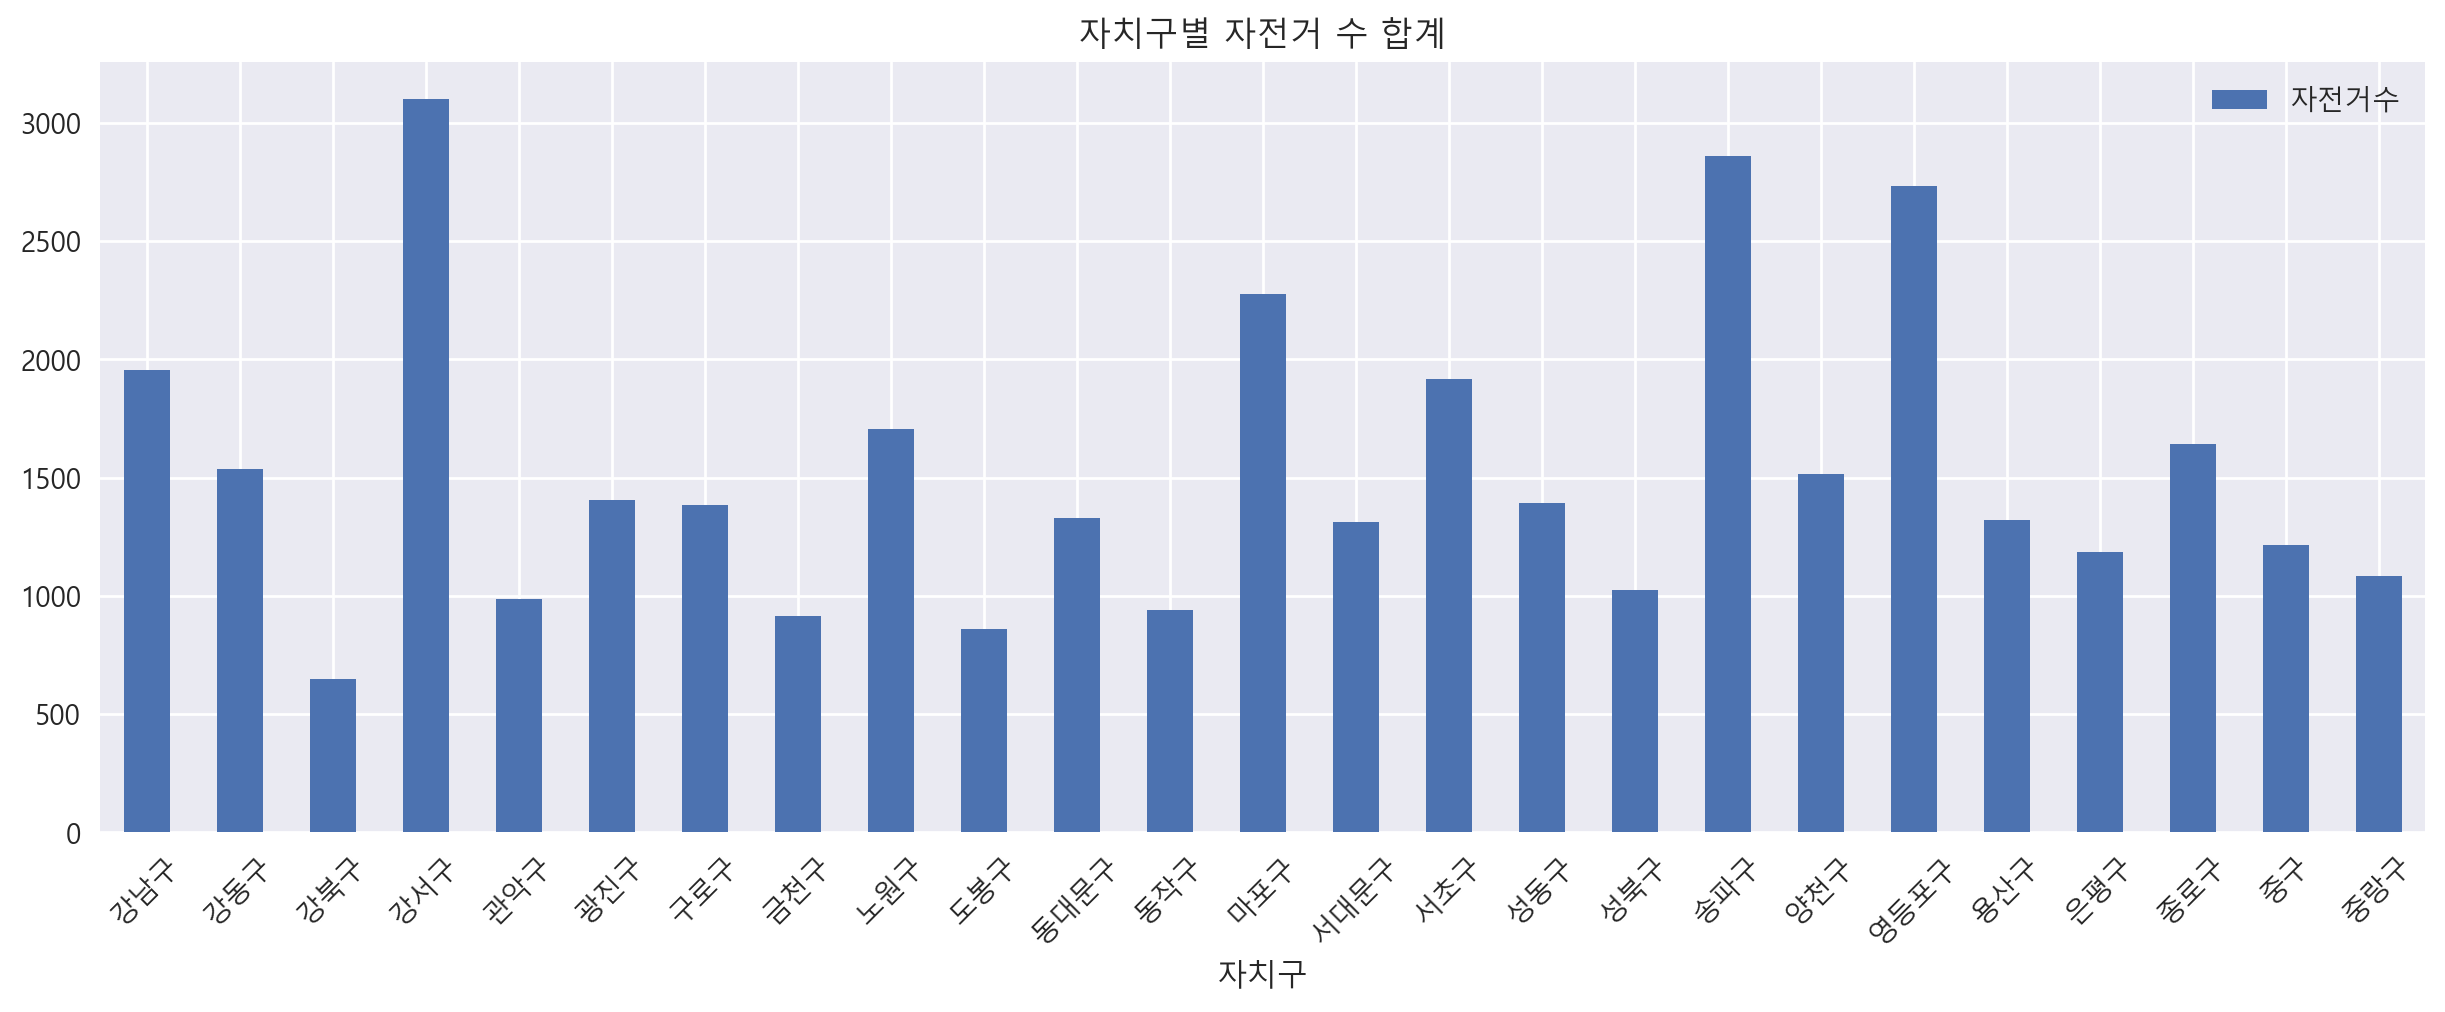

In [65]:
# 자치구별 자전거 수 합계 시각화
gu_bike_sum.plot(kind='bar', figsize=(15,5), title='자치구별 자전거 수 합계')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='자치구', ylabel='자전거수'>

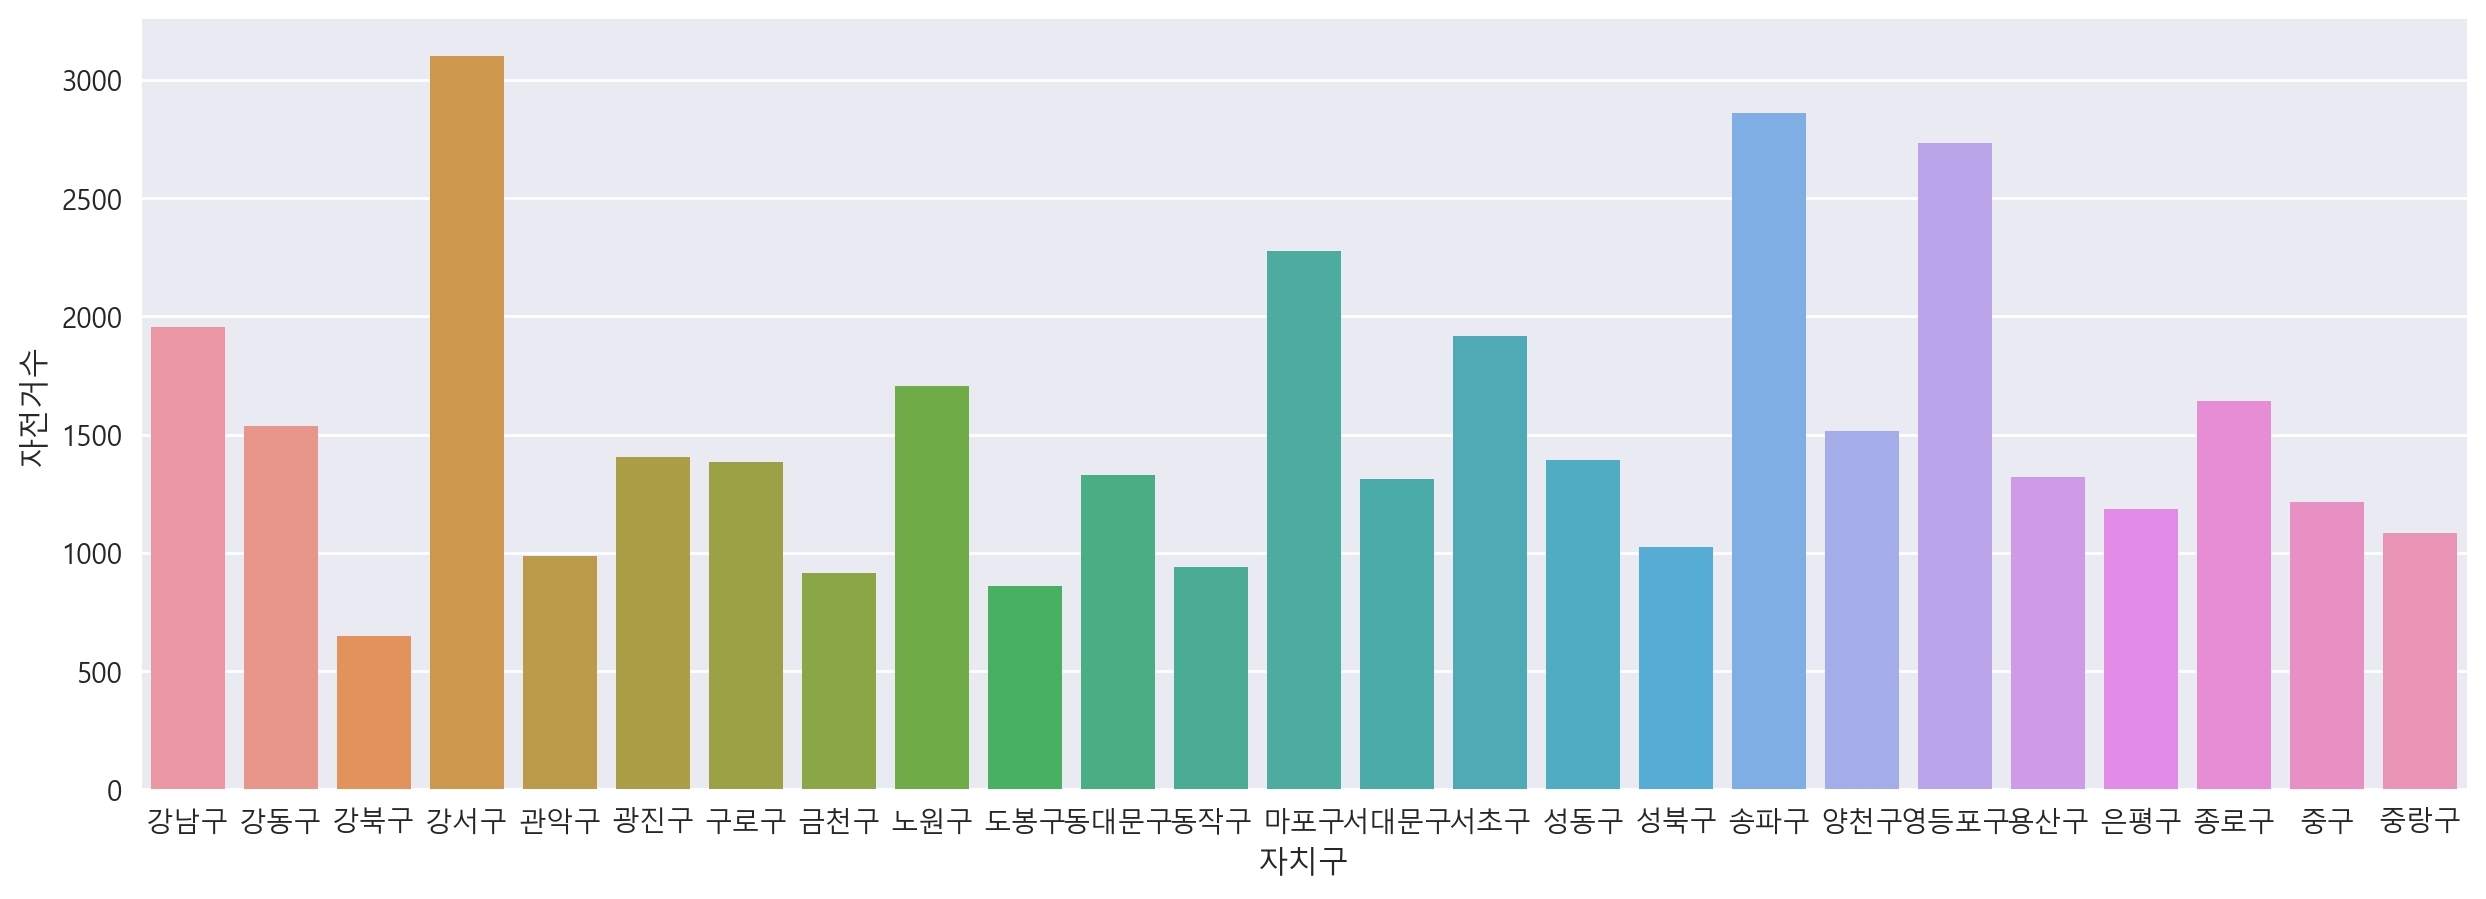

In [66]:
# 자치구별 자전거 수 합계 sns.barplot 으로 시각화
plt.figure(figsize=(15, 5))
sns.barplot(data=gu_bike_sum, x=gu_bike_sum.index, y='자전거수')

### 상자수염그림
* boxplot


#### 기술통계 용어

* 백분위 수 : 데이터를 백등분 한 것
* 사분위 수 : 데이터를 4등분 한 것
* 중위수 : 데이터의 정 가운데 순위에 해당하는 값.(관측치의 절반은 크거나 같고 나머지 절반은 작거나 같다.)
* 제 3사분위 수 (Q3) : 중앙값 기준으로 상위 50% 중의 중앙값, 전체 데이터 중 상위 25%에 해당하는 값
* 제 1사분위 수 (Q1) : 중앙값 기준으로 하위 50% 중의 중앙값, 전체 데이터 중 하위 25%에 해당하는 값
* 사분위 범위 수(IQR) : 데이터의 중간 50% (Q3 - Q1)

* 출처 : [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)

<img src="https://miro.medium.com/max/1400/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="400">

* 이미지 출처 : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

<Axes: xlabel='자치구', ylabel='자전거수'>

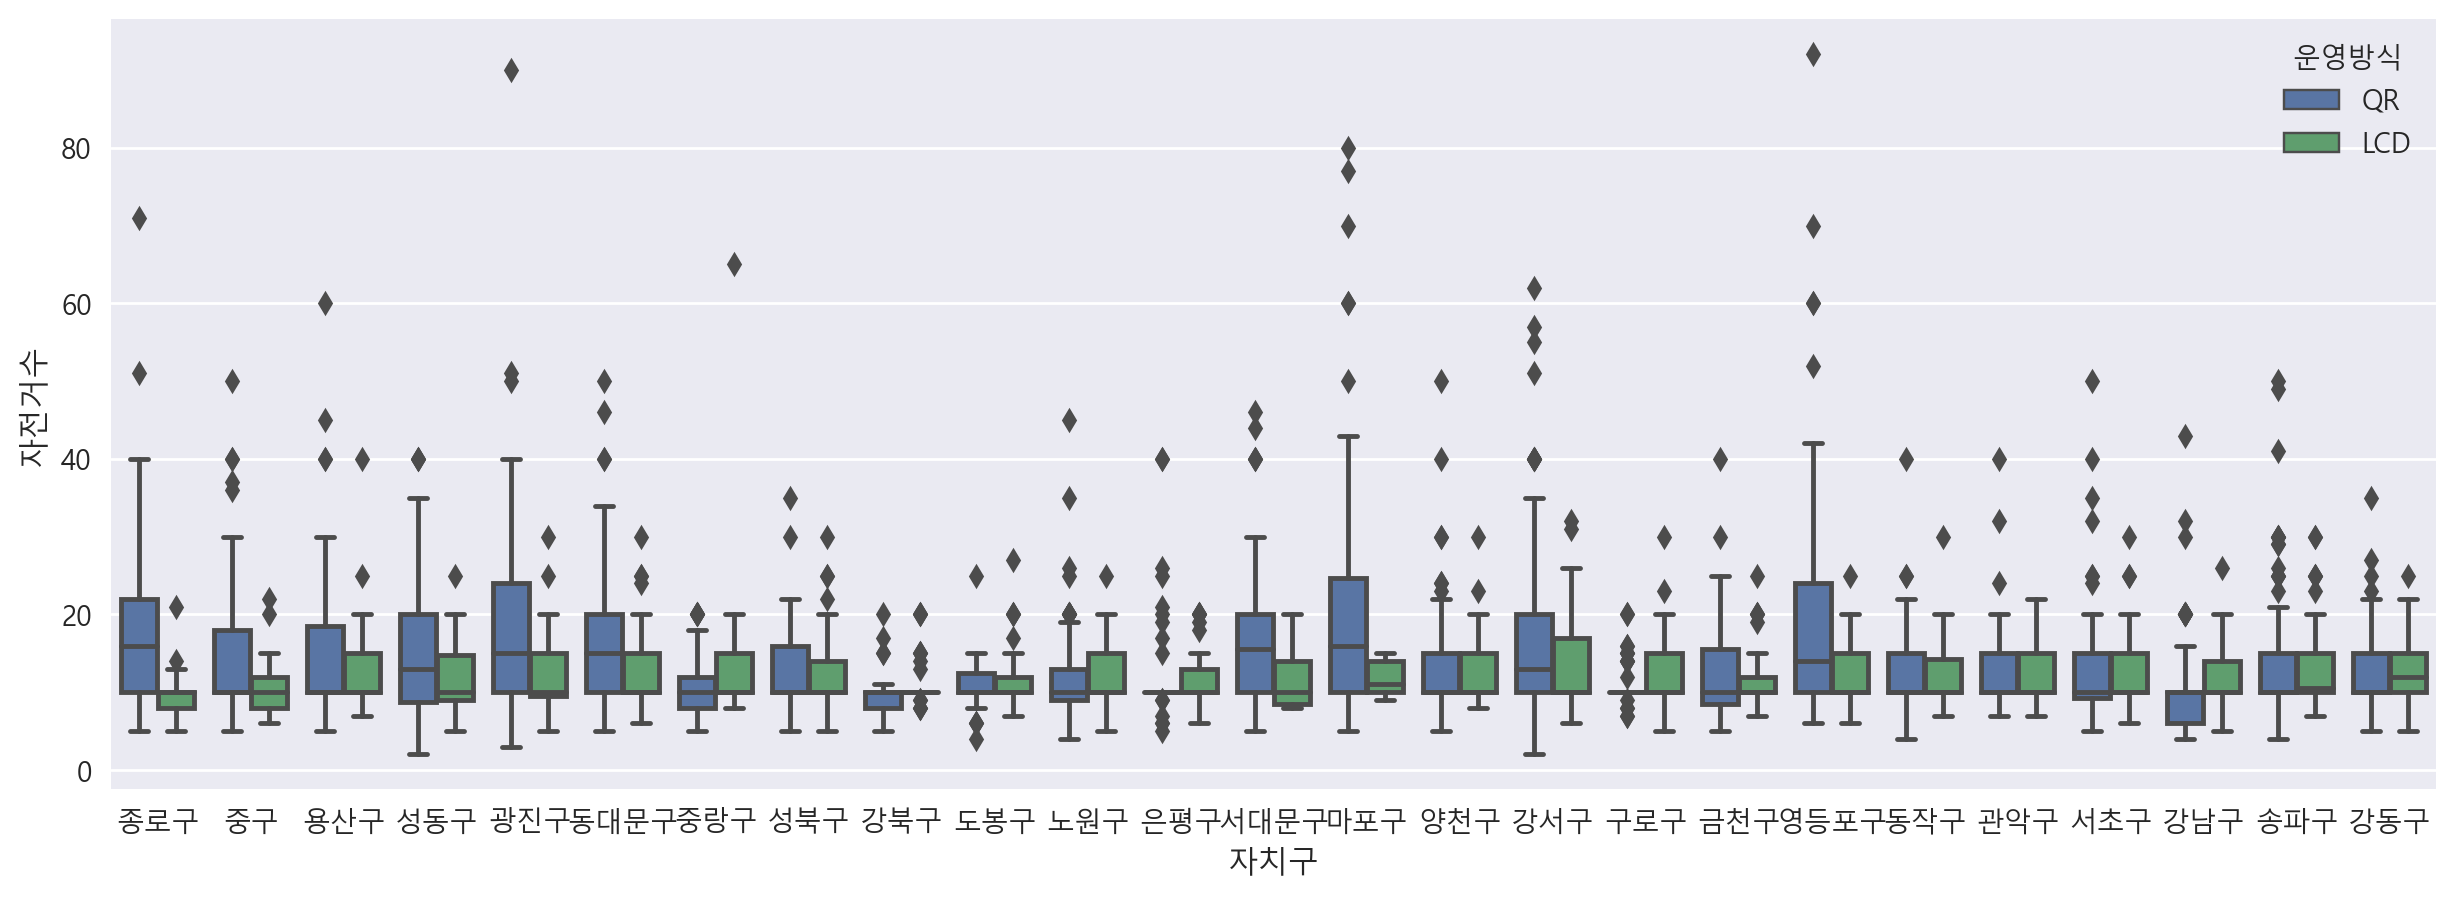

In [71]:
# 자치구별 자전거 수 sns.boxplot 으로 시각화 hue="운영방식"
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='자치구', y='자전거수', hue='운영방식')

In [87]:
# 위에서 구한 boxplot 에 대한 수치를 groupby로 구해봅니다.


# df.groupby(by=['자치구', '운영방식'])['자전거수'].count().to_frame()

gu_df = df.groupby(by=['자치구', '운영방식'])
gu_bike_count = gu_df['자전거수'].count()
#.to_frame() : 시리즈를 데이터프레임으로 변경
gu_bike_count = gu_bike_count.to_frame()
gu_bike_count.head(10)

자전거수
자치구 운영방식      
강남구 LCD     89
    QR      86
강동구 LCD     53
    QR      67
강북구 LCD     35
    QR      25
강서구 LCD     67
    QR     125
관악구 LCD     43
    QR      34

In [85]:
# index를 초기화하고 기존 인덱스를 column으로 옮기기
gu_bike_count.reset_index().head()

자치구 운영방식  자전거수
0  강남구  LCD    89
1  강남구   QR    86
2  강동구  LCD    53
3  강동구   QR    67
4  강북구  LCD    35

In [84]:
# index를 초기화하고 기존 index를 삭제하기
gu_bike_count.reset_index(drop=True).head()

자전거수
0    89
1    86
2    53
3    67
4    35

In [90]:
# 자치구별 운영방식별 자전거의 기술 통계
df.groupby(['자치구', '운영방식'])['자전거수'].describe().head(10)

count       mean        std  min   25%   50%   75%   max
자치구 운영방식                                                          
강남구 LCD    89.0  11.460674   3.711335  5.0  10.0  10.0  14.0  26.0
    QR     86.0  10.848837   6.474416  4.0   6.0  10.0  10.0  43.0
강동구 LCD    53.0  13.132075   4.532098  5.0  10.0  12.0  15.0  25.0
    QR     67.0  12.522388   5.552390  5.0  10.0  10.0  15.0  35.0
강북구 LCD    35.0  11.257143   3.248012  8.0  10.0  10.0  10.0  20.0
    QR     25.0  10.200000   3.452053  5.0   8.0  10.0  10.0  20.0
강서구 LCD    67.0  13.641791   6.200444  6.0  10.0  10.0  17.0  32.0
    QR    125.0  17.488000  11.211037  2.0  10.0  13.0  20.0  62.0
관악구 LCD    43.0  12.302326   4.131960  7.0  10.0  10.0  15.0  22.0
    QR     34.0  13.470588   7.144548  7.0  10.0  10.0  15.0  40.0

In [92]:
df.groupby(['자치구', '운영방식'])['자전거수'].describe()\
.sort_values(by='max', ascending=False).head()

count       mean        std  min   25%   50%    75%   max
자치구  운영방식                                                           
영등포구 QR    117.0  18.974359  13.780585  6.0  10.0  14.0  24.00  92.0
광진구  QR     49.0  19.755102  16.199962  3.0  10.0  15.0  24.00  90.0
마포구  QR    102.0  20.127451  15.138745  5.0  10.0  16.0  24.75  80.0
종로구  QR     76.0  18.236842  11.167654  5.0  10.0  16.0  22.00  71.0
중랑구  LCD    45.0  12.511111   8.406227  8.0  10.0  10.0  15.00  65.0

### 바이올린플롯

<Axes: xlabel='자치구', ylabel='자전거수'>

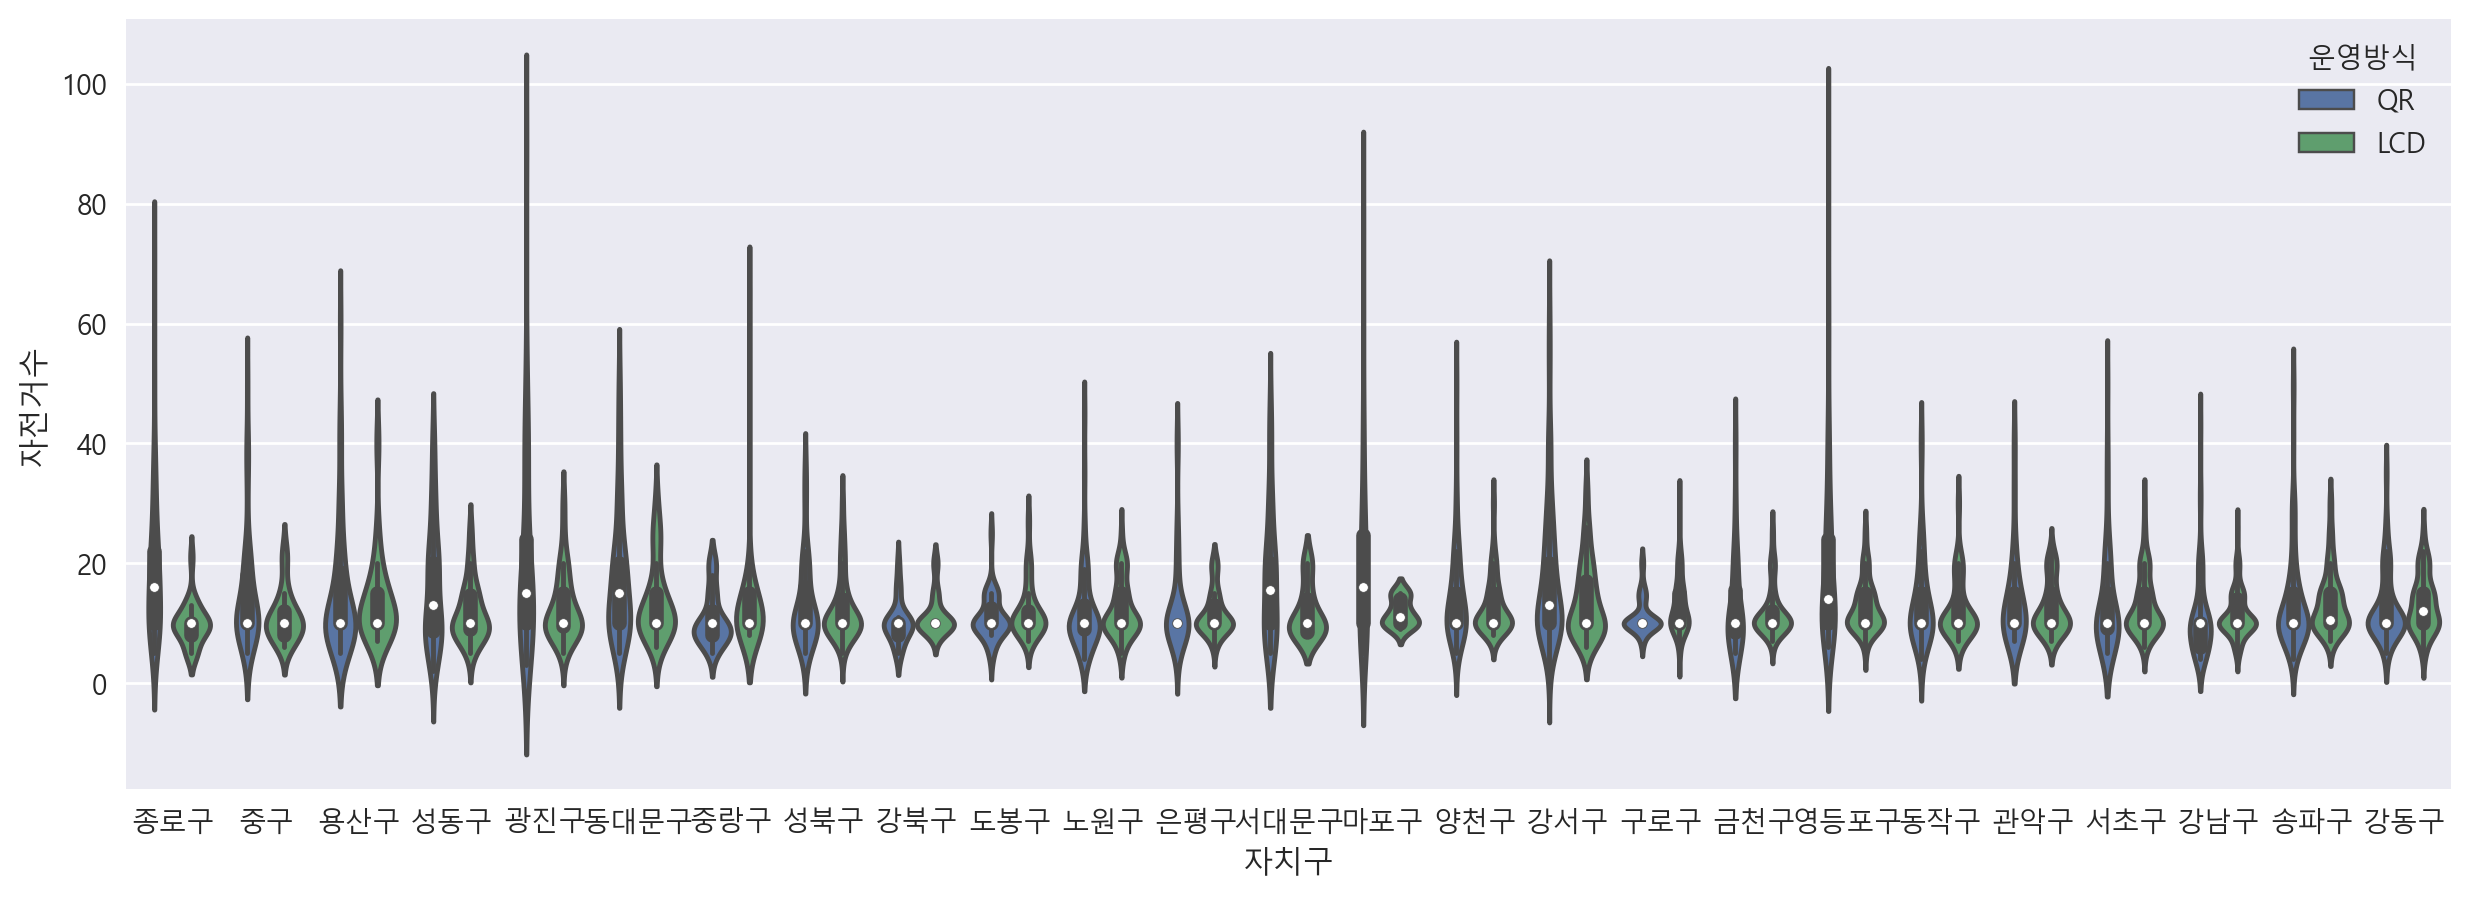

In [95]:
# 자치구별 자전거 수 sns.violinplot 으로 시각화 hue="운영방식"
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='자치구', y='자전거수', hue='운영방식')

## 설치 시기
### 선그래프

<Axes: xlabel='연도', ylabel='자전거수'>

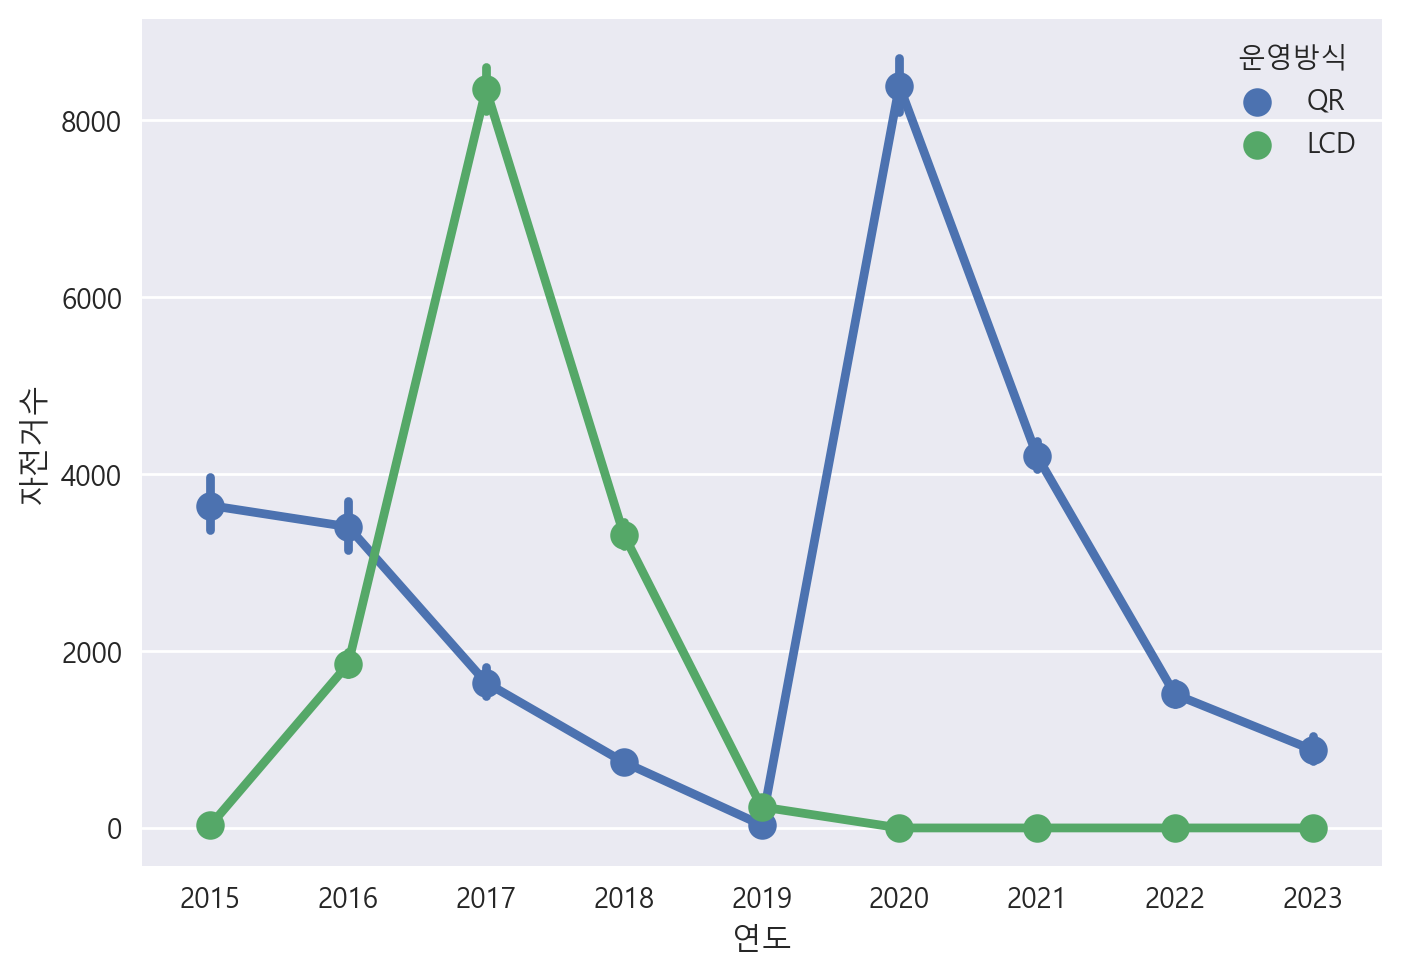

In [97]:
# pointplot  x="연도", y="자전거수", hue="운영방식" 합계
# seaborn은 데이터 집계와 요약을 자동으로 처리하는 기능을 제공한다.(기본값은 평균)
# 따라서 다른 집계방식으로 처리하려면 estimator 매개변수를 이용하여 적절한 함수 선택이 필요
sns.pointplot(data=df, x='연도', y='자전거수', hue='운영방식', estimator='sum')

Text(0.5, 1.0, '대여소별 자전거 합계 설치 수')

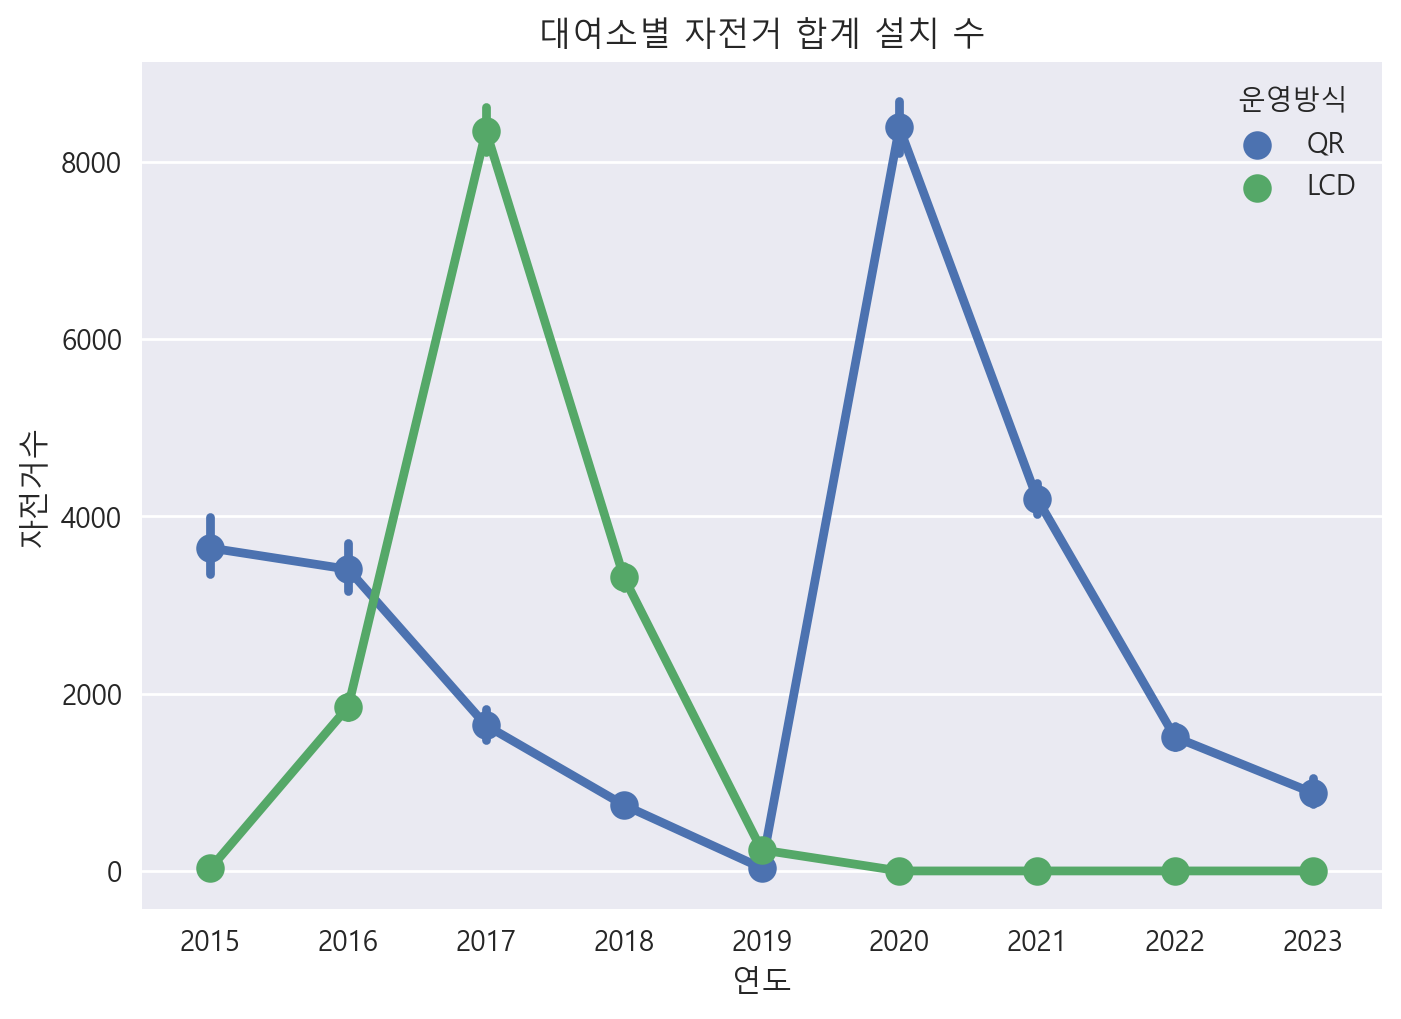

In [129]:
sns.pointplot(data=df, x='연도', y='자전거수', hue='운영방식', estimator=np.sum).set_title('대여소별 자전거 합계 설치 수')

***

In [114]:
# groupby 연도별 운영방식 합계
# 집계를 여러개 동시에 보고 싶을 때 agg함수 사용 => 데이터 프레임으로 나타나짐
df.groupby(['연도', '운영방식'])['자전거수'].agg(['sum','count','mean']).head(6)

sum  count       mean
연도   운영방식                        
2015 LCD     30      3  10.000000
     QR    3644    125  29.152000
2016 LCD   1853    147  12.605442
     QR    3404    126  27.015873
2017 LCD   8352    668  12.502994
     QR    1643     59  27.847458

unstack과 stack
- stack() : 열을 행으로 이동
- nstack() : 행을 열로 이동

In [115]:
df.groupby(['연도', '운영방식'])['자전거수'].agg(['sum','count','mean']).reset_index().head(3)

연도 운영방식   sum  count       mean
0  2015  LCD    30      3  10.000000
1  2015   QR  3644    125  29.152000
2  2016  LCD  1853    147  12.605442

In [151]:
# 멀티 index 올리기
df.groupby(['연도', '운영방식'])['자전거수'].agg(['sum','count','mean']).unstack().head(3)

sum          count              mean           
운영방식     LCD      QR    LCD     QR        LCD         QR
연도                                                      
2015    30.0  3644.0    3.0  125.0  10.000000  29.152000
2016  1853.0  3404.0  147.0  126.0  12.605442  27.015873
2017  8352.0  1643.0  668.0   59.0  12.502994  27.847458

In [109]:
# 멀티 index에서 0번째꺼 올리기
df.groupby(['연도', '운영방식'])['자전거수'].agg(['sum','count','mean']).unstack(0)

sum                                                                \
연도      2015    2016    2017    2018   2019    2020    2021    2022   2023   
운영방식                                                                         
LCD     30.0  1853.0  8352.0  3316.0  238.0     NaN     NaN     NaN    NaN   
QR    3644.0  3404.0  1643.0   744.0   34.0  8391.0  4202.0  1511.0  882.0   

      count  ...          mean                                         \
연도     2015  ...  2023    2015       2016       2017       2018  2019   
운영방식         ...                                                        
LCD     3.0  ...   NaN  10.000  12.605442  12.502994  12.014493  11.9   
QR    125.0  ...  85.0  29.152  27.015873  27.847458  26.571429  17.0   

                                                 
연도         2020       2021      2022       2023  
운영방식                                             
LCD         NaN        NaN       NaN        NaN  
QR    12.771689  10.452736  9.213415  10.376471  

[2 rows x 27 columns]

In [118]:
df.groupby(['연도', '운영방식'])['자전거수'].agg(['sum','count','mean']).stack().head(10)

연도    운영방식       
2015  LCD   sum        30.000000
            count       3.000000
            mean       10.000000
      QR    sum      3644.000000
            count     125.000000
            mean       29.152000
2016  LCD   sum      1853.000000
            count     147.000000
            mean       12.605442
      QR    sum      3404.000000
dtype: float64

***

In [149]:
# pivot_table index="연도", columns="운영방식", values="대여소번호"
df.pivot_table(index='연도', columns='운영방식', values='대여소번호', aggfunc=[sum, len, 'mean'])

sum               len                mean             
운영방식        LCD         QR    LCD     QR          LCD           QR
연도                                                                
2015      929.0    35171.0    3.0  125.0   309.666667   281.368000
2016    75855.0    60584.0  147.0  126.0   516.020408   480.825397
2017  1122476.0    93711.0  668.0   59.0  1680.353293  1588.322034
2018   433398.0    41484.0  276.0   28.0  1570.282609  1481.571429
2019    32721.0     1840.0   20.0    2.0  1636.050000   920.000000
2020        NaN  1677945.0    NaN  657.0          NaN  2553.949772
2021        NaN  1724934.0    NaN  402.0          NaN  4290.880597
2022        NaN   776624.0    NaN  164.0          NaN  4735.512195
2023        NaN   417114.0    NaN   85.0          NaN  4907.223529

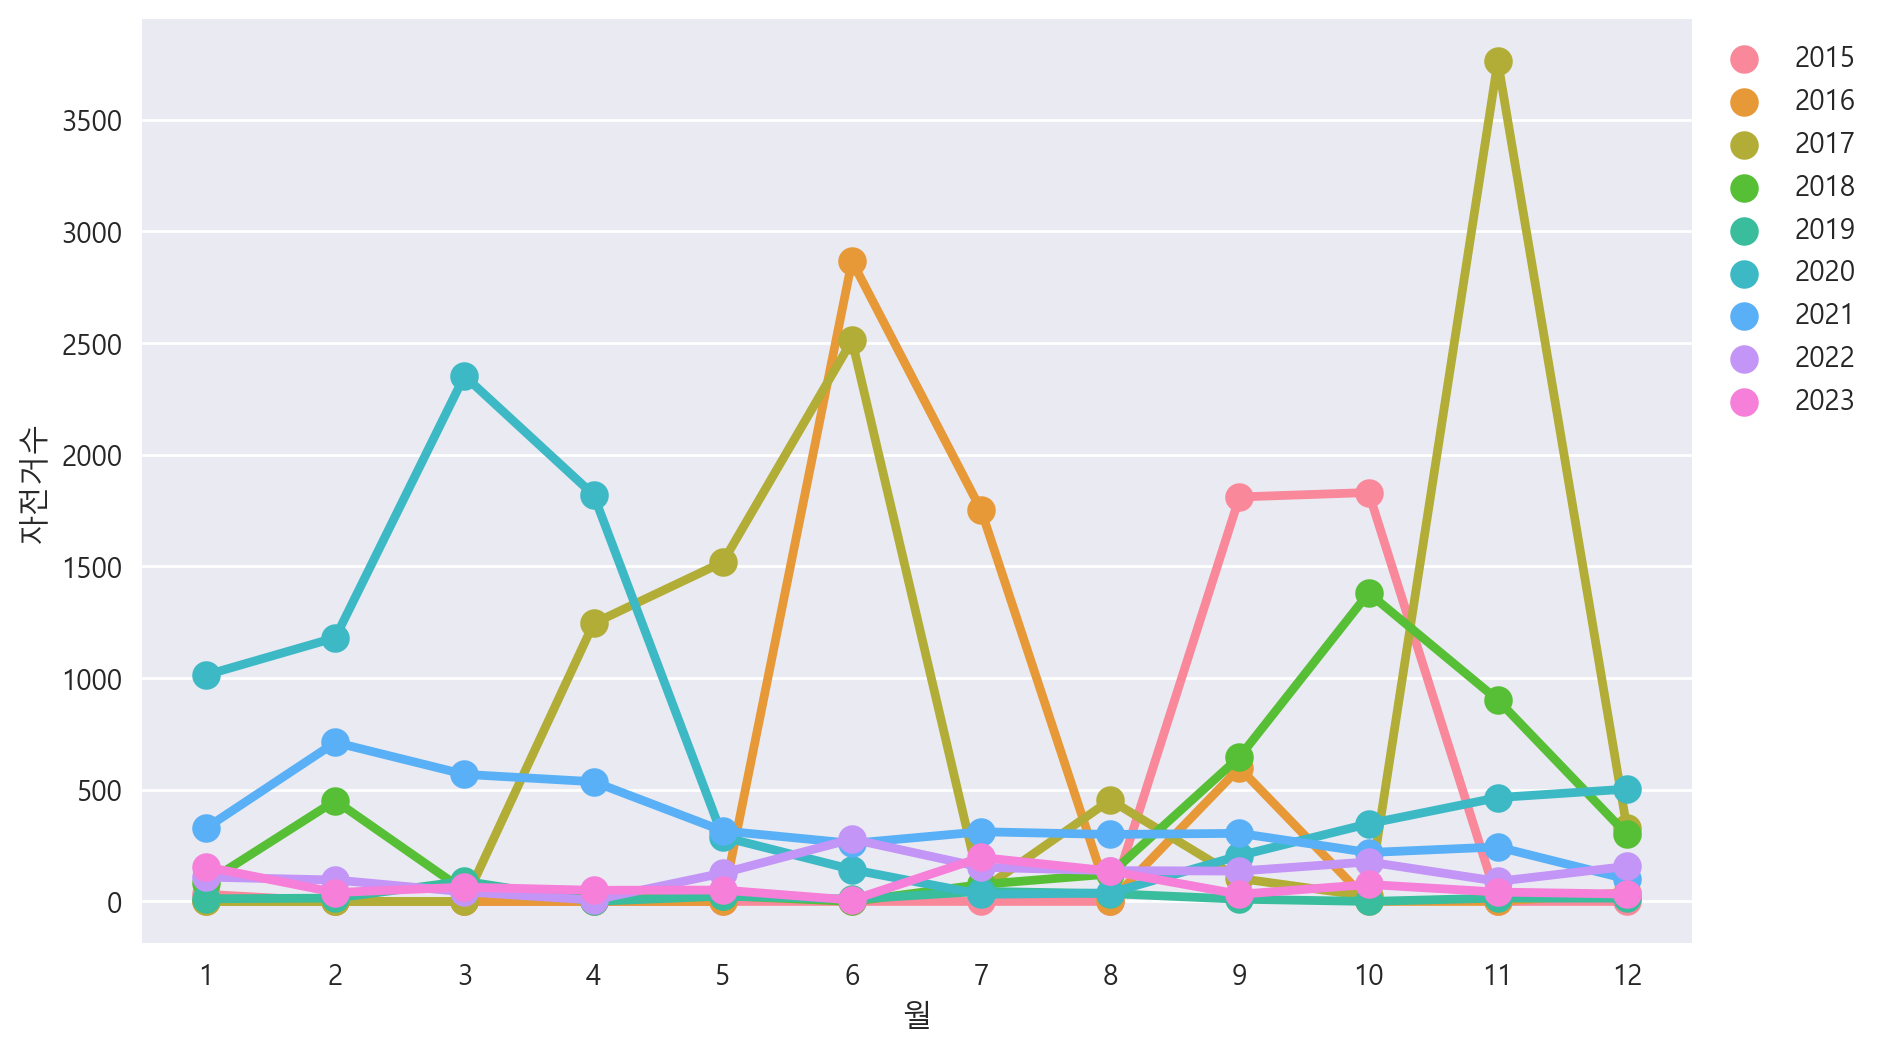

In [157]:
# pointplot x="월", y="자전거수", hue="연도"
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='월', y='자전거수', hue='연도', errorbar=None, estimator=np.sum)
plt.legend(bbox_to_anchor=(1,1), loc=0)
plt.savefig('월별연도별자전거수.png')
plt.show()

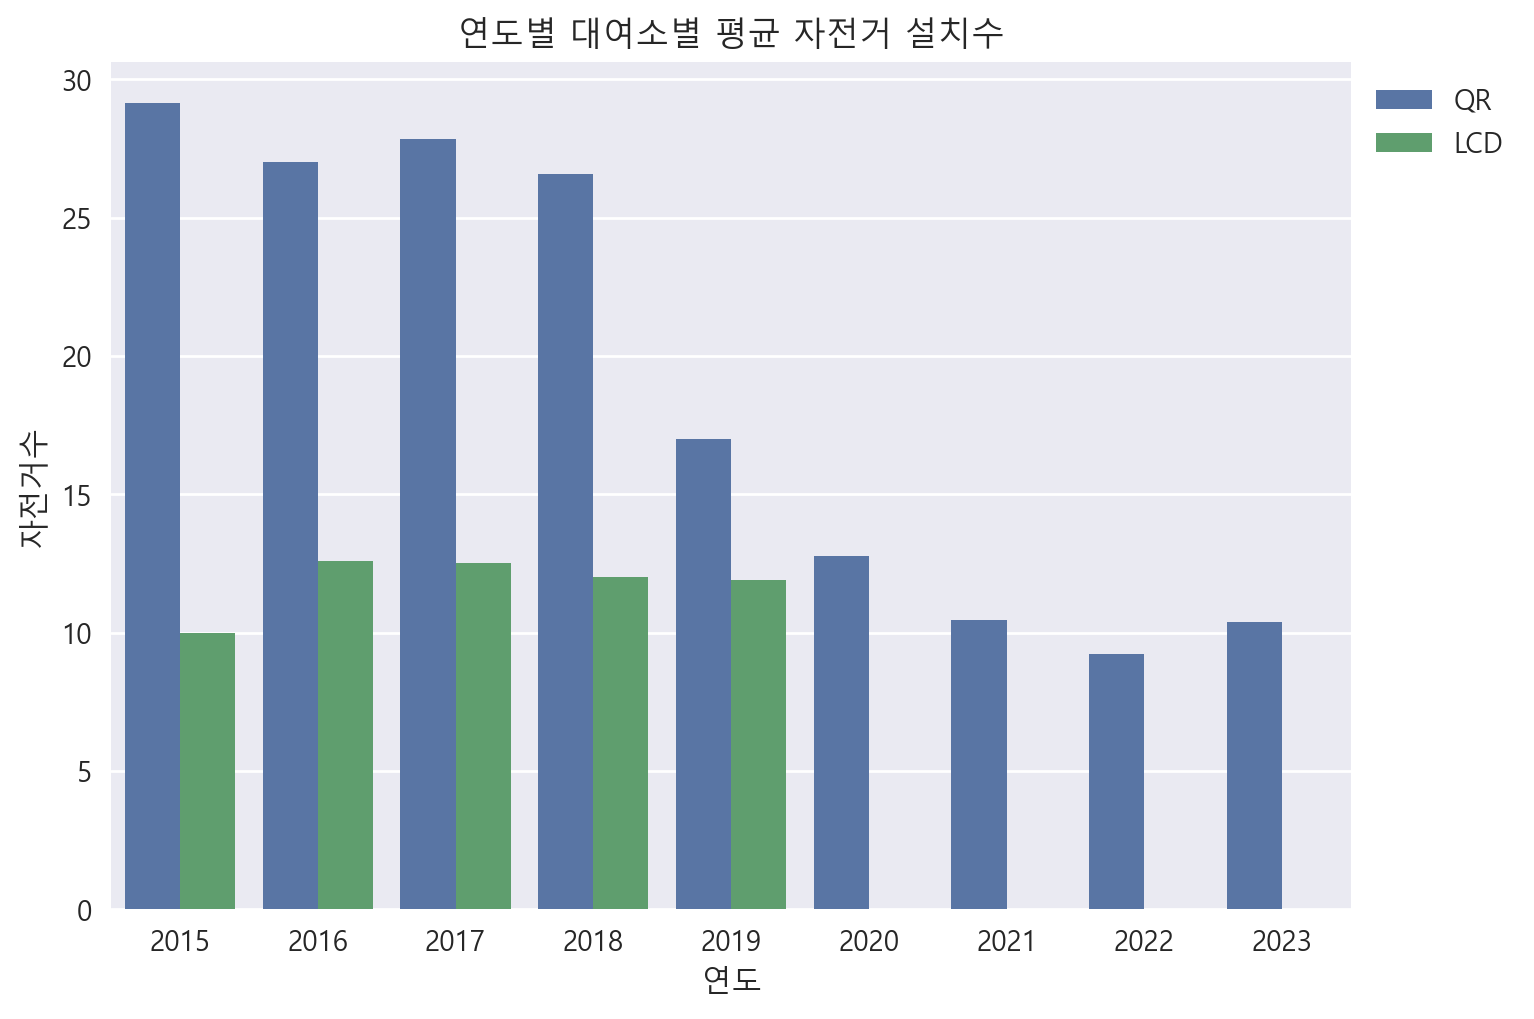

In [177]:
# barplot x="연도", y="자전거수", hue="운영방식"
sns.barplot(data=df, x='연도', y='자전거수', hue='운영방식', errorbar=None).set_title('연도별 대여소별 평균 자전거 설치수')
plt.legend(bbox_to_anchor=(1,1))

Text(0.5, 1.0, '연도별 대여소별 평균 자전거 설치수')

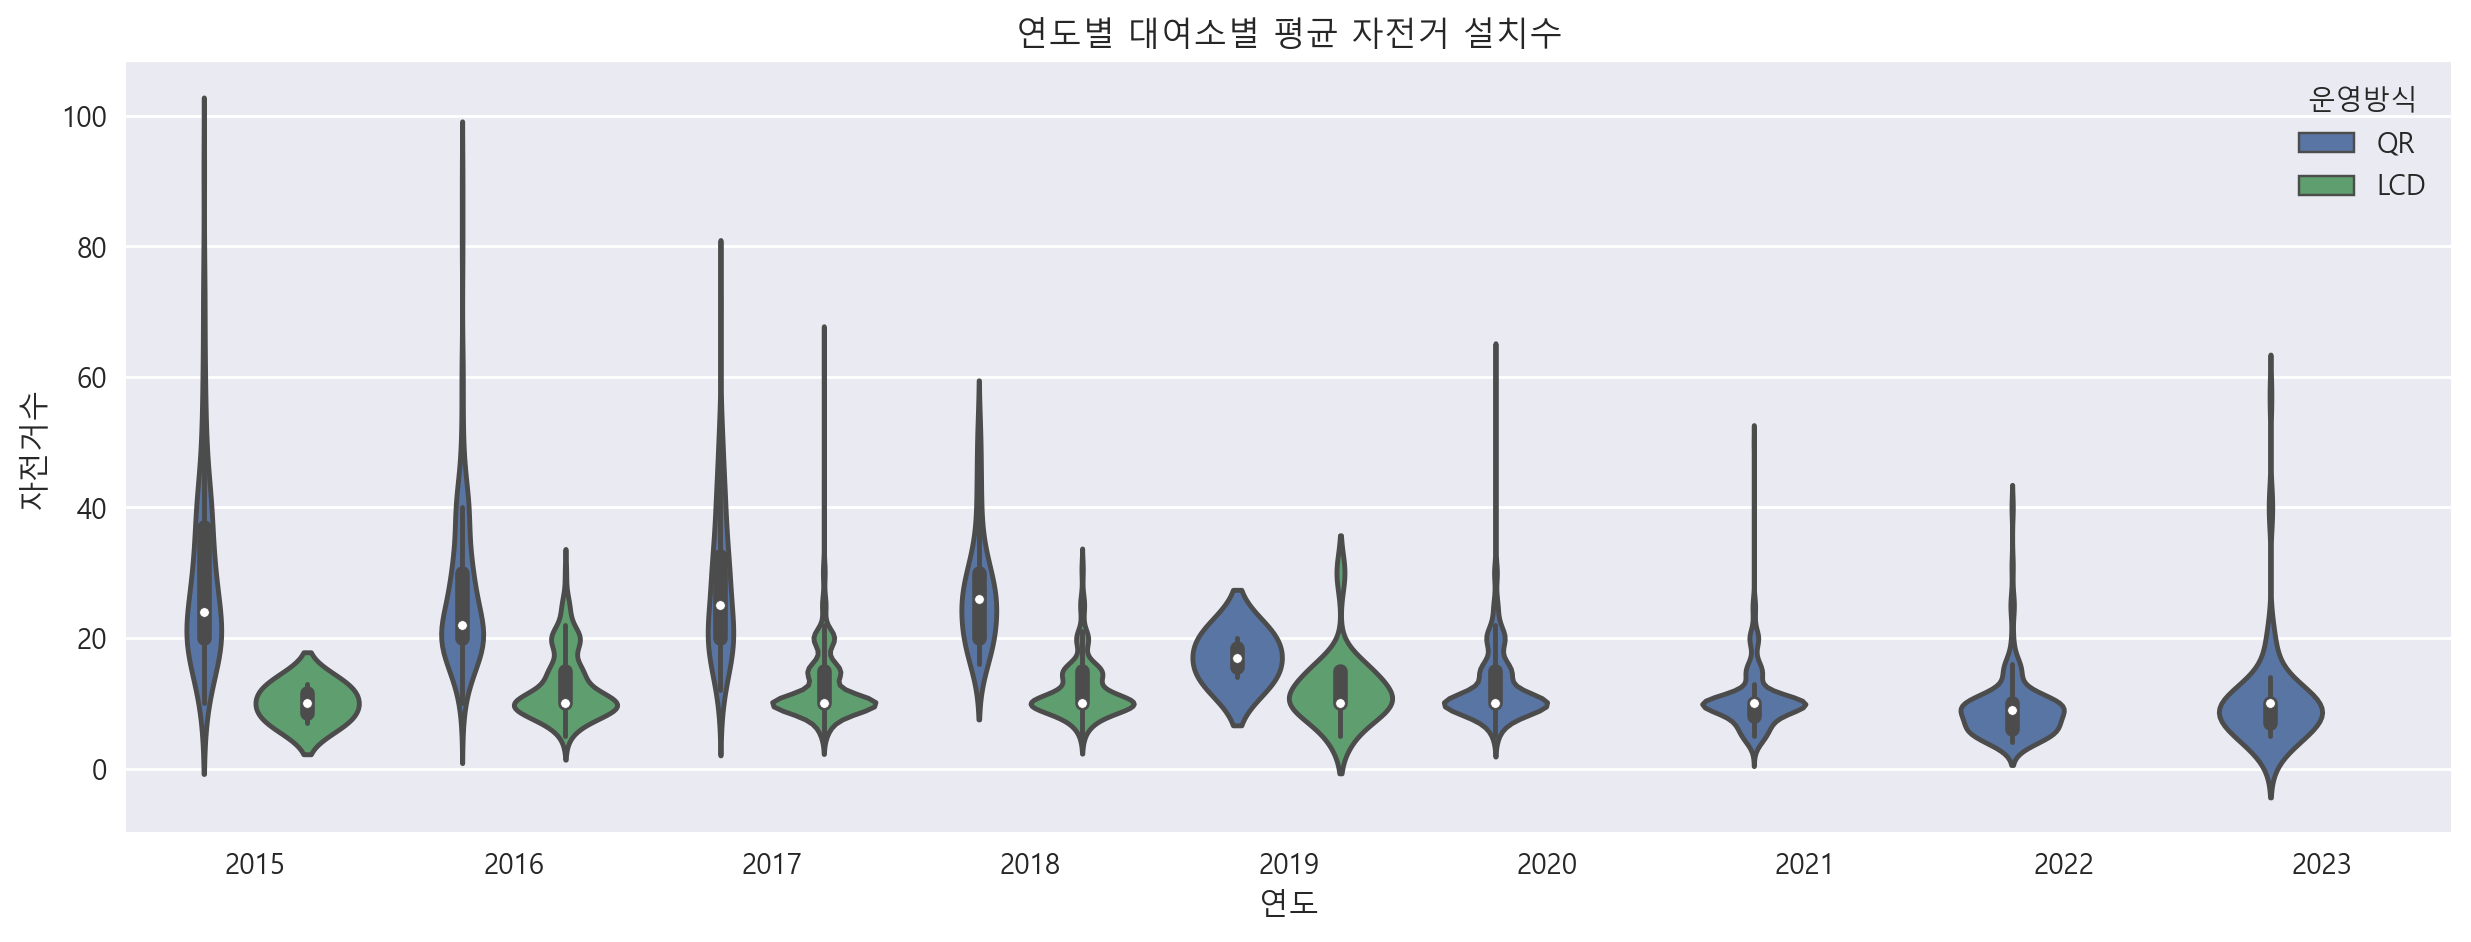

In [175]:
# violinplot x="연도", y="자전거수", hue="운영방식"
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='연도', y='자전거수', hue='운영방식').set_title('연도별 대여소별 평균 자전거 설치수')

Text(0.5, 1.0, '연도별 대여소별 평균 자전거 설치수')

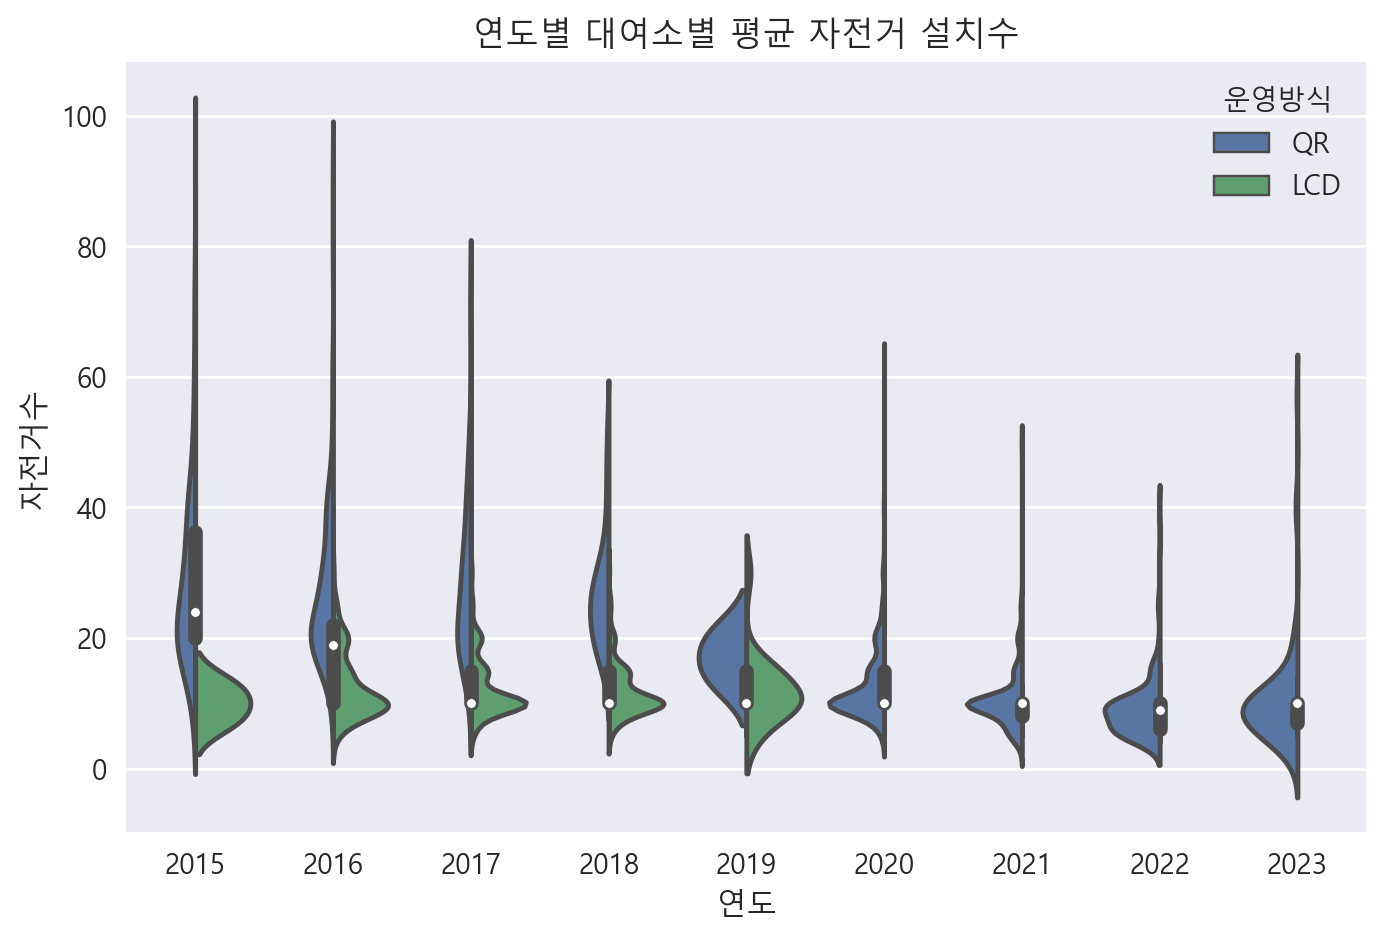

In [180]:
# violinplot x="연도", y="자전거수", hue="운영방식"
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='연도', y='자전거수', hue='운영방식', split=True).set_title('연도별 대여소별 평균 자전거 설치수')

Text(0.5, 1.0, '연도별 대여소별 평균 자전거 설치수')

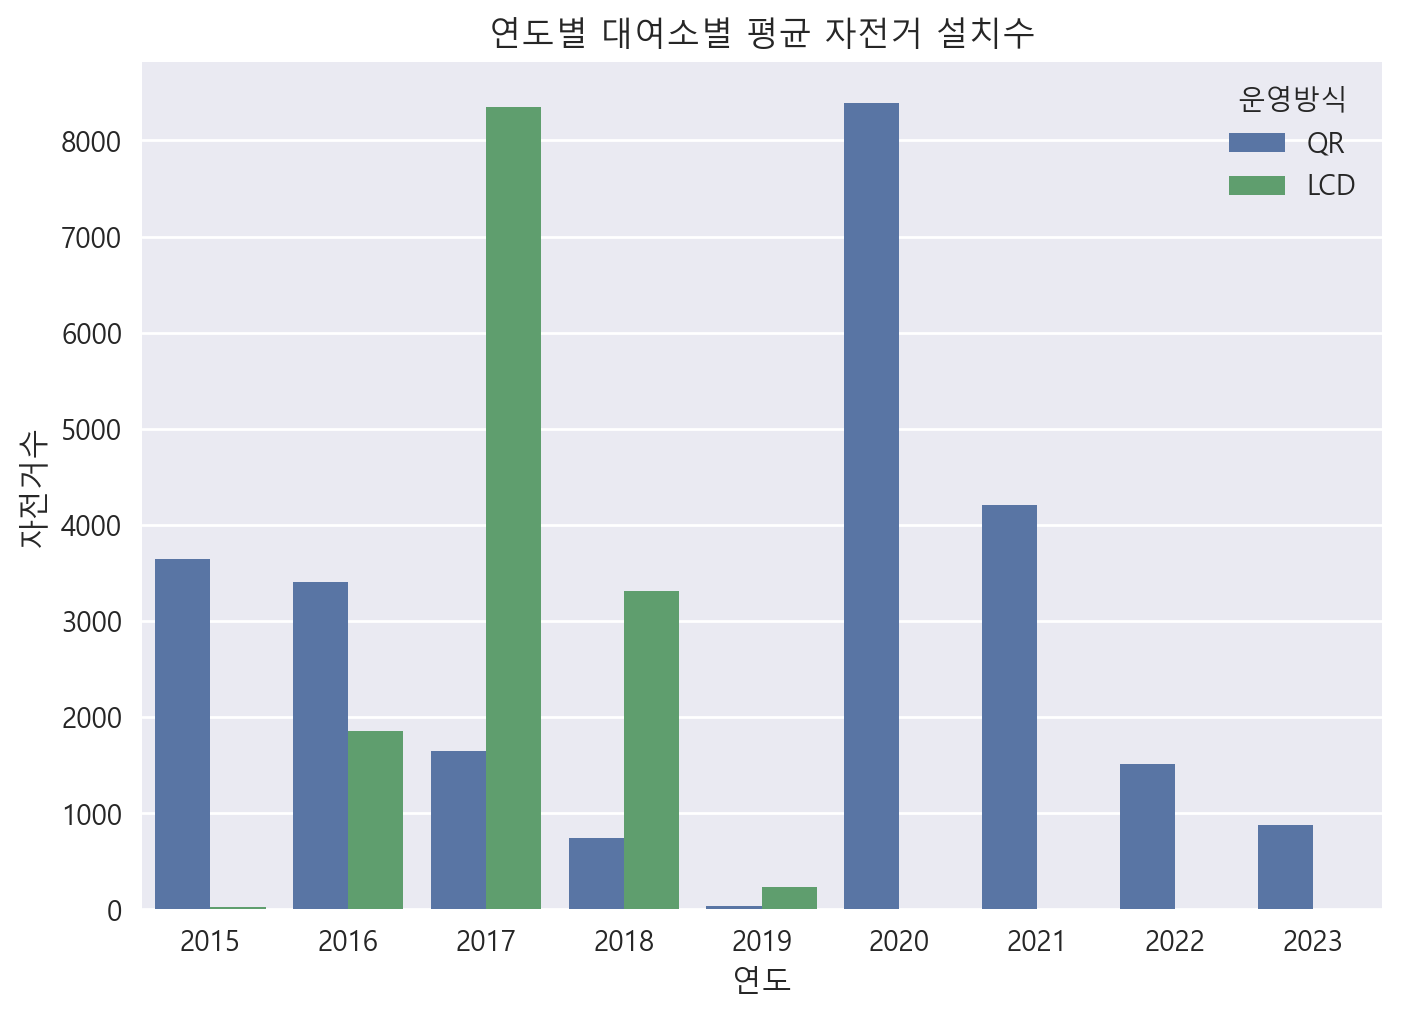

In [182]:
# barplot x="월", y="자전거수", hue="운영방식" 합계
sns.barplot(data=df, x='연도', y='자전거수', hue='운영방식', errorbar=None, estimator=np.sum)\
.set_title('연도별 대여소별 평균 자전거 설치수')

D:\kdit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


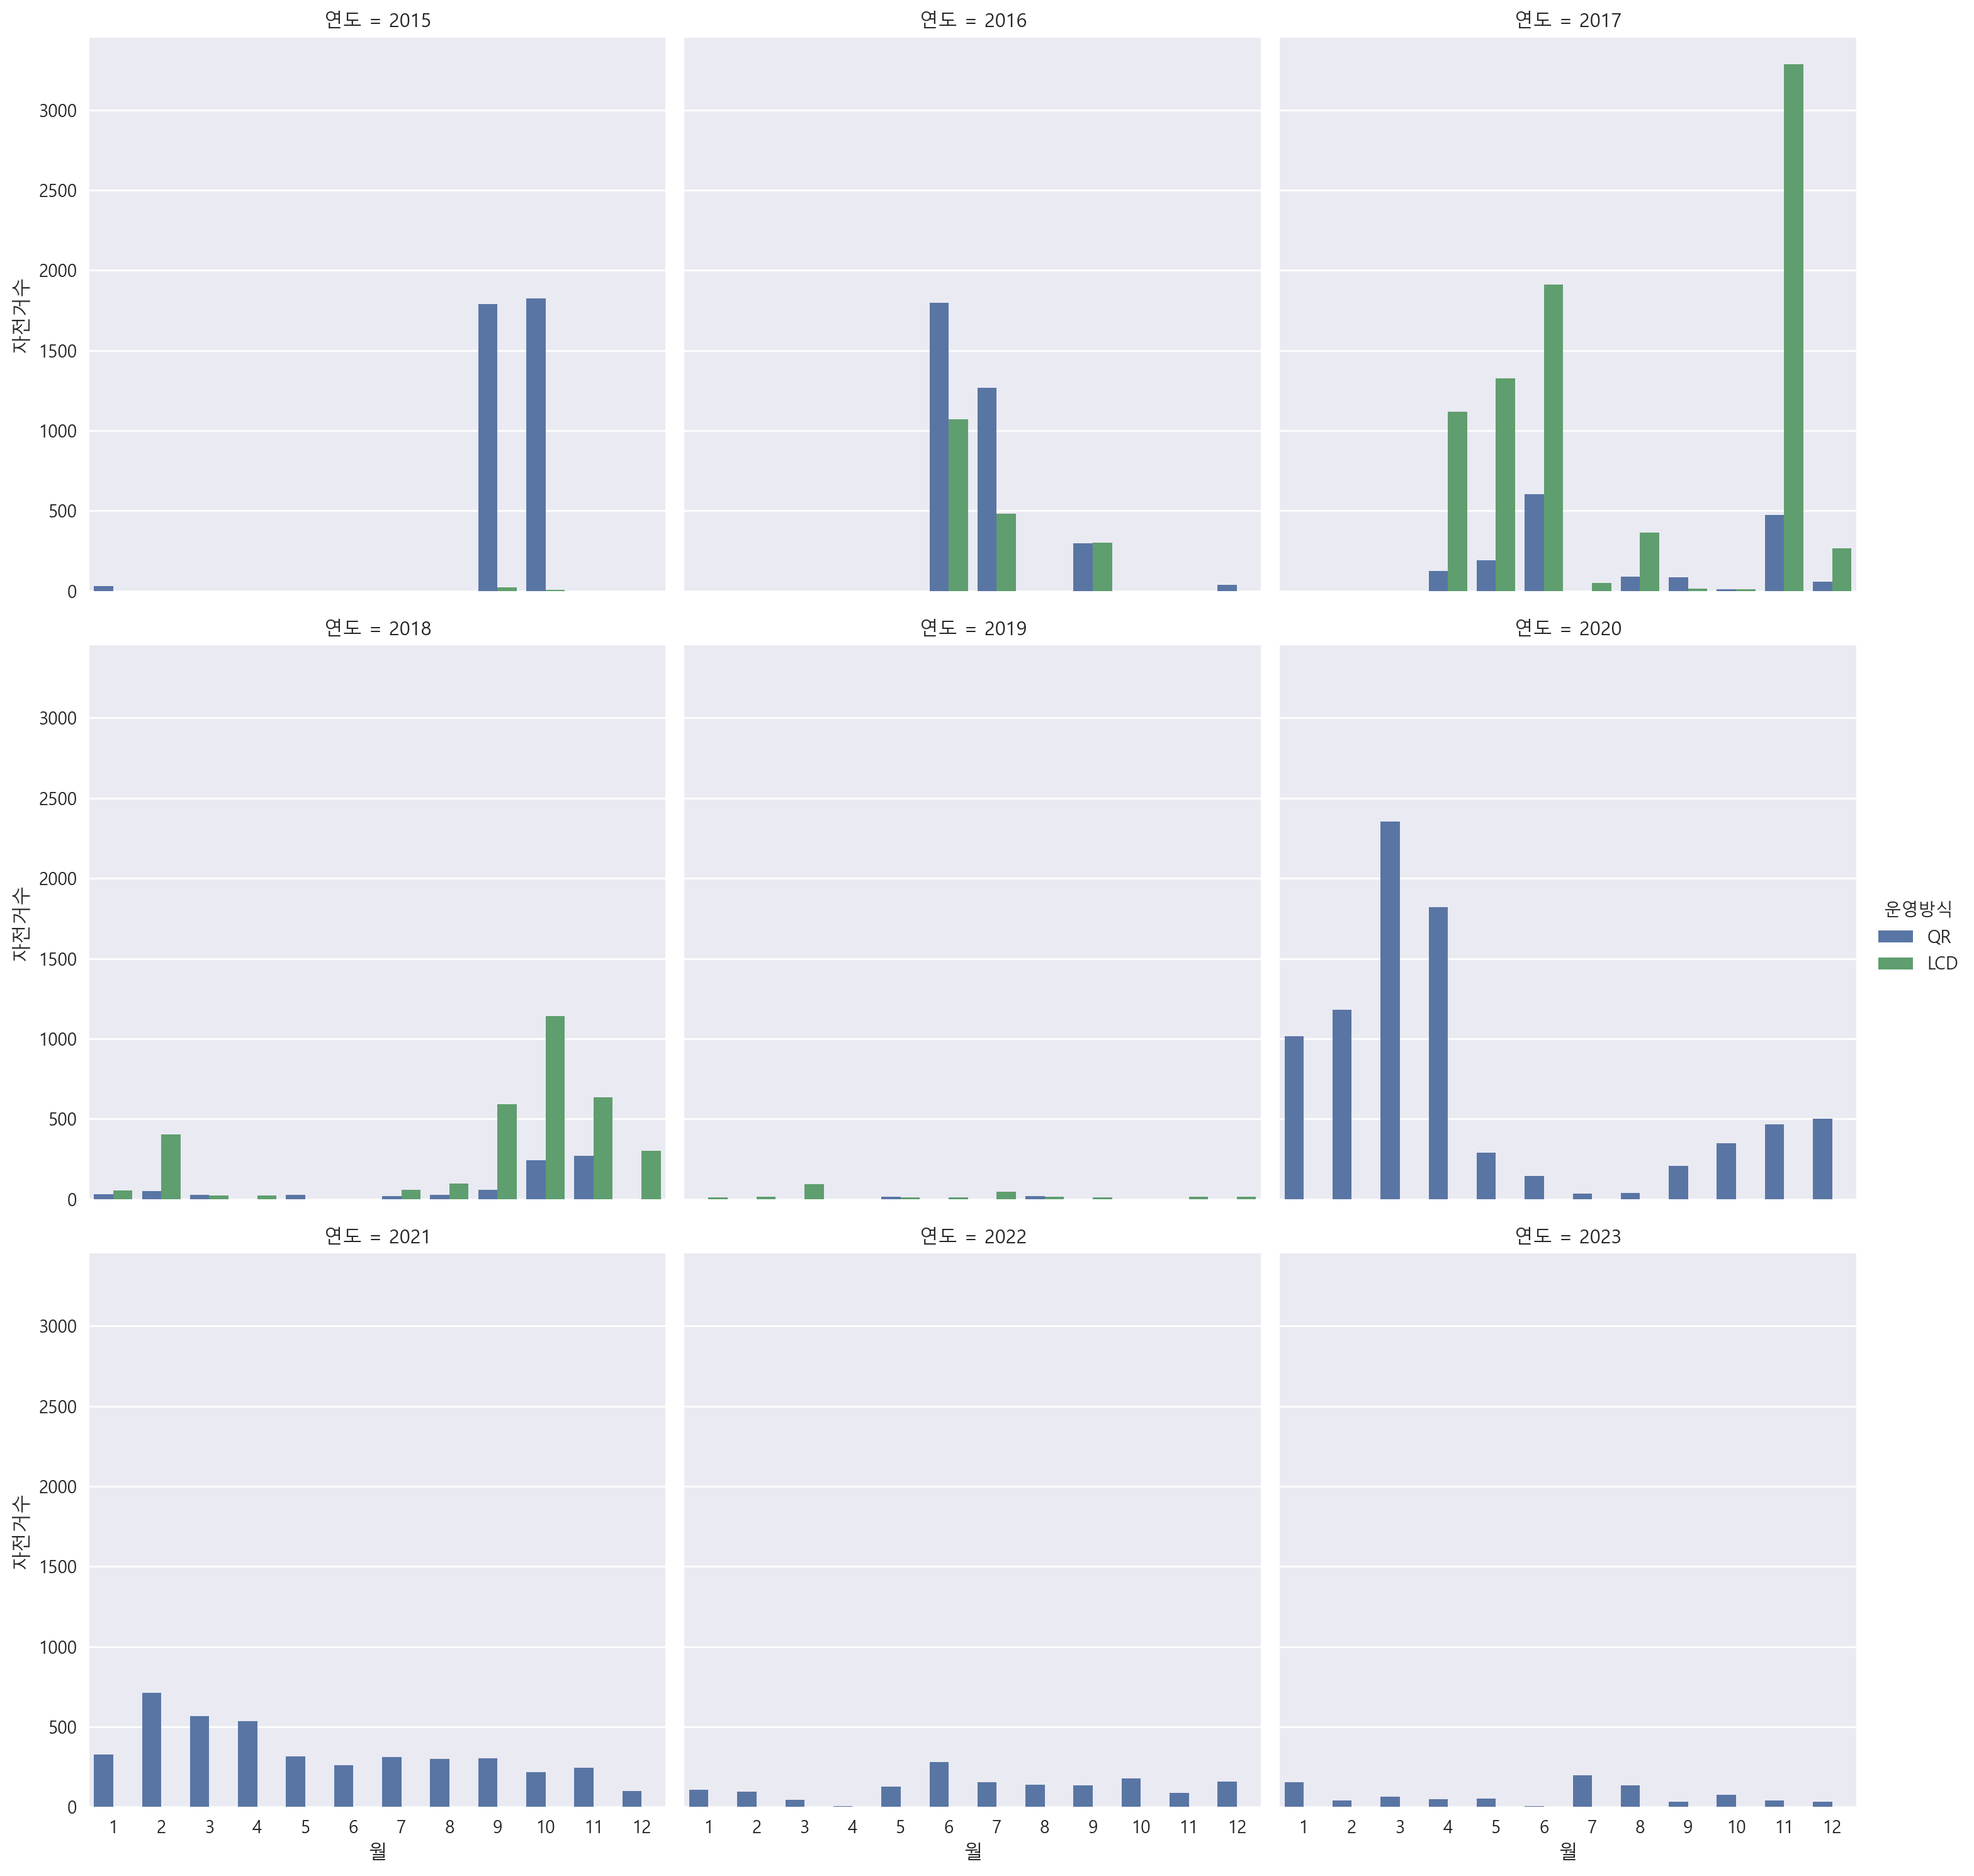

In [198]:
# catplot x="월", y="자전거수", hue="운영방식" 을 연도별로 시각화 합니다.
sns.catplot(data=df, x='월', y='자전거수', hue='운영방식', col='연도', col_wrap=3,
           kind='bar', errorbar=None, estimator=np.sum)

## 대여소 지도 시각화

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/main/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/

In [199]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리
import folium

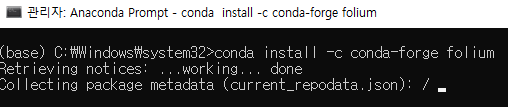

In [200]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
# lat, long
lat = df['위도'].mean()
lng = df['경도'].mean()
print(f'위도:{lat}, 경도:{lng}')

위도:37.5473966839609, 경도:126.99132764896451


In [227]:
map = folium.Map(location=(lat, lng), zoom_start=10)
map

In [238]:
df.loc[df['자치구']=='송파구'][['대여소명','자치구', '위도','경도']].head()

대여소명  자치구         위도          경도
2425     가락시장역 3번 출구  송파구  37.493179  127.118546
2426       밀리아나2빌딩 앞  송파구  37.493729  127.120621
2427        거여역 3번출구  송파구  37.493343  127.144730
2428     종합운동장역 4번출구  송파구  37.510429  127.071373
2429  9호선종합운동장역 9번출구  송파구  37.511280  127.078239

In [236]:
folium.Marker(
    location=[37.575794, 126.971451],
    tooltip="경복궁역 7번출구 앞",
    popup="무료!!",
    icon=folium.Icon(icon='cloud')
).add_to(map)

folium.CircleMarker(
    location=[37.493179, 127.118546],
    tooltip="가락시장역 3번 출구",
    popup="유료!!",
    icon=folium.Icon(icon='cloud')
).add_to(map)
map

### 반복문과 조건문으로 대여소를 지도에 표시하기

In [242]:
display(df.loc[0, '위도'])
display(df.loc[0, '경도'])
display(df.columns)
display(df.index)

37.57579422

126.97145081

Index(['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', 'LCD', 'QR', '운영방식',
       '자전거수', '연도', '월', '일', '요일'],
      dtype='object')

RangeIndex(start=0, stop=2762, step=1)

In [253]:
# LCD, QR 결측치 0, 정수변환
df['LCD'] = df['LCD'].fillna(0).astype(int)
df['QR'] = df['QR'].fillna(0).astype(int)

In [254]:
# CircleMarker 로 대여소를 표시합니다.
# tiles="Stamen Toner"
# 운영방식에 따라 원 색상을 다르게 표시합니다.
map = folium.Map(location=(lat, lng), zoom_start=10)

# 마커표시
for row in df.index[:len(df.index):100]:
    lat = df.loc[row, '위도']
    lng = df.loc[row, '경도']
    
    rental_name = df.loc[row, '대여소명']
    number_of_bicycles = df.loc[row, '자전거수']
    number_of_lcd = df.loc[row, 'LCD']
    number_of_qr = df.loc[row, 'QR']
    detail = f'자전거수 : {number_of_bicycles} [LCD:{number_of_lcd}/QR:{number_of_qr}]'
    
    folium.Marker(
        location=[lat, lng],
        tooltip=rental_name,
        popup=detail,
        icon=folium.Icon(icon='cloud'),
        ).add_to(map)

map

### choropleth 를 위한 GeoJSON 파일로드

* 구별로 대여소수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)
    * 이 링크에서도 다운로드가 가능합니다. https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5
    
* Choropleth-maps : https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps


* 공식문서 예제

```python
import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m
```

In [268]:
# 서울의 행정구역 경계를 GeoJSON으로 표현한 파일입니다. 
# 이 파일을 불러와 구별 대여소수를 표현합니다.
geo_path = 'seoul_municipalities_geo_simple.json'
print(geo_path)


import json
geo_json = json.load(open(geo_path, encoding="utf-8"))
type(geo_json)
geo_json

seoul_municipalities_geo_simple.json


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [267]:
# features, properties 정보 보기
geo_json["features"][0]["properties"]

{'code': '11250',
 'name': '강동구',
 'name_eng': 'Gangdong-gu',
 'base_year': '2013'}

In [269]:
# features, properties, SIG_KOR_NM 정보 보기
geo_json["features"][0]["properties"]["name"]

'강동구'

In [274]:
# 자치구별 자전거수 합계 groupby 로 구하기
# df_gu_bike_count
df_gu_bike_sum = df.groupby('자치구')['자전거수'].sum().sort_values()
df_gu_bike_sum.head()

자치구
강북구    649
도봉구    861
금천구    915
동작구    939
관악구    987
Name: 자전거수, dtype: int64

In [275]:
df_gu_bike_sum = df_gu_bike_sum.to_frame()
df_gu_bike_sum.head()

자전거수
자치구      
강북구   649
도봉구   861
금천구   915
동작구   939
관악구   987

In [283]:
# 위의 to_frame() 없이 reset_index()를 해도 바로 Dataframe으로 바뀐다
df_gu_bike_sum = df_gu_bike_sum.reset_index()
df_gu_bike_sum.head()

자치구  자전거수
0  강북구   649
1  도봉구   861
2  금천구   915
3  동작구   939
4  관악구   987

In [302]:
# choropleth의 색상은 fill_color = 'YlGn'을 사용합니다.
# name='choropleth'
# columns=['자치구', '자전거수'],
# key_on='feature.properties.SIG_KOR_NM'

# GeoJSON 파일 읽기 (utf-8 인코딩 지정)
with open(geo_path, 'r', encoding='utf-8') as f:
    geo_json_data = json.load(f)
    
map = folium.Map(location=[lat, lng], zoom_start=10)

folium.Choropleth(
    geo_data=geo_json_data,
    name="choropleth", # 레이어 이름
    data=df_gu_bike_sum,
    columns=["자치구", "자전거수"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="자전거수", # 범례
).add_to(map)

# LayerControl 추가
folium.LayerControl().add_to(map)
map.save('bycle.html') # html파일로 저장
map


In [304]:
# choropleth의 색상은 fill_color = 'YlGn'을 사용합니다.
# tiles="Stamen Toner"

# GeoJSON 파일 읽기 (utf-8 인코딩 지정)
with open(geo_path, 'r', encoding='utf-8') as f:
    geo_json_data = json.load(f)
    
map = folium.Map(location=[lat, lng], zoom_start=10, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_json_data,
    name="choropleth", # 레이어 이름
    data=df_gu_bike_sum,
    columns=["자치구", "자전거수"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name="자전거수", # 범례
).add_to(map)

# LayerControl 추가
folium.LayerControl().add_to(map)
map


In [312]:
# choropleth의 색상은 fill_color = 'YlGn'을 사용합니다.
# tiles="Stamen Toner"

# GeoJSON 파일 읽기 (utf-8 인코딩 지정)
with open(geo_path, 'r', encoding='utf-8') as f:
    geo_json_data = json.load(f)
    
map = folium.Map(location=[lat, lng], zoom_start=10, tiles='CartoDB positron')

# 마커표시
for row in df.index[:len(df.index):100]:
    lat = df.loc[row, '위도']
    lng = df.loc[row, '경도']
    
    rental_name = df.loc[row, '대여소명']
    number_of_bicycles = df.loc[row, '자전거수']
    number_of_lcd = df.loc[row, 'LCD']
    number_of_qr = df.loc[row, 'QR']
    detail = f'자전거수 : {number_of_bicycles} [LCD:{number_of_lcd}/QR:{number_of_qr}]'
    
    folium.Marker(
        location=[lat, lng],
        tooltip=rental_name,
        popup=detail,
        icon=folium.Icon(icon='cloud'),
        ).add_to(map)

# 행정구역
folium.Choropleth(
    geo_data=geo_json_data,
    name="choropleth", # 레이어 이름
    data=df_gu_bike_sum,
    columns=["자치구", "자전거수"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name="자전거수", # 범례
).add_to(map)

# LayerControl 추가
folium.LayerControl().add_to(map)
map
